In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
# from xgboost import XGBClassifier
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Chittoor']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,Crop
140,236,12.91,78.35,Chittoor,Santipuram,121.Pedduru,Red,7.25,0.23,0.27,...,123.0,718.0,222.0,15.08,1.94,0.53,6.61,0.69,19.54,Tomato
141,237,12.90,78.35,Chittoor,Santipuram,121.Pedduru,Black,7.46,1.99,0.56,...,134.0,1673.0,410.0,233.99,1.09,0.79,40.66,1.95,6.06,Tomato
142,238,12.90,78.35,Chittoor,Santipuram,121.Pedduru,Red,7.20,0.69,0.76,...,244.0,1303.0,167.0,32.83,0.05,0.86,0.08,0.10,0.05,Sweetcorn
143,239,12.90,78.35,Chittoor,Santipuram,121.Pedduru,Black,7.88,0.80,0.62,...,197.0,1160.0,300.0,59.88,4.64,0.67,9.39,1.70,22.50,Tomato
144,240,12.91,78.36,Chittoor,Santipuram,121.Pedduru,Black,7.26,0.18,0.48,...,45.0,746.0,185.0,7.36,1.73,0.54,7.61,0.69,19.59,Mulberry


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,7.333199,0.257436,0.504958,29.260593,102.620763,1479.735169,321.082627,24.570424,1.866949,0.527839,12.713242,1.343390,11.252775
std,0.766655,0.293119,0.259620,28.032604,96.789363,719.576990,147.453428,52.229173,1.865076,0.282563,11.165759,0.616634,6.522774
min,4.990000,0.020000,0.090000,0.800000,15.000000,56.000000,11.000000,1.340000,0.050000,0.090000,0.070000,0.100000,0.050000
25%,6.947500,0.090000,0.330000,7.350000,52.000000,958.250000,219.750000,4.847500,0.760000,0.320000,6.092500,0.910000,6.590000
50%,7.520000,0.160000,0.470000,22.000000,75.000000,1359.000000,304.000000,9.505000,1.370000,0.480000,9.310000,1.230000,10.160000
75%,7.900000,0.302500,0.620000,41.200000,121.500000,1897.750000,413.500000,23.005000,2.232500,0.690000,15.360000,1.682500,14.755000
max,9.150000,3.030000,1.470000,224.600000,1307.000000,4451.000000,1020.000000,698.150000,13.650000,2.440000,76.770000,4.060000,48.500000


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Red', 'Black', 'red', 'Rock soil', '-', 'Sandy Red', 'Red Sandy',
       'Sandy', 'Black Sandy', 'Claim', 'Rox Soil'], dtype=object)

In [9]:
df = df[(df["SoilType"] != '-') & (df["SoilType"] != 'Claim')]
df['SoilType'] = df['SoilType'].replace(['Red', 'red'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Black', 'Black Sandy'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace('Sandy', 'Sandy Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy Red', 'Red Sandy'], 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace(['Rock soil', 'Rox Soil'], 'Rock Soil')
df.SoilType.unique()

array(['Red Soil', 'Black Soil', 'Rock Soil', 'Red Sandy Soil',
       'Sandy Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 298,
 'Black Soil': 139,
 'Rock Soil': 20,
 'Sandy Soil': 7,
 'Red Sandy Soil': 5}

<BarContainer object of 5 artists>

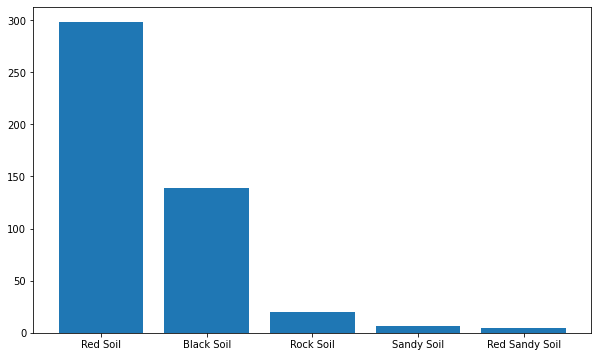

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Tomato', 'Sweetcorn', 'Mulberry', 'Potatao', 'Cabage',
       'Groundnut', 'Potato', 'Paddy', 'Banana', 'Mulbarry', 'Chillies',
       'Jowar', 'Maize', 'Mango', 'Flowers', 'Beans', 'Vegetables',
       'Horse gram', 'Papaya', 'Cabbage', 'Dhavanam', 'Horsegram',
       'banana', 'beans', 'Cucumber', 'Benda', 'Donda', 'Anaar',
       'Fodder Crops', '-', 'Beera', 'Ragi'], dtype=object)

In [14]:
df['Crop'].value_counts()

Groundnut       271
Tomato           54
Potato           36
Beans            26
Flowers           9
Sweetcorn         9
Mango             8
Mulberry          7
Mulbarry          7
Chillies          4
Horse gram        4
Jowar             3
Paddy             3
Maize             2
Banana            2
Potatao           2
Cucumber          2
beans             2
Cabbage           2
Cabage            2
Horsegram         2
Donda             2
Benda             1
Anaar             1
Papaya            1
banana            1
Fodder Crops      1
Dhavanam          1
Beera             1
Ragi              1
Vegetables        1
-                 1
Name: Crop, dtype: int64

GroundNut    271
Tomato        54
Potato        38
Beans         28
Mulberry      14
SweetCorn      9
Mango          8
HorseGram      6
Name: Crop, dtype: int64


<BarContainer object of 8 artists>

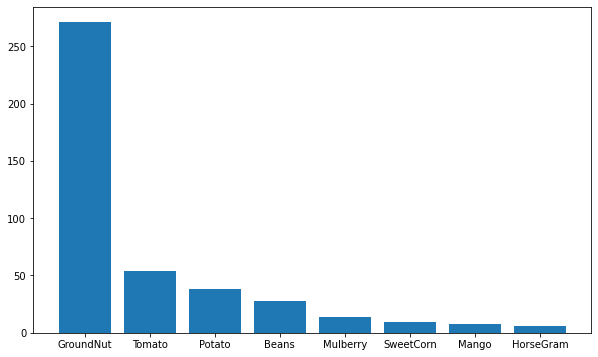

In [15]:
df['Crop'] = df['Crop'].replace('Groundnut', 'GroundNut')
df['Crop'] = df['Crop'].replace('Tomato', 'Tomato')
df['Crop'] = df['Crop'].replace('Sweetcorn', 'SweetCorn')
df['Crop'] = df['Crop'].replace(['Mulberry', 'Mulbarry'], 'Mulberry')
df['Crop'] = df['Crop'].replace(['Horsegram', 'Horse gram'], 'HorseGram')
df['Crop'] = df['Crop'].replace(['beans', 'Beans'], 'Beans')
df['Crop'] = df['Crop'].replace(['Cabbage', 'Cabage'], 'Cabbage')
df['Crop'] = df['Crop'].replace('Potatao', 'Potato')

df = df[(df['Crop'] != 'Ragi') & (df['Crop'] != 'banana') & (df['Crop'] != 'Fodder Crops')]
df = df[(df['Crop'] != 'Anaar') & (df['Crop'] != 'Dhavanam') & (df['Crop'] != 'Papaya')]
df = df[(df['Crop'] != 'Vegetables') & (df['Crop'] != 'Beera') & (df['Crop'] != 'Benda')]
df = df[(df['Crop'] != 'Flowers') & (df['Crop'] != 'Donda') & (df['Crop'] != 'Banana') & (df['Crop'] != 'Maize')]
df = df[(df['Crop'] != 'Cucumber') & (df['Crop'] != 'Cabbage') & (df['Crop'] != 'Chillies') & (df['Crop'] != '-')]
df = df[(df['Crop'] != 'Jowar') & (df['Crop'] != 'Paddy') & (df['Crop'] != 'Cabbage')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
df = df[(df["Crop"] != 'SweetCorn') & (df["Crop"] != 'Mango') & (df["Crop"] != 'HorseGram')]

In [17]:
# Getting rid of features that have a high correlation among one another

In [18]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
pH,1.000000,0.196959,0.167321,0.257474,0.140853,0.585366,0.417403,0.065797,0.100992,0.338143,-0.281180,0.085569,-0.481612
EC,0.196959,1.000000,0.271981,0.508463,0.390298,0.217636,0.319625,0.804249,0.232168,0.487348,-0.024144,0.079764,-0.069538
OC,0.167321,0.271981,1.000000,0.366306,0.303209,0.259071,0.324211,0.201927,0.374745,0.522572,0.124738,0.396300,0.081811
P,0.257474,0.508463,0.366306,1.000000,0.442074,0.098802,0.331307,0.302228,0.406321,0.607754,-0.012178,0.214298,-0.036577
K,0.140853,0.390298,0.303209,0.442074,1.000000,0.139512,0.203654,0.225678,0.221848,0.506844,-0.052497,0.137478,0.109595
Ca,0.585366,0.217636,0.259071,0.098802,0.139512,1.000000,0.726085,0.107572,-0.016208,0.362603,-0.082309,0.224325,-0.246225
Mg,0.417403,0.319625,0.324211,0.331307,0.203654,0.726085,1.000000,0.186015,0.106476,0.508170,0.043548,0.403892,-0.085886
S,0.065797,0.804249,0.201927,0.302228,0.225678,0.107572,0.186015,1.000000,0.147281,0.299676,0.006282,0.075348,-0.000966
Zn,0.100992,0.232168,0.374745,0.406321,0.221848,-0.016208,0.106476,0.147281,1.000000,0.377776,0.002971,0.315376,0.145219
B,0.338143,0.487348,0.522572,0.607754,0.506844,0.362603,0.508170,0.299676,0.377776,1.000000,-0.000181,0.338284,0.016717


In [19]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['P', 'Ca', 'Mg', 'S', 'B', 'Cu']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'K', 'Zn', 'Fe', 'Mn', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

       pH    EC    OC      K    Zn    Fe     Mn  Black Soil  Red Sandy Soil  \
140  7.25  0.23  0.27  123.0  1.94  6.61  19.54           0               0   

     Red Soil  Rock Soil  Sandy Soil  
140         1          0           0  
140    Tomato
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:7] = sc.fit_transform(X[:, 0:7])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [24]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [25]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [26]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [27]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [28]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [29]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7669616519174042


In [30]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 75.49 %
Standard Deviation: 4.28 %


# Decision Tree Classifier

In [31]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [33]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7433628318584071


In [34]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 72.24 %
Standard Deviation: 2.72 %


# Random Forest Classifier

In [35]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [36]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [37]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8082595870206489


In [38]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 83.17 %
Standard Deviation: 3.37 %


# XGBoost

In [39]:
clf4_4 =  HistGradientBoostingClassifier(random_state=0)
clf4_4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [40]:
y_test_pred = clf4_4.predict(X_test)
y_train_pred = clf4_4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [41]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8259587020648967


In [42]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4_4, X = X_train, y = y_train, cv = 10)

In [43]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 82.88 %
Standard Deviation: 3.64 %


In [44]:
# pickle.dump(clf4_4, open('Chittoor_model.pkl', 'wb'))
# pickle.dump(sc2, open('Chittoor_scaler.pkl', 'wb'))
# HERE

# Multi-layer Perceptron Classifier

In [45]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [46]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [47]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.6811023622047244
Testing Accuracy:  0.5988200589970502


In [48]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 64.57 %
Standard Deviation: 4.37 %


# Catboost

In [49]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.5436286	total: 155ms	remaining: 15.3s
1:	learn: 1.4764850	total: 159ms	remaining: 7.79s
2:	learn: 1.4002739	total: 162ms	remaining: 5.24s
3:	learn: 1.3585940	total: 166ms	remaining: 3.98s
4:	learn: 1.3267954	total: 170ms	remaining: 3.22s
5:	learn: 1.2721679	total: 173ms	remaining: 2.7s
6:	learn: 1.2481834	total: 176ms	remaining: 2.33s
7:	learn: 1.2026703	total: 179ms	remaining: 2.06s
8:	learn: 1.1540972	total: 182ms	remaining: 1.84s
9:	learn: 1.1218533	total: 185ms	remaining: 1.66s
10:	learn: 1.0848533	total: 187ms	remaining: 1.51s
11:	learn: 1.0446678	total: 189ms	remaining: 1.38s
12:	learn: 1.0261883	total: 190ms	remaining: 1.27s
13:	learn: 1.0110276	total: 192ms	remaining: 1.18s
14:	learn: 0.9859645	total: 194ms	remaining: 1.1s
15:	learn: 0.9699285	total: 195ms	remaining: 1.02s
16:	learn: 0.9416892	total: 196ms	remaining: 959ms
17:	learn: 0.9374333	total: 198ms	remaining: 901ms
18:	learn: 0.9181172	total: 199ms	remaining: 849ms
19:	learn: 0.8968025	total: 200ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1.372103709
bestIteration = 99

Training on fold [1/5]

bestTest = 1.40392775
bestIteration = 99

Training on fold [2/5]

bestTest = 1.369530946
bestIteration = 99

Training on fold [3/5]

bestTest = 1.413423428
bestIteration = 99

Training on fold [4/5]

bestTest = 1.410278485
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.6018603	test: 1.6037403	best: 1.6037403 (0)	total: 3.14ms	remaining: 3.14s
1:	learn: 1.5925661	test: 1.5976226	best: 1.5976226 (1)	total: 5.24ms	remaining: 2.62s
2:	learn: 1.5841127	test: 1.5906121	best: 1.5906121 (2)	total: 7.08ms	remaining: 2.35s
3:	learn: 1.5732847	test: 1.5838224	best: 1.5838224 (3)	total: 8.95ms	remaining: 2.23s
4:	learn: 1.5671459	test: 1.5800634	best: 1.5800634 (4)	total: 11ms	remaining: 2.18s
5:	learn: 1.5589787	test: 1.5733805	best: 1.5733805 (5)	total: 12.9ms	remaining: 2.13s
6:	learn: 1.5498942	test: 1.5644463	best: 1.5644463 (6)	total: 14.8ms	remaining: 2.09s
7:	learn: 1.5422375	test: 1.5593333	best: 1.5593333 (7)	total: 16.6ms	remaining: 2.06s
8:	learn: 1.5354262	test: 1.5528807	best: 1.5528807 (8)	total: 18.7ms	remaining: 2.06s
9:	learn: 1.5278670	test: 1.5481357	best: 1.5481357 (9)	total: 20.7ms	remaining: 2.04s
10:	learn: 1.5189753	test: 1.5421057	best: 1.5421057 (10)	total: 22.6ms	remaining: 2.03s
11:	learn: 1.5133481	test: 1.5381769	best: 

161:	learn: 1.0211900	test: 1.1588170	best: 1.1588170 (161)	total: 348ms	remaining: 1.8s
162:	learn: 1.0195066	test: 1.1573503	best: 1.1573503 (162)	total: 350ms	remaining: 1.8s
163:	learn: 1.0169402	test: 1.1555349	best: 1.1555349 (163)	total: 352ms	remaining: 1.79s
164:	learn: 1.0149549	test: 1.1542849	best: 1.1542849 (164)	total: 354ms	remaining: 1.79s
165:	learn: 1.0131713	test: 1.1532036	best: 1.1532036 (165)	total: 356ms	remaining: 1.79s
166:	learn: 1.0112863	test: 1.1512483	best: 1.1512483 (166)	total: 359ms	remaining: 1.79s
167:	learn: 1.0100661	test: 1.1498106	best: 1.1498106 (167)	total: 361ms	remaining: 1.79s
168:	learn: 1.0081441	test: 1.1483283	best: 1.1483283 (168)	total: 363ms	remaining: 1.78s
169:	learn: 1.0063353	test: 1.1466501	best: 1.1466501 (169)	total: 365ms	remaining: 1.78s
170:	learn: 1.0042348	test: 1.1449717	best: 1.1449717 (170)	total: 367ms	remaining: 1.78s
171:	learn: 1.0021351	test: 1.1439289	best: 1.1439289 (171)	total: 369ms	remaining: 1.78s
172:	learn: 

317:	learn: 0.8033497	test: 0.9992656	best: 0.9992656 (317)	total: 693ms	remaining: 1.49s
318:	learn: 0.8023125	test: 0.9990228	best: 0.9990228 (318)	total: 696ms	remaining: 1.49s
319:	learn: 0.8015628	test: 0.9986707	best: 0.9986707 (319)	total: 698ms	remaining: 1.48s
320:	learn: 0.8003489	test: 0.9973624	best: 0.9973624 (320)	total: 701ms	remaining: 1.48s
321:	learn: 0.7989487	test: 0.9972126	best: 0.9972126 (321)	total: 703ms	remaining: 1.48s
322:	learn: 0.7979753	test: 0.9962568	best: 0.9962568 (322)	total: 705ms	remaining: 1.48s
323:	learn: 0.7971349	test: 0.9958911	best: 0.9958911 (323)	total: 707ms	remaining: 1.47s
324:	learn: 0.7962392	test: 0.9951235	best: 0.9951235 (324)	total: 709ms	remaining: 1.47s
325:	learn: 0.7958848	test: 0.9948236	best: 0.9948236 (325)	total: 711ms	remaining: 1.47s
326:	learn: 0.7950608	test: 0.9943557	best: 0.9943557 (326)	total: 714ms	remaining: 1.47s
327:	learn: 0.7937548	test: 0.9931870	best: 0.9931870 (327)	total: 716ms	remaining: 1.47s
328:	learn

478:	learn: 0.6564177	test: 0.9041876	best: 0.9041876 (478)	total: 1.04s	remaining: 1.14s
479:	learn: 0.6552246	test: 0.9034427	best: 0.9034427 (479)	total: 1.05s	remaining: 1.14s
480:	learn: 0.6544231	test: 0.9026087	best: 0.9026087 (480)	total: 1.05s	remaining: 1.13s
481:	learn: 0.6541168	test: 0.9024772	best: 0.9024772 (481)	total: 1.05s	remaining: 1.13s
482:	learn: 0.6534153	test: 0.9022209	best: 0.9022209 (482)	total: 1.05s	remaining: 1.13s
483:	learn: 0.6523762	test: 0.9012105	best: 0.9012105 (483)	total: 1.06s	remaining: 1.13s
484:	learn: 0.6514313	test: 0.9006550	best: 0.9006550 (484)	total: 1.06s	remaining: 1.12s
485:	learn: 0.6509715	test: 0.9005550	best: 0.9005550 (485)	total: 1.06s	remaining: 1.12s
486:	learn: 0.6503669	test: 0.9007263	best: 0.9005550 (485)	total: 1.06s	remaining: 1.12s
487:	learn: 0.6499688	test: 0.9006337	best: 0.9005550 (485)	total: 1.06s	remaining: 1.12s
488:	learn: 0.6493062	test: 0.9002434	best: 0.9002434 (488)	total: 1.07s	remaining: 1.11s
489:	learn

638:	learn: 0.5543252	test: 0.8397709	best: 0.8397709 (638)	total: 1.4s	remaining: 789ms
639:	learn: 0.5541382	test: 0.8396555	best: 0.8396555 (639)	total: 1.4s	remaining: 787ms
640:	learn: 0.5537394	test: 0.8395532	best: 0.8395532 (640)	total: 1.4s	remaining: 785ms
641:	learn: 0.5532630	test: 0.8393037	best: 0.8393037 (641)	total: 1.4s	remaining: 783ms
642:	learn: 0.5529508	test: 0.8389504	best: 0.8389504 (642)	total: 1.41s	remaining: 780ms
643:	learn: 0.5526129	test: 0.8390536	best: 0.8389504 (642)	total: 1.41s	remaining: 778ms
644:	learn: 0.5521099	test: 0.8391013	best: 0.8389504 (642)	total: 1.41s	remaining: 776ms
645:	learn: 0.5514547	test: 0.8386544	best: 0.8386544 (645)	total: 1.41s	remaining: 774ms
646:	learn: 0.5508706	test: 0.8383769	best: 0.8383769 (646)	total: 1.41s	remaining: 772ms
647:	learn: 0.5501080	test: 0.8381756	best: 0.8381756 (647)	total: 1.42s	remaining: 770ms
648:	learn: 0.5490195	test: 0.8373613	best: 0.8373613 (648)	total: 1.42s	remaining: 767ms
649:	learn: 0.

801:	learn: 0.4680284	test: 0.7834925	best: 0.7834925 (801)	total: 1.75s	remaining: 431ms
802:	learn: 0.4673190	test: 0.7829077	best: 0.7829077 (802)	total: 1.75s	remaining: 429ms
803:	learn: 0.4671151	test: 0.7826751	best: 0.7826751 (803)	total: 1.75s	remaining: 427ms
804:	learn: 0.4666637	test: 0.7826182	best: 0.7826182 (804)	total: 1.75s	remaining: 425ms
805:	learn: 0.4662388	test: 0.7822139	best: 0.7822139 (805)	total: 1.76s	remaining: 423ms
806:	learn: 0.4656903	test: 0.7818399	best: 0.7818399 (806)	total: 1.76s	remaining: 421ms
807:	learn: 0.4653056	test: 0.7814885	best: 0.7814885 (807)	total: 1.76s	remaining: 418ms
808:	learn: 0.4648434	test: 0.7812147	best: 0.7812147 (808)	total: 1.76s	remaining: 416ms
809:	learn: 0.4645964	test: 0.7808398	best: 0.7808398 (809)	total: 1.76s	remaining: 414ms
810:	learn: 0.4637847	test: 0.7799560	best: 0.7799560 (810)	total: 1.77s	remaining: 412ms
811:	learn: 0.4633720	test: 0.7795227	best: 0.7795227 (811)	total: 1.77s	remaining: 410ms
812:	learn

959:	learn: 0.4091246	test: 0.7473227	best: 0.7471984 (958)	total: 2.11s	remaining: 87.9ms
960:	learn: 0.4088779	test: 0.7471956	best: 0.7471956 (960)	total: 2.11s	remaining: 85.7ms
961:	learn: 0.4085714	test: 0.7471993	best: 0.7471956 (960)	total: 2.11s	remaining: 83.5ms
962:	learn: 0.4082499	test: 0.7470007	best: 0.7470007 (962)	total: 2.12s	remaining: 81.3ms
963:	learn: 0.4079922	test: 0.7467928	best: 0.7467928 (963)	total: 2.12s	remaining: 79.1ms
964:	learn: 0.4074710	test: 0.7465879	best: 0.7465879 (964)	total: 2.12s	remaining: 76.9ms
965:	learn: 0.4070796	test: 0.7462972	best: 0.7462972 (965)	total: 2.12s	remaining: 74.7ms
966:	learn: 0.4067778	test: 0.7461581	best: 0.7461581 (966)	total: 2.12s	remaining: 72.5ms
967:	learn: 0.4063644	test: 0.7459837	best: 0.7459837 (967)	total: 2.13s	remaining: 70.3ms
968:	learn: 0.4061905	test: 0.7459194	best: 0.7459194 (968)	total: 2.13s	remaining: 68.1ms
969:	learn: 0.4059443	test: 0.7459832	best: 0.7459194 (968)	total: 2.13s	remaining: 65.9ms

141:	learn: 0.6440450	test: 0.9159007	best: 0.9159007 (141)	total: 266ms	remaining: 1.61s
142:	learn: 0.6418011	test: 0.9146653	best: 0.9146653 (142)	total: 269ms	remaining: 1.61s
143:	learn: 0.6402056	test: 0.9131274	best: 0.9131274 (143)	total: 271ms	remaining: 1.61s
144:	learn: 0.6368378	test: 0.9103616	best: 0.9103616 (144)	total: 273ms	remaining: 1.61s
145:	learn: 0.6336296	test: 0.9067429	best: 0.9067429 (145)	total: 275ms	remaining: 1.61s
146:	learn: 0.6326858	test: 0.9058236	best: 0.9058236 (146)	total: 277ms	remaining: 1.61s
147:	learn: 0.6294152	test: 0.9023088	best: 0.9023088 (147)	total: 279ms	remaining: 1.6s
148:	learn: 0.6270923	test: 0.9018839	best: 0.9018839 (148)	total: 281ms	remaining: 1.6s
149:	learn: 0.6257553	test: 0.9013328	best: 0.9013328 (149)	total: 283ms	remaining: 1.6s
150:	learn: 0.6244256	test: 0.9000792	best: 0.9000792 (150)	total: 285ms	remaining: 1.6s
151:	learn: 0.6224631	test: 0.8990447	best: 0.8990447 (151)	total: 287ms	remaining: 1.6s
152:	learn: 0.6

235:	learn: 0.4709828	test: 0.8023404	best: 0.8023404 (235)	total: 443ms	remaining: 1.43s
236:	learn: 0.4702150	test: 0.8013348	best: 0.8013348 (236)	total: 446ms	remaining: 1.44s
237:	learn: 0.4688290	test: 0.7997283	best: 0.7997283 (237)	total: 448ms	remaining: 1.43s
238:	learn: 0.4663771	test: 0.7978407	best: 0.7978407 (238)	total: 450ms	remaining: 1.43s
239:	learn: 0.4657150	test: 0.7969099	best: 0.7969099 (239)	total: 452ms	remaining: 1.43s
240:	learn: 0.4632815	test: 0.7942727	best: 0.7942727 (240)	total: 453ms	remaining: 1.43s
241:	learn: 0.4627633	test: 0.7946941	best: 0.7942727 (240)	total: 455ms	remaining: 1.43s
242:	learn: 0.4624133	test: 0.7947669	best: 0.7942727 (240)	total: 457ms	remaining: 1.42s
243:	learn: 0.4614373	test: 0.7943335	best: 0.7942727 (240)	total: 459ms	remaining: 1.42s
244:	learn: 0.4599999	test: 0.7939789	best: 0.7939789 (244)	total: 462ms	remaining: 1.42s
245:	learn: 0.4593647	test: 0.7940329	best: 0.7939789 (244)	total: 464ms	remaining: 1.42s
246:	learn

329:	learn: 0.3633980	test: 0.7287251	best: 0.7287251 (329)	total: 619ms	remaining: 1.26s
330:	learn: 0.3629835	test: 0.7284729	best: 0.7284729 (330)	total: 622ms	remaining: 1.26s
331:	learn: 0.3618498	test: 0.7277698	best: 0.7277698 (331)	total: 625ms	remaining: 1.26s
332:	learn: 0.3604591	test: 0.7268854	best: 0.7268854 (332)	total: 627ms	remaining: 1.26s
333:	learn: 0.3595890	test: 0.7270774	best: 0.7268854 (332)	total: 629ms	remaining: 1.25s
334:	learn: 0.3588054	test: 0.7266951	best: 0.7266951 (334)	total: 631ms	remaining: 1.25s
335:	learn: 0.3580050	test: 0.7258251	best: 0.7258251 (335)	total: 633ms	remaining: 1.25s
336:	learn: 0.3573481	test: 0.7252112	best: 0.7252112 (336)	total: 635ms	remaining: 1.25s
337:	learn: 0.3568976	test: 0.7251201	best: 0.7251201 (337)	total: 637ms	remaining: 1.25s
338:	learn: 0.3563894	test: 0.7248210	best: 0.7248210 (338)	total: 639ms	remaining: 1.25s
339:	learn: 0.3552081	test: 0.7237291	best: 0.7237291 (339)	total: 641ms	remaining: 1.24s
340:	learn

423:	learn: 0.2923690	test: 0.6836771	best: 0.6836771 (423)	total: 804ms	remaining: 1.09s
424:	learn: 0.2913432	test: 0.6837187	best: 0.6836771 (423)	total: 807ms	remaining: 1.09s
425:	learn: 0.2907017	test: 0.6839222	best: 0.6836771 (423)	total: 809ms	remaining: 1.09s
426:	learn: 0.2898256	test: 0.6837725	best: 0.6836771 (423)	total: 810ms	remaining: 1.09s
427:	learn: 0.2891597	test: 0.6838726	best: 0.6836771 (423)	total: 812ms	remaining: 1.08s
428:	learn: 0.2886114	test: 0.6834219	best: 0.6834219 (428)	total: 814ms	remaining: 1.08s
429:	learn: 0.2877406	test: 0.6817670	best: 0.6817670 (429)	total: 816ms	remaining: 1.08s
430:	learn: 0.2875389	test: 0.6815594	best: 0.6815594 (430)	total: 818ms	remaining: 1.08s
431:	learn: 0.2871126	test: 0.6817654	best: 0.6815594 (430)	total: 820ms	remaining: 1.08s
432:	learn: 0.2865814	test: 0.6817510	best: 0.6815594 (430)	total: 821ms	remaining: 1.07s
433:	learn: 0.2864085	test: 0.6817606	best: 0.6815594 (430)	total: 823ms	remaining: 1.07s
434:	learn

518:	learn: 0.2400560	test: 0.6567769	best: 0.6567769 (518)	total: 983ms	remaining: 911ms
519:	learn: 0.2392114	test: 0.6560642	best: 0.6560642 (519)	total: 986ms	remaining: 910ms
520:	learn: 0.2387933	test: 0.6559273	best: 0.6559273 (520)	total: 989ms	remaining: 909ms
521:	learn: 0.2377721	test: 0.6544561	best: 0.6544561 (521)	total: 992ms	remaining: 908ms
522:	learn: 0.2372124	test: 0.6543528	best: 0.6543528 (522)	total: 994ms	remaining: 907ms
523:	learn: 0.2369559	test: 0.6538636	best: 0.6538636 (523)	total: 997ms	remaining: 906ms
524:	learn: 0.2364462	test: 0.6529091	best: 0.6529091 (524)	total: 1000ms	remaining: 905ms
525:	learn: 0.2359284	test: 0.6526823	best: 0.6526823 (525)	total: 1s	remaining: 903ms
526:	learn: 0.2355837	test: 0.6527779	best: 0.6526823 (525)	total: 1s	remaining: 902ms
527:	learn: 0.2352232	test: 0.6519139	best: 0.6519139 (527)	total: 1.01s	remaining: 900ms
528:	learn: 0.2345749	test: 0.6511353	best: 0.6511353 (528)	total: 1.01s	remaining: 898ms
529:	learn: 0.2

696:	learn: 0.1764385	test: 0.6223612	best: 0.6223612 (696)	total: 1.34s	remaining: 582ms
697:	learn: 0.1761609	test: 0.6224796	best: 0.6223612 (696)	total: 1.34s	remaining: 580ms
698:	learn: 0.1759135	test: 0.6222365	best: 0.6222365 (698)	total: 1.34s	remaining: 578ms
699:	learn: 0.1755458	test: 0.6218647	best: 0.6218647 (699)	total: 1.34s	remaining: 576ms
700:	learn: 0.1754083	test: 0.6220950	best: 0.6218647 (699)	total: 1.35s	remaining: 574ms
701:	learn: 0.1750157	test: 0.6220554	best: 0.6218647 (699)	total: 1.35s	remaining: 572ms
702:	learn: 0.1747473	test: 0.6219441	best: 0.6218647 (699)	total: 1.35s	remaining: 571ms
703:	learn: 0.1746171	test: 0.6215188	best: 0.6215188 (703)	total: 1.35s	remaining: 569ms
704:	learn: 0.1745185	test: 0.6214981	best: 0.6214981 (704)	total: 1.35s	remaining: 567ms
705:	learn: 0.1743319	test: 0.6217162	best: 0.6214981 (704)	total: 1.36s	remaining: 565ms
706:	learn: 0.1740649	test: 0.6212012	best: 0.6212012 (706)	total: 1.36s	remaining: 563ms
707:	learn

796:	learn: 0.1518870	test: 0.6115162	best: 0.6115162 (796)	total: 1.53s	remaining: 390ms
797:	learn: 0.1517209	test: 0.6114203	best: 0.6114203 (797)	total: 1.53s	remaining: 388ms
798:	learn: 0.1515435	test: 0.6114712	best: 0.6114203 (797)	total: 1.53s	remaining: 386ms
799:	learn: 0.1513459	test: 0.6117628	best: 0.6114203 (797)	total: 1.54s	remaining: 384ms
800:	learn: 0.1510531	test: 0.6116774	best: 0.6114203 (797)	total: 1.54s	remaining: 382ms
801:	learn: 0.1507614	test: 0.6111641	best: 0.6111641 (801)	total: 1.54s	remaining: 380ms
802:	learn: 0.1505659	test: 0.6113839	best: 0.6111641 (801)	total: 1.54s	remaining: 378ms
803:	learn: 0.1504468	test: 0.6112284	best: 0.6111641 (801)	total: 1.54s	remaining: 376ms
804:	learn: 0.1501351	test: 0.6113458	best: 0.6111641 (801)	total: 1.55s	remaining: 375ms
805:	learn: 0.1499967	test: 0.6113957	best: 0.6111641 (801)	total: 1.55s	remaining: 373ms
806:	learn: 0.1497748	test: 0.6114335	best: 0.6111641 (801)	total: 1.55s	remaining: 371ms
807:	learn

892:	learn: 0.1325305	test: 0.6037138	best: 0.6035050 (881)	total: 1.71s	remaining: 204ms
893:	learn: 0.1323635	test: 0.6034105	best: 0.6034105 (893)	total: 1.71s	remaining: 203ms
894:	learn: 0.1322307	test: 0.6032591	best: 0.6032591 (894)	total: 1.71s	remaining: 201ms
895:	learn: 0.1320257	test: 0.6028280	best: 0.6028280 (895)	total: 1.71s	remaining: 199ms
896:	learn: 0.1319157	test: 0.6029846	best: 0.6028280 (895)	total: 1.71s	remaining: 197ms
897:	learn: 0.1317532	test: 0.6026070	best: 0.6026070 (897)	total: 1.72s	remaining: 195ms
898:	learn: 0.1316709	test: 0.6026052	best: 0.6026052 (898)	total: 1.72s	remaining: 193ms
899:	learn: 0.1315712	test: 0.6026078	best: 0.6026052 (898)	total: 1.72s	remaining: 191ms
900:	learn: 0.1314521	test: 0.6024959	best: 0.6024959 (900)	total: 1.72s	remaining: 189ms
901:	learn: 0.1310659	test: 0.6027463	best: 0.6024959 (900)	total: 1.72s	remaining: 187ms
902:	learn: 0.1309204	test: 0.6026100	best: 0.6024959 (900)	total: 1.73s	remaining: 185ms
903:	learn

22:	learn: 1.3799181	test: 1.4428504	best: 1.4428504 (22)	total: 142ms	remaining: 6.04s
23:	learn: 1.3714330	test: 1.4354542	best: 1.4354542 (23)	total: 148ms	remaining: 6.01s
24:	learn: 1.3645300	test: 1.4301583	best: 1.4301583 (24)	total: 154ms	remaining: 6s
25:	learn: 1.3577061	test: 1.4263376	best: 1.4263376 (25)	total: 159ms	remaining: 5.97s
26:	learn: 1.3499849	test: 1.4205980	best: 1.4205980 (26)	total: 167ms	remaining: 6.01s
27:	learn: 1.3431938	test: 1.4152445	best: 1.4152445 (27)	total: 173ms	remaining: 6.02s
28:	learn: 1.3340450	test: 1.4092576	best: 1.4092576 (28)	total: 179ms	remaining: 5.99s
29:	learn: 1.3249245	test: 1.4022225	best: 1.4022225 (29)	total: 185ms	remaining: 5.97s
30:	learn: 1.3179652	test: 1.3961383	best: 1.3961383 (30)	total: 190ms	remaining: 5.95s
31:	learn: 1.3111092	test: 1.3918992	best: 1.3918992 (31)	total: 196ms	remaining: 5.93s
32:	learn: 1.3028381	test: 1.3853289	best: 1.3853289 (32)	total: 202ms	remaining: 5.91s
33:	learn: 1.2949596	test: 1.378245

123:	learn: 0.9165365	test: 1.1017628	best: 1.1017628 (123)	total: 717ms	remaining: 5.07s
124:	learn: 0.9145915	test: 1.1005740	best: 1.1005740 (124)	total: 724ms	remaining: 5.07s
125:	learn: 0.9125263	test: 1.0992906	best: 1.0992906 (125)	total: 729ms	remaining: 5.06s
126:	learn: 0.9087772	test: 1.0954731	best: 1.0954731 (126)	total: 736ms	remaining: 5.06s
127:	learn: 0.9058168	test: 1.0925191	best: 1.0925191 (127)	total: 743ms	remaining: 5.06s
128:	learn: 0.9026398	test: 1.0900566	best: 1.0900566 (128)	total: 748ms	remaining: 5.05s
129:	learn: 0.9010289	test: 1.0891963	best: 1.0891963 (129)	total: 754ms	remaining: 5.04s
130:	learn: 0.8982478	test: 1.0874733	best: 1.0874733 (130)	total: 760ms	remaining: 5.04s
131:	learn: 0.8959003	test: 1.0858188	best: 1.0858188 (131)	total: 766ms	remaining: 5.04s
132:	learn: 0.8928084	test: 1.0833856	best: 1.0833856 (132)	total: 771ms	remaining: 5.03s
133:	learn: 0.8908183	test: 1.0815352	best: 1.0815352 (133)	total: 777ms	remaining: 5.02s
134:	learn

224:	learn: 0.7077704	test: 0.9509717	best: 0.9509717 (224)	total: 1.3s	remaining: 4.47s
225:	learn: 0.7055522	test: 0.9498203	best: 0.9498203 (225)	total: 1.3s	remaining: 4.47s
226:	learn: 0.7041272	test: 0.9490209	best: 0.9490209 (226)	total: 1.31s	remaining: 4.46s
227:	learn: 0.7033131	test: 0.9487605	best: 0.9487605 (227)	total: 1.32s	remaining: 4.46s
228:	learn: 0.7019797	test: 0.9479351	best: 0.9479351 (228)	total: 1.32s	remaining: 4.45s
229:	learn: 0.7011096	test: 0.9472358	best: 0.9472358 (229)	total: 1.33s	remaining: 4.45s
230:	learn: 0.6996571	test: 0.9465941	best: 0.9465941 (230)	total: 1.33s	remaining: 4.44s
231:	learn: 0.6983675	test: 0.9459462	best: 0.9459462 (231)	total: 1.34s	remaining: 4.43s
232:	learn: 0.6970998	test: 0.9450936	best: 0.9450936 (232)	total: 1.34s	remaining: 4.43s
233:	learn: 0.6962194	test: 0.9445531	best: 0.9445531 (233)	total: 1.35s	remaining: 4.42s
234:	learn: 0.6950831	test: 0.9441905	best: 0.9441905 (234)	total: 1.35s	remaining: 4.41s
235:	learn: 

324:	learn: 0.5647601	test: 0.8578284	best: 0.8578284 (324)	total: 1.86s	remaining: 3.88s
325:	learn: 0.5633602	test: 0.8574720	best: 0.8574720 (325)	total: 1.87s	remaining: 3.87s
326:	learn: 0.5626911	test: 0.8572132	best: 0.8572132 (326)	total: 1.88s	remaining: 3.86s
327:	learn: 0.5612219	test: 0.8561759	best: 0.8561759 (327)	total: 1.88s	remaining: 3.86s
328:	learn: 0.5598775	test: 0.8550751	best: 0.8550751 (328)	total: 1.89s	remaining: 3.85s
329:	learn: 0.5590623	test: 0.8545622	best: 0.8545622 (329)	total: 1.9s	remaining: 3.85s
330:	learn: 0.5579080	test: 0.8536043	best: 0.8536043 (330)	total: 1.9s	remaining: 3.84s
331:	learn: 0.5567117	test: 0.8527388	best: 0.8527388 (331)	total: 1.91s	remaining: 3.84s
332:	learn: 0.5557716	test: 0.8525105	best: 0.8525105 (332)	total: 1.91s	remaining: 3.83s
333:	learn: 0.5541007	test: 0.8508415	best: 0.8508415 (333)	total: 1.92s	remaining: 3.83s
334:	learn: 0.5527225	test: 0.8499438	best: 0.8499438 (334)	total: 1.93s	remaining: 3.82s
335:	learn: 

420:	learn: 0.4682014	test: 0.7926130	best: 0.7926130 (420)	total: 2.44s	remaining: 3.35s
421:	learn: 0.4678773	test: 0.7924062	best: 0.7924062 (421)	total: 2.44s	remaining: 3.34s
422:	learn: 0.4666365	test: 0.7915103	best: 0.7915103 (422)	total: 2.45s	remaining: 3.34s
423:	learn: 0.4659772	test: 0.7912541	best: 0.7912541 (423)	total: 2.45s	remaining: 3.33s
424:	learn: 0.4654850	test: 0.7910454	best: 0.7910454 (424)	total: 2.46s	remaining: 3.33s
425:	learn: 0.4651059	test: 0.7906912	best: 0.7906912 (425)	total: 2.46s	remaining: 3.32s
426:	learn: 0.4642166	test: 0.7898143	best: 0.7898143 (426)	total: 2.47s	remaining: 3.31s
427:	learn: 0.4629161	test: 0.7893621	best: 0.7893621 (427)	total: 2.48s	remaining: 3.31s
428:	learn: 0.4621770	test: 0.7891807	best: 0.7891807 (428)	total: 2.48s	remaining: 3.3s
429:	learn: 0.4616518	test: 0.7889477	best: 0.7889477 (429)	total: 2.49s	remaining: 3.3s
430:	learn: 0.4606089	test: 0.7888412	best: 0.7888412 (430)	total: 2.49s	remaining: 3.29s
431:	learn: 

522:	learn: 0.3934988	test: 0.7447095	best: 0.7447095 (522)	total: 3.01s	remaining: 2.75s
523:	learn: 0.3930812	test: 0.7445711	best: 0.7445711 (523)	total: 3.02s	remaining: 2.74s
524:	learn: 0.3924197	test: 0.7438040	best: 0.7438040 (524)	total: 3.03s	remaining: 2.74s
525:	learn: 0.3916356	test: 0.7432089	best: 0.7432089 (525)	total: 3.03s	remaining: 2.73s
526:	learn: 0.3910456	test: 0.7429891	best: 0.7429891 (526)	total: 3.04s	remaining: 2.73s
527:	learn: 0.3903690	test: 0.7424233	best: 0.7424233 (527)	total: 3.05s	remaining: 2.72s
528:	learn: 0.3897475	test: 0.7417417	best: 0.7417417 (528)	total: 3.05s	remaining: 2.72s
529:	learn: 0.3889409	test: 0.7411028	best: 0.7411028 (529)	total: 3.06s	remaining: 2.71s
530:	learn: 0.3886189	test: 0.7406105	best: 0.7406105 (530)	total: 3.06s	remaining: 2.71s
531:	learn: 0.3879253	test: 0.7402067	best: 0.7402067 (531)	total: 3.07s	remaining: 2.7s
532:	learn: 0.3874355	test: 0.7397486	best: 0.7397486 (532)	total: 3.08s	remaining: 2.7s
533:	learn: 

621:	learn: 0.3395912	test: 0.7083369	best: 0.7083369 (621)	total: 3.6s	remaining: 2.19s
622:	learn: 0.3390184	test: 0.7079984	best: 0.7079984 (622)	total: 3.61s	remaining: 2.18s
623:	learn: 0.3384870	test: 0.7077376	best: 0.7077376 (623)	total: 3.61s	remaining: 2.18s
624:	learn: 0.3383457	test: 0.7077033	best: 0.7077033 (624)	total: 3.62s	remaining: 2.17s
625:	learn: 0.3380014	test: 0.7075713	best: 0.7075713 (625)	total: 3.63s	remaining: 2.17s
626:	learn: 0.3373405	test: 0.7071217	best: 0.7071217 (626)	total: 3.63s	remaining: 2.16s
627:	learn: 0.3367561	test: 0.7066928	best: 0.7066928 (627)	total: 3.64s	remaining: 2.15s
628:	learn: 0.3362984	test: 0.7065317	best: 0.7065317 (628)	total: 3.64s	remaining: 2.15s
629:	learn: 0.3356645	test: 0.7061832	best: 0.7061832 (629)	total: 3.65s	remaining: 2.14s
630:	learn: 0.3351722	test: 0.7056769	best: 0.7056769 (630)	total: 3.65s	remaining: 2.14s
631:	learn: 0.3347529	test: 0.7053985	best: 0.7053985 (631)	total: 3.66s	remaining: 2.13s
632:	learn:

720:	learn: 0.2958589	test: 0.6766674	best: 0.6766674 (720)	total: 4.17s	remaining: 1.61s
721:	learn: 0.2953854	test: 0.6763249	best: 0.6763249 (721)	total: 4.17s	remaining: 1.61s
722:	learn: 0.2951535	test: 0.6762643	best: 0.6762643 (722)	total: 4.18s	remaining: 1.6s
723:	learn: 0.2946870	test: 0.6759853	best: 0.6759853 (723)	total: 4.18s	remaining: 1.59s
724:	learn: 0.2943470	test: 0.6756746	best: 0.6756746 (724)	total: 4.19s	remaining: 1.59s
725:	learn: 0.2939584	test: 0.6758670	best: 0.6756746 (724)	total: 4.2s	remaining: 1.58s
726:	learn: 0.2935577	test: 0.6757401	best: 0.6756746 (724)	total: 4.2s	remaining: 1.58s
727:	learn: 0.2931318	test: 0.6756113	best: 0.6756113 (727)	total: 4.21s	remaining: 1.57s
728:	learn: 0.2926417	test: 0.6754707	best: 0.6754707 (728)	total: 4.21s	remaining: 1.56s
729:	learn: 0.2921232	test: 0.6748191	best: 0.6748191 (729)	total: 4.22s	remaining: 1.56s
730:	learn: 0.2915781	test: 0.6745270	best: 0.6745270 (730)	total: 4.22s	remaining: 1.55s
731:	learn: 0

820:	learn: 0.2597490	test: 0.6544127	best: 0.6543588 (819)	total: 4.74s	remaining: 1.03s
821:	learn: 0.2595633	test: 0.6543875	best: 0.6543588 (819)	total: 4.74s	remaining: 1.03s
822:	learn: 0.2592477	test: 0.6543354	best: 0.6543354 (822)	total: 4.75s	remaining: 1.02s
823:	learn: 0.2588120	test: 0.6537586	best: 0.6537586 (823)	total: 4.75s	remaining: 1.01s
824:	learn: 0.2584177	test: 0.6533224	best: 0.6533224 (824)	total: 4.76s	remaining: 1.01s
825:	learn: 0.2581533	test: 0.6531306	best: 0.6531306 (825)	total: 4.76s	remaining: 1s
826:	learn: 0.2579228	test: 0.6529625	best: 0.6529625 (826)	total: 4.77s	remaining: 998ms
827:	learn: 0.2576766	test: 0.6523824	best: 0.6523824 (827)	total: 4.78s	remaining: 993ms
828:	learn: 0.2572484	test: 0.6516690	best: 0.6516690 (828)	total: 4.78s	remaining: 987ms
829:	learn: 0.2568615	test: 0.6513518	best: 0.6513518 (829)	total: 4.79s	remaining: 981ms
830:	learn: 0.2564781	test: 0.6510684	best: 0.6510684 (830)	total: 4.79s	remaining: 975ms
831:	learn: 0

920:	learn: 0.2295550	test: 0.6353983	best: 0.6353983 (920)	total: 5.3s	remaining: 455ms
921:	learn: 0.2291855	test: 0.6351861	best: 0.6351861 (921)	total: 5.31s	remaining: 449ms
922:	learn: 0.2289666	test: 0.6350055	best: 0.6350055 (922)	total: 5.32s	remaining: 443ms
923:	learn: 0.2288405	test: 0.6348736	best: 0.6348736 (923)	total: 5.32s	remaining: 438ms
924:	learn: 0.2286808	test: 0.6347405	best: 0.6347405 (924)	total: 5.33s	remaining: 432ms
925:	learn: 0.2283927	test: 0.6345813	best: 0.6345813 (925)	total: 5.33s	remaining: 426ms
926:	learn: 0.2281246	test: 0.6345002	best: 0.6345002 (926)	total: 5.34s	remaining: 421ms
927:	learn: 0.2279933	test: 0.6344174	best: 0.6344174 (927)	total: 5.34s	remaining: 415ms
928:	learn: 0.2276705	test: 0.6341834	best: 0.6341834 (928)	total: 5.35s	remaining: 409ms
929:	learn: 0.2272753	test: 0.6339223	best: 0.6339223 (929)	total: 5.36s	remaining: 403ms
930:	learn: 0.2272199	test: 0.6338499	best: 0.6338499 (930)	total: 5.36s	remaining: 397ms
931:	learn:

16:	learn: 1.1524671	test: 1.2772610	best: 1.2772610 (16)	total: 98.5ms	remaining: 5.69s
17:	learn: 1.1336039	test: 1.2641015	best: 1.2641015 (17)	total: 104ms	remaining: 5.69s
18:	learn: 1.1230038	test: 1.2583554	best: 1.2583554 (18)	total: 111ms	remaining: 5.71s
19:	learn: 1.1084197	test: 1.2490305	best: 1.2490305 (19)	total: 116ms	remaining: 5.7s
20:	learn: 1.0934684	test: 1.2395451	best: 1.2395451 (20)	total: 124ms	remaining: 5.79s
21:	learn: 1.0831496	test: 1.2307857	best: 1.2307857 (21)	total: 130ms	remaining: 5.77s
22:	learn: 1.0676469	test: 1.2192459	best: 1.2192459 (22)	total: 136ms	remaining: 5.77s
23:	learn: 1.0532009	test: 1.2099130	best: 1.2099130 (23)	total: 142ms	remaining: 5.77s
24:	learn: 1.0388934	test: 1.2007571	best: 1.2007571 (24)	total: 147ms	remaining: 5.75s
25:	learn: 1.0278839	test: 1.1941321	best: 1.1941321 (25)	total: 153ms	remaining: 5.73s
26:	learn: 1.0167333	test: 1.1817168	best: 1.1817168 (26)	total: 158ms	remaining: 5.71s
27:	learn: 1.0077515	test: 1.175

110:	learn: 0.5143190	test: 0.8311467	best: 0.8311467 (110)	total: 651ms	remaining: 5.22s
111:	learn: 0.5111530	test: 0.8289589	best: 0.8289589 (111)	total: 657ms	remaining: 5.21s
112:	learn: 0.5067831	test: 0.8263676	best: 0.8263676 (112)	total: 664ms	remaining: 5.21s
113:	learn: 0.5037317	test: 0.8253756	best: 0.8253756 (113)	total: 670ms	remaining: 5.21s
114:	learn: 0.5001642	test: 0.8229707	best: 0.8229707 (114)	total: 676ms	remaining: 5.2s
115:	learn: 0.4967978	test: 0.8211150	best: 0.8211150 (115)	total: 682ms	remaining: 5.19s
116:	learn: 0.4922463	test: 0.8166413	best: 0.8166413 (116)	total: 687ms	remaining: 5.19s
117:	learn: 0.4901800	test: 0.8162800	best: 0.8162800 (117)	total: 693ms	remaining: 5.18s
118:	learn: 0.4879258	test: 0.8150745	best: 0.8150745 (118)	total: 699ms	remaining: 5.17s
119:	learn: 0.4835852	test: 0.8131563	best: 0.8131563 (119)	total: 705ms	remaining: 5.17s
120:	learn: 0.4801069	test: 0.8099618	best: 0.8099618 (120)	total: 710ms	remaining: 5.16s
121:	learn:

208:	learn: 0.3023249	test: 0.6851940	best: 0.6851940 (208)	total: 1.22s	remaining: 4.6s
209:	learn: 0.3014829	test: 0.6844820	best: 0.6844820 (209)	total: 1.22s	remaining: 4.6s
210:	learn: 0.2997526	test: 0.6836428	best: 0.6836428 (210)	total: 1.23s	remaining: 4.59s
211:	learn: 0.2979489	test: 0.6822299	best: 0.6822299 (211)	total: 1.23s	remaining: 4.59s
212:	learn: 0.2970184	test: 0.6822203	best: 0.6822203 (212)	total: 1.24s	remaining: 4.58s
213:	learn: 0.2956621	test: 0.6808510	best: 0.6808510 (213)	total: 1.25s	remaining: 4.57s
214:	learn: 0.2942707	test: 0.6791730	best: 0.6791730 (214)	total: 1.25s	remaining: 4.57s
215:	learn: 0.2932387	test: 0.6782174	best: 0.6782174 (215)	total: 1.26s	remaining: 4.56s
216:	learn: 0.2923863	test: 0.6770534	best: 0.6770534 (216)	total: 1.26s	remaining: 4.56s
217:	learn: 0.2909037	test: 0.6759532	best: 0.6759532 (217)	total: 1.27s	remaining: 4.56s
218:	learn: 0.2900171	test: 0.6753378	best: 0.6753378 (218)	total: 1.27s	remaining: 4.55s
219:	learn: 

307:	learn: 0.2029957	test: 0.6151467	best: 0.6151467 (307)	total: 1.78s	remaining: 4s
308:	learn: 0.2016738	test: 0.6149337	best: 0.6149337 (308)	total: 1.79s	remaining: 4s
309:	learn: 0.2003979	test: 0.6138723	best: 0.6138723 (309)	total: 1.79s	remaining: 3.99s
310:	learn: 0.1995082	test: 0.6134608	best: 0.6134608 (310)	total: 1.8s	remaining: 3.98s
311:	learn: 0.1985280	test: 0.6137090	best: 0.6134608 (310)	total: 1.8s	remaining: 3.98s
312:	learn: 0.1977687	test: 0.6136942	best: 0.6134608 (310)	total: 1.81s	remaining: 3.97s
313:	learn: 0.1970245	test: 0.6139604	best: 0.6134608 (310)	total: 1.82s	remaining: 3.97s
314:	learn: 0.1960437	test: 0.6128284	best: 0.6128284 (314)	total: 1.82s	remaining: 3.96s
315:	learn: 0.1953115	test: 0.6113032	best: 0.6113032 (315)	total: 1.83s	remaining: 3.96s
316:	learn: 0.1947105	test: 0.6113108	best: 0.6113032 (315)	total: 1.83s	remaining: 3.95s
317:	learn: 0.1942041	test: 0.6106447	best: 0.6106447 (317)	total: 1.84s	remaining: 3.94s
318:	learn: 0.1934

407:	learn: 0.1463292	test: 0.5879488	best: 0.5876144 (406)	total: 2.34s	remaining: 3.4s
408:	learn: 0.1459709	test: 0.5876290	best: 0.5876144 (406)	total: 2.35s	remaining: 3.4s
409:	learn: 0.1456159	test: 0.5874109	best: 0.5874109 (409)	total: 2.36s	remaining: 3.39s
410:	learn: 0.1451804	test: 0.5872029	best: 0.5872029 (410)	total: 2.36s	remaining: 3.38s
411:	learn: 0.1448759	test: 0.5870616	best: 0.5870616 (411)	total: 2.37s	remaining: 3.38s
412:	learn: 0.1444155	test: 0.5862675	best: 0.5862675 (412)	total: 2.38s	remaining: 3.38s
413:	learn: 0.1439817	test: 0.5859493	best: 0.5859493 (413)	total: 2.38s	remaining: 3.37s
414:	learn: 0.1435293	test: 0.5854215	best: 0.5854215 (414)	total: 2.39s	remaining: 3.36s
415:	learn: 0.1432011	test: 0.5850809	best: 0.5850809 (415)	total: 2.39s	remaining: 3.36s
416:	learn: 0.1425300	test: 0.5848237	best: 0.5848237 (416)	total: 2.4s	remaining: 3.35s
417:	learn: 0.1421412	test: 0.5849311	best: 0.5848237 (416)	total: 2.4s	remaining: 3.35s
418:	learn: 0.

504:	learn: 0.1140377	test: 0.5718477	best: 0.5718477 (504)	total: 2.89s	remaining: 2.84s
505:	learn: 0.1137291	test: 0.5715076	best: 0.5715076 (505)	total: 2.9s	remaining: 2.83s
506:	learn: 0.1133530	test: 0.5718274	best: 0.5715076 (505)	total: 2.91s	remaining: 2.83s
507:	learn: 0.1131004	test: 0.5714927	best: 0.5714927 (507)	total: 2.91s	remaining: 2.82s
508:	learn: 0.1128868	test: 0.5715254	best: 0.5714927 (507)	total: 2.92s	remaining: 2.82s
509:	learn: 0.1125879	test: 0.5715245	best: 0.5714927 (507)	total: 2.92s	remaining: 2.81s
510:	learn: 0.1123071	test: 0.5712495	best: 0.5712495 (510)	total: 2.93s	remaining: 2.81s
511:	learn: 0.1120716	test: 0.5717253	best: 0.5712495 (510)	total: 2.94s	remaining: 2.8s
512:	learn: 0.1118043	test: 0.5715193	best: 0.5712495 (510)	total: 2.94s	remaining: 2.79s
513:	learn: 0.1113588	test: 0.5707267	best: 0.5707267 (513)	total: 2.95s	remaining: 2.79s
514:	learn: 0.1111760	test: 0.5705060	best: 0.5705060 (514)	total: 2.95s	remaining: 2.78s
515:	learn: 

607:	learn: 0.0908251	test: 0.5588257	best: 0.5588257 (607)	total: 3.48s	remaining: 2.24s
608:	learn: 0.0905193	test: 0.5588523	best: 0.5588257 (607)	total: 3.48s	remaining: 2.24s
609:	learn: 0.0902595	test: 0.5581616	best: 0.5581616 (609)	total: 3.49s	remaining: 2.23s
610:	learn: 0.0900701	test: 0.5581771	best: 0.5581616 (609)	total: 3.5s	remaining: 2.23s
611:	learn: 0.0898467	test: 0.5580563	best: 0.5580563 (611)	total: 3.5s	remaining: 2.22s
612:	learn: 0.0896139	test: 0.5579768	best: 0.5579768 (612)	total: 3.51s	remaining: 2.21s
613:	learn: 0.0894688	test: 0.5578134	best: 0.5578134 (613)	total: 3.51s	remaining: 2.21s
614:	learn: 0.0892347	test: 0.5584091	best: 0.5578134 (613)	total: 3.52s	remaining: 2.2s
615:	learn: 0.0890415	test: 0.5583050	best: 0.5578134 (613)	total: 3.52s	remaining: 2.2s
616:	learn: 0.0888922	test: 0.5583798	best: 0.5578134 (613)	total: 3.53s	remaining: 2.19s
617:	learn: 0.0887312	test: 0.5585851	best: 0.5578134 (613)	total: 3.54s	remaining: 2.19s
618:	learn: 0.

709:	learn: 0.0742077	test: 0.5524375	best: 0.5514637 (704)	total: 4.06s	remaining: 1.66s
710:	learn: 0.0740759	test: 0.5524156	best: 0.5514637 (704)	total: 4.06s	remaining: 1.65s
711:	learn: 0.0738752	test: 0.5520576	best: 0.5514637 (704)	total: 4.07s	remaining: 1.65s
712:	learn: 0.0736450	test: 0.5513774	best: 0.5513774 (712)	total: 4.07s	remaining: 1.64s
713:	learn: 0.0734850	test: 0.5515153	best: 0.5513774 (712)	total: 4.08s	remaining: 1.63s
714:	learn: 0.0733577	test: 0.5514502	best: 0.5513774 (712)	total: 4.09s	remaining: 1.63s
715:	learn: 0.0731970	test: 0.5514509	best: 0.5513774 (712)	total: 4.09s	remaining: 1.62s
716:	learn: 0.0730025	test: 0.5513673	best: 0.5513673 (716)	total: 4.1s	remaining: 1.62s
717:	learn: 0.0729373	test: 0.5512834	best: 0.5512834 (717)	total: 4.1s	remaining: 1.61s
718:	learn: 0.0727561	test: 0.5514166	best: 0.5512834 (717)	total: 4.11s	remaining: 1.61s
719:	learn: 0.0726117	test: 0.5514187	best: 0.5512834 (717)	total: 4.12s	remaining: 1.6s
720:	learn: 0

805:	learn: 0.0623229	test: 0.5470852	best: 0.5470106 (803)	total: 4.63s	remaining: 1.11s
806:	learn: 0.0621771	test: 0.5471247	best: 0.5470106 (803)	total: 4.63s	remaining: 1.11s
807:	learn: 0.0621292	test: 0.5471541	best: 0.5470106 (803)	total: 4.64s	remaining: 1.1s
808:	learn: 0.0620110	test: 0.5470374	best: 0.5470106 (803)	total: 4.64s	remaining: 1.1s
809:	learn: 0.0618696	test: 0.5468767	best: 0.5468767 (809)	total: 4.65s	remaining: 1.09s
810:	learn: 0.0617218	test: 0.5472282	best: 0.5468767 (809)	total: 4.66s	remaining: 1.08s
811:	learn: 0.0615697	test: 0.5473992	best: 0.5468767 (809)	total: 4.66s	remaining: 1.08s
812:	learn: 0.0614326	test: 0.5474196	best: 0.5468767 (809)	total: 4.67s	remaining: 1.07s
813:	learn: 0.0612984	test: 0.5473459	best: 0.5468767 (809)	total: 4.67s	remaining: 1.07s
814:	learn: 0.0612257	test: 0.5468257	best: 0.5468257 (814)	total: 4.68s	remaining: 1.06s
815:	learn: 0.0610939	test: 0.5469742	best: 0.5468257 (814)	total: 4.68s	remaining: 1.06s
816:	learn: 

905:	learn: 0.0531175	test: 0.5457930	best: 0.5448007 (843)	total: 5.2s	remaining: 539ms
906:	learn: 0.0530186	test: 0.5459779	best: 0.5448007 (843)	total: 5.2s	remaining: 534ms
907:	learn: 0.0528923	test: 0.5458990	best: 0.5448007 (843)	total: 5.21s	remaining: 528ms
908:	learn: 0.0528348	test: 0.5459923	best: 0.5448007 (843)	total: 5.22s	remaining: 523ms
909:	learn: 0.0527571	test: 0.5457616	best: 0.5448007 (843)	total: 5.23s	remaining: 517ms
910:	learn: 0.0526605	test: 0.5456187	best: 0.5448007 (843)	total: 5.23s	remaining: 511ms
911:	learn: 0.0526104	test: 0.5455348	best: 0.5448007 (843)	total: 5.24s	remaining: 506ms
912:	learn: 0.0525275	test: 0.5455123	best: 0.5448007 (843)	total: 5.25s	remaining: 500ms
913:	learn: 0.0524657	test: 0.5454374	best: 0.5448007 (843)	total: 5.25s	remaining: 494ms
914:	learn: 0.0524100	test: 0.5457765	best: 0.5448007 (843)	total: 5.26s	remaining: 488ms
915:	learn: 0.0523039	test: 0.5456652	best: 0.5448007 (843)	total: 5.26s	remaining: 483ms
916:	learn: 

0:	learn: 1.5933311	test: 1.6004051	best: 1.6004051 (0)	total: 104ms	remaining: 1m 43s
1:	learn: 1.5774010	test: 1.5905695	best: 1.5905695 (1)	total: 218ms	remaining: 1m 48s
2:	learn: 1.5619343	test: 1.5801009	best: 1.5801009 (2)	total: 337ms	remaining: 1m 51s
3:	learn: 1.5462157	test: 1.5692180	best: 1.5692180 (3)	total: 460ms	remaining: 1m 54s
4:	learn: 1.5314954	test: 1.5581014	best: 1.5581014 (4)	total: 573ms	remaining: 1m 54s
5:	learn: 1.5177131	test: 1.5492980	best: 1.5492980 (5)	total: 684ms	remaining: 1m 53s
6:	learn: 1.5014952	test: 1.5377414	best: 1.5377414 (6)	total: 797ms	remaining: 1m 53s
7:	learn: 1.4882735	test: 1.5275913	best: 1.5275913 (7)	total: 926ms	remaining: 1m 54s
8:	learn: 1.4756597	test: 1.5185621	best: 1.5185621 (8)	total: 1.06s	remaining: 1m 56s
9:	learn: 1.4622149	test: 1.5083231	best: 1.5083231 (9)	total: 1.2s	remaining: 1m 58s
10:	learn: 1.4485700	test: 1.4975378	best: 1.4975378 (10)	total: 1.34s	remaining: 2m
11:	learn: 1.4363280	test: 1.4897980	best: 1.4

94:	learn: 0.8160520	test: 1.0753159	best: 1.0753159 (94)	total: 11.4s	remaining: 1m 48s
95:	learn: 0.8117355	test: 1.0724871	best: 1.0724871 (95)	total: 11.5s	remaining: 1m 48s
96:	learn: 0.8072684	test: 1.0690022	best: 1.0690022 (96)	total: 11.6s	remaining: 1m 48s
97:	learn: 0.8031124	test: 1.0661433	best: 1.0661433 (97)	total: 11.7s	remaining: 1m 48s
98:	learn: 0.7980177	test: 1.0631008	best: 1.0631008 (98)	total: 11.9s	remaining: 1m 47s
99:	learn: 0.7937441	test: 1.0607946	best: 1.0607946 (99)	total: 12s	remaining: 1m 47s
100:	learn: 0.7896367	test: 1.0581123	best: 1.0581123 (100)	total: 12.1s	remaining: 1m 47s
101:	learn: 0.7856063	test: 1.0555160	best: 1.0555160 (101)	total: 12.2s	remaining: 1m 47s
102:	learn: 0.7819451	test: 1.0527201	best: 1.0527201 (102)	total: 12.4s	remaining: 1m 47s
103:	learn: 0.7778297	test: 1.0500008	best: 1.0500008 (103)	total: 12.5s	remaining: 1m 47s
104:	learn: 0.7737419	test: 1.0472632	best: 1.0472632 (104)	total: 12.6s	remaining: 1m 47s
105:	learn: 0

186:	learn: 0.5349646	test: 0.8833795	best: 0.8833795 (186)	total: 22.5s	remaining: 1m 37s
187:	learn: 0.5328045	test: 0.8813688	best: 0.8813688 (187)	total: 22.7s	remaining: 1m 37s
188:	learn: 0.5306995	test: 0.8798540	best: 0.8798540 (188)	total: 22.8s	remaining: 1m 37s
189:	learn: 0.5285541	test: 0.8782385	best: 0.8782385 (189)	total: 22.9s	remaining: 1m 37s
190:	learn: 0.5264324	test: 0.8767249	best: 0.8767249 (190)	total: 23s	remaining: 1m 37s
191:	learn: 0.5244021	test: 0.8753199	best: 0.8753199 (191)	total: 23.2s	remaining: 1m 37s
192:	learn: 0.5223066	test: 0.8735541	best: 0.8735541 (192)	total: 23.3s	remaining: 1m 37s
193:	learn: 0.5202693	test: 0.8722780	best: 0.8722780 (193)	total: 23.4s	remaining: 1m 37s
194:	learn: 0.5183665	test: 0.8705197	best: 0.8705197 (194)	total: 23.5s	remaining: 1m 37s
195:	learn: 0.5164303	test: 0.8694452	best: 0.8694452 (195)	total: 23.7s	remaining: 1m 37s
196:	learn: 0.5144356	test: 0.8681968	best: 0.8681968 (196)	total: 23.8s	remaining: 1m 36s
1

278:	learn: 0.3835803	test: 0.7768939	best: 0.7768939 (278)	total: 33.7s	remaining: 1m 27s
279:	learn: 0.3823827	test: 0.7763255	best: 0.7763255 (279)	total: 33.8s	remaining: 1m 26s
280:	learn: 0.3810206	test: 0.7751569	best: 0.7751569 (280)	total: 34s	remaining: 1m 26s
281:	learn: 0.3801439	test: 0.7744358	best: 0.7744358 (281)	total: 34.1s	remaining: 1m 26s
282:	learn: 0.3787810	test: 0.7733768	best: 0.7733768 (282)	total: 34.2s	remaining: 1m 26s
283:	learn: 0.3774380	test: 0.7721264	best: 0.7721264 (283)	total: 34.3s	remaining: 1m 26s
284:	learn: 0.3761833	test: 0.7715708	best: 0.7715708 (284)	total: 34.4s	remaining: 1m 26s
285:	learn: 0.3752633	test: 0.7709127	best: 0.7709127 (285)	total: 34.6s	remaining: 1m 26s
286:	learn: 0.3740301	test: 0.7696209	best: 0.7696209 (286)	total: 34.7s	remaining: 1m 26s
287:	learn: 0.3728627	test: 0.7687648	best: 0.7687648 (287)	total: 34.8s	remaining: 1m 25s
288:	learn: 0.3720444	test: 0.7680211	best: 0.7680211 (288)	total: 34.9s	remaining: 1m 25s
2

370:	learn: 0.2894275	test: 0.7099725	best: 0.7099725 (370)	total: 44.7s	remaining: 1m 15s
371:	learn: 0.2888242	test: 0.7092677	best: 0.7092677 (371)	total: 44.8s	remaining: 1m 15s
372:	learn: 0.2879057	test: 0.7087696	best: 0.7087696 (372)	total: 44.9s	remaining: 1m 15s
373:	learn: 0.2869396	test: 0.7084709	best: 0.7084709 (373)	total: 45.1s	remaining: 1m 15s
374:	learn: 0.2860100	test: 0.7078283	best: 0.7078283 (374)	total: 45.2s	remaining: 1m 15s
375:	learn: 0.2851216	test: 0.7073539	best: 0.7073539 (375)	total: 45.3s	remaining: 1m 15s
376:	learn: 0.2842917	test: 0.7070308	best: 0.7070308 (376)	total: 45.4s	remaining: 1m 15s
377:	learn: 0.2835453	test: 0.7065226	best: 0.7065226 (377)	total: 45.5s	remaining: 1m 14s
378:	learn: 0.2827631	test: 0.7058196	best: 0.7058196 (378)	total: 45.6s	remaining: 1m 14s
379:	learn: 0.2819792	test: 0.7052368	best: 0.7052368 (379)	total: 45.8s	remaining: 1m 14s
380:	learn: 0.2811309	test: 0.7048463	best: 0.7048463 (380)	total: 45.9s	remaining: 1m 14s

462:	learn: 0.2273358	test: 0.6661410	best: 0.6661410 (462)	total: 55.7s	remaining: 1m 4s
463:	learn: 0.2268544	test: 0.6659117	best: 0.6659117 (463)	total: 55.9s	remaining: 1m 4s
464:	learn: 0.2263573	test: 0.6655993	best: 0.6655993 (464)	total: 56s	remaining: 1m 4s
465:	learn: 0.2258875	test: 0.6653264	best: 0.6653264 (465)	total: 56.1s	remaining: 1m 4s
466:	learn: 0.2252059	test: 0.6650643	best: 0.6650643 (466)	total: 56.2s	remaining: 1m 4s
467:	learn: 0.2246797	test: 0.6647721	best: 0.6647721 (467)	total: 56.4s	remaining: 1m 4s
468:	learn: 0.2241566	test: 0.6645341	best: 0.6645341 (468)	total: 56.5s	remaining: 1m 3s
469:	learn: 0.2235127	test: 0.6640114	best: 0.6640114 (469)	total: 56.6s	remaining: 1m 3s
470:	learn: 0.2228099	test: 0.6633695	best: 0.6633695 (470)	total: 56.8s	remaining: 1m 3s
471:	learn: 0.2222390	test: 0.6628163	best: 0.6628163 (471)	total: 56.9s	remaining: 1m 3s
472:	learn: 0.2218404	test: 0.6624235	best: 0.6624235 (472)	total: 57s	remaining: 1m 3s
473:	learn: 0.

555:	learn: 0.1846595	test: 0.6388868	best: 0.6388868 (555)	total: 1m 6s	remaining: 53.4s
556:	learn: 0.1843644	test: 0.6384750	best: 0.6384750 (556)	total: 1m 7s	remaining: 53.3s
557:	learn: 0.1839306	test: 0.6381520	best: 0.6381520 (557)	total: 1m 7s	remaining: 53.2s
558:	learn: 0.1834927	test: 0.6377945	best: 0.6377945 (558)	total: 1m 7s	remaining: 53.1s
559:	learn: 0.1831330	test: 0.6375605	best: 0.6375605 (559)	total: 1m 7s	remaining: 53s
560:	learn: 0.1827427	test: 0.6373727	best: 0.6373727 (560)	total: 1m 7s	remaining: 52.8s
561:	learn: 0.1822693	test: 0.6370204	best: 0.6370204 (561)	total: 1m 7s	remaining: 52.7s
562:	learn: 0.1818880	test: 0.6368688	best: 0.6368688 (562)	total: 1m 7s	remaining: 52.6s
563:	learn: 0.1813953	test: 0.6363696	best: 0.6363696 (563)	total: 1m 7s	remaining: 52.5s
564:	learn: 0.1810324	test: 0.6361790	best: 0.6361790 (564)	total: 1m 7s	remaining: 52.3s
565:	learn: 0.1806326	test: 0.6360094	best: 0.6360094 (565)	total: 1m 8s	remaining: 52.2s
566:	learn: 

647:	learn: 0.1543205	test: 0.6165807	best: 0.6165807 (647)	total: 1m 17s	remaining: 42.3s
648:	learn: 0.1540633	test: 0.6162974	best: 0.6162974 (648)	total: 1m 18s	remaining: 42.2s
649:	learn: 0.1537634	test: 0.6160806	best: 0.6160806 (649)	total: 1m 18s	remaining: 42.1s
650:	learn: 0.1534710	test: 0.6159356	best: 0.6159356 (650)	total: 1m 18s	remaining: 42s
651:	learn: 0.1531910	test: 0.6159044	best: 0.6159044 (651)	total: 1m 18s	remaining: 41.9s
652:	learn: 0.1529276	test: 0.6158089	best: 0.6158089 (652)	total: 1m 18s	remaining: 41.8s
653:	learn: 0.1525932	test: 0.6156163	best: 0.6156163 (653)	total: 1m 18s	remaining: 41.6s
654:	learn: 0.1523368	test: 0.6154900	best: 0.6154900 (654)	total: 1m 18s	remaining: 41.5s
655:	learn: 0.1520189	test: 0.6155206	best: 0.6154900 (654)	total: 1m 18s	remaining: 41.4s
656:	learn: 0.1517397	test: 0.6152384	best: 0.6152384 (656)	total: 1m 19s	remaining: 41.3s
657:	learn: 0.1514769	test: 0.6151202	best: 0.6151202 (657)	total: 1m 19s	remaining: 41.2s
6

739:	learn: 0.1314083	test: 0.6010412	best: 0.6010412 (739)	total: 1m 29s	remaining: 31.3s
740:	learn: 0.1312838	test: 0.6007678	best: 0.6007678 (740)	total: 1m 29s	remaining: 31.2s
741:	learn: 0.1310478	test: 0.6005339	best: 0.6005339 (741)	total: 1m 29s	remaining: 31s
742:	learn: 0.1308756	test: 0.6004391	best: 0.6004391 (742)	total: 1m 29s	remaining: 30.9s
743:	learn: 0.1306923	test: 0.6005437	best: 0.6004391 (742)	total: 1m 29s	remaining: 30.8s
744:	learn: 0.1304593	test: 0.6003291	best: 0.6003291 (744)	total: 1m 29s	remaining: 30.7s
745:	learn: 0.1302352	test: 0.6002356	best: 0.6002356 (745)	total: 1m 29s	remaining: 30.6s
746:	learn: 0.1300873	test: 0.6001084	best: 0.6001084 (746)	total: 1m 29s	remaining: 30.4s
747:	learn: 0.1298417	test: 0.6000353	best: 0.6000353 (747)	total: 1m 29s	remaining: 30.3s
748:	learn: 0.1296218	test: 0.5999007	best: 0.5999007 (748)	total: 1m 30s	remaining: 30.2s
749:	learn: 0.1294232	test: 0.5996817	best: 0.5996817 (749)	total: 1m 30s	remaining: 30.1s
7

831:	learn: 0.1138488	test: 0.5900626	best: 0.5900626 (831)	total: 1m 40s	remaining: 20.2s
832:	learn: 0.1136534	test: 0.5901350	best: 0.5900626 (831)	total: 1m 40s	remaining: 20.1s
833:	learn: 0.1134976	test: 0.5898836	best: 0.5898836 (833)	total: 1m 40s	remaining: 20s
834:	learn: 0.1133179	test: 0.5896636	best: 0.5896636 (834)	total: 1m 40s	remaining: 19.8s
835:	learn: 0.1131128	test: 0.5897217	best: 0.5896636 (834)	total: 1m 40s	remaining: 19.7s
836:	learn: 0.1129170	test: 0.5898261	best: 0.5896636 (834)	total: 1m 40s	remaining: 19.6s
837:	learn: 0.1127333	test: 0.5897250	best: 0.5896636 (834)	total: 1m 40s	remaining: 19.5s
838:	learn: 0.1125627	test: 0.5895997	best: 0.5895997 (838)	total: 1m 40s	remaining: 19.4s
839:	learn: 0.1124023	test: 0.5894321	best: 0.5894321 (839)	total: 1m 41s	remaining: 19.2s
840:	learn: 0.1122060	test: 0.5894356	best: 0.5894321 (839)	total: 1m 41s	remaining: 19.1s
841:	learn: 0.1120157	test: 0.5892519	best: 0.5892519 (841)	total: 1m 41s	remaining: 19s
842

923:	learn: 0.0996210	test: 0.5797065	best: 0.5797065 (923)	total: 1m 51s	remaining: 9.14s
924:	learn: 0.0994904	test: 0.5797115	best: 0.5797065 (923)	total: 1m 51s	remaining: 9.02s
925:	learn: 0.0993499	test: 0.5797793	best: 0.5797065 (923)	total: 1m 51s	remaining: 8.9s
926:	learn: 0.0992128	test: 0.5796965	best: 0.5796965 (926)	total: 1m 51s	remaining: 8.78s
927:	learn: 0.0990403	test: 0.5794593	best: 0.5794593 (927)	total: 1m 51s	remaining: 8.66s
928:	learn: 0.0989071	test: 0.5794747	best: 0.5794593 (927)	total: 1m 51s	remaining: 8.54s
929:	learn: 0.0987739	test: 0.5793829	best: 0.5793829 (929)	total: 1m 51s	remaining: 8.42s
930:	learn: 0.0986321	test: 0.5792992	best: 0.5792992 (930)	total: 1m 51s	remaining: 8.3s
931:	learn: 0.0985077	test: 0.5791627	best: 0.5791627 (931)	total: 1m 52s	remaining: 8.18s
932:	learn: 0.0983844	test: 0.5789634	best: 0.5789634 (932)	total: 1m 52s	remaining: 8.05s
933:	learn: 0.0982537	test: 0.5789080	best: 0.5789080 (933)	total: 1m 52s	remaining: 7.93s
9

13:	learn: 1.0837973	test: 1.2532443	best: 1.2532443 (13)	total: 1.66s	remaining: 1m 56s
14:	learn: 1.0584096	test: 1.2375550	best: 1.2375550 (14)	total: 1.78s	remaining: 1m 57s
15:	learn: 1.0334054	test: 1.2199598	best: 1.2199598 (15)	total: 1.9s	remaining: 1m 56s
16:	learn: 1.0131614	test: 1.2084755	best: 1.2084755 (16)	total: 2.02s	remaining: 1m 56s
17:	learn: 0.9933439	test: 1.1983680	best: 1.1983680 (17)	total: 2.15s	remaining: 1m 57s
18:	learn: 0.9721829	test: 1.1828709	best: 1.1828709 (18)	total: 2.26s	remaining: 1m 56s
19:	learn: 0.9511610	test: 1.1682298	best: 1.1682298 (19)	total: 2.4s	remaining: 1m 57s
20:	learn: 0.9326853	test: 1.1583082	best: 1.1583082 (20)	total: 2.52s	remaining: 1m 57s
21:	learn: 0.9132973	test: 1.1470920	best: 1.1470920 (21)	total: 2.64s	remaining: 1m 57s
22:	learn: 0.8980091	test: 1.1352531	best: 1.1352531 (22)	total: 2.76s	remaining: 1m 57s
23:	learn: 0.8827227	test: 1.1260674	best: 1.1260674 (23)	total: 2.88s	remaining: 1m 57s
24:	learn: 0.8674582	te

107:	learn: 0.3043413	test: 0.7329303	best: 0.7329303 (107)	total: 13s	remaining: 1m 46s
108:	learn: 0.3013548	test: 0.7311606	best: 0.7311606 (108)	total: 13.1s	remaining: 1m 46s
109:	learn: 0.2986806	test: 0.7287099	best: 0.7287099 (109)	total: 13.2s	remaining: 1m 46s
110:	learn: 0.2967473	test: 0.7269046	best: 0.7269046 (110)	total: 13.3s	remaining: 1m 46s
111:	learn: 0.2940598	test: 0.7248815	best: 0.7248815 (111)	total: 13.4s	remaining: 1m 46s
112:	learn: 0.2915439	test: 0.7234722	best: 0.7234722 (112)	total: 13.5s	remaining: 1m 46s
113:	learn: 0.2893934	test: 0.7213010	best: 0.7213010 (113)	total: 13.7s	remaining: 1m 46s
114:	learn: 0.2864418	test: 0.7195942	best: 0.7195942 (114)	total: 13.8s	remaining: 1m 45s
115:	learn: 0.2841333	test: 0.7179079	best: 0.7179079 (115)	total: 13.9s	remaining: 1m 45s
116:	learn: 0.2815486	test: 0.7170594	best: 0.7170594 (116)	total: 14s	remaining: 1m 45s
117:	learn: 0.2801503	test: 0.7161191	best: 0.7161191 (117)	total: 14.1s	remaining: 1m 45s
118

199:	learn: 0.1526962	test: 0.6233601	best: 0.6233601 (199)	total: 23.9s	remaining: 1m 35s
200:	learn: 0.1515966	test: 0.6230268	best: 0.6230268 (200)	total: 24s	remaining: 1m 35s
201:	learn: 0.1505900	test: 0.6226686	best: 0.6226686 (201)	total: 24.1s	remaining: 1m 35s
202:	learn: 0.1497201	test: 0.6219635	best: 0.6219635 (202)	total: 24.2s	remaining: 1m 35s
203:	learn: 0.1487349	test: 0.6214186	best: 0.6214186 (203)	total: 24.4s	remaining: 1m 35s
204:	learn: 0.1477964	test: 0.6205598	best: 0.6205598 (204)	total: 24.5s	remaining: 1m 34s
205:	learn: 0.1468178	test: 0.6198117	best: 0.6198117 (205)	total: 24.6s	remaining: 1m 34s
206:	learn: 0.1461099	test: 0.6193700	best: 0.6193700 (206)	total: 24.7s	remaining: 1m 34s
207:	learn: 0.1452435	test: 0.6194555	best: 0.6193700 (206)	total: 24.8s	remaining: 1m 34s
208:	learn: 0.1440975	test: 0.6191026	best: 0.6191026 (208)	total: 25s	remaining: 1m 34s
209:	learn: 0.1432877	test: 0.6186037	best: 0.6186037 (209)	total: 25.1s	remaining: 1m 34s
210

291:	learn: 0.0954242	test: 0.5831503	best: 0.5831503 (291)	total: 34.9s	remaining: 1m 24s
292:	learn: 0.0950233	test: 0.5828243	best: 0.5828243 (292)	total: 35s	remaining: 1m 24s
293:	learn: 0.0945985	test: 0.5828190	best: 0.5828190 (293)	total: 35.1s	remaining: 1m 24s
294:	learn: 0.0941829	test: 0.5821699	best: 0.5821699 (294)	total: 35.2s	remaining: 1m 24s
295:	learn: 0.0937202	test: 0.5817025	best: 0.5817025 (295)	total: 35.3s	remaining: 1m 24s
296:	learn: 0.0933079	test: 0.5815653	best: 0.5815653 (296)	total: 35.5s	remaining: 1m 23s
297:	learn: 0.0928935	test: 0.5813507	best: 0.5813507 (297)	total: 35.6s	remaining: 1m 23s
298:	learn: 0.0925525	test: 0.5814273	best: 0.5813507 (297)	total: 35.7s	remaining: 1m 23s
299:	learn: 0.0920880	test: 0.5811996	best: 0.5811996 (299)	total: 35.8s	remaining: 1m 23s
300:	learn: 0.0916536	test: 0.5810458	best: 0.5810458 (300)	total: 36s	remaining: 1m 23s
301:	learn: 0.0912444	test: 0.5810525	best: 0.5810458 (300)	total: 36.1s	remaining: 1m 23s
302

383:	learn: 0.0673299	test: 0.5648327	best: 0.5648327 (383)	total: 46.2s	remaining: 1m 14s
384:	learn: 0.0671064	test: 0.5645219	best: 0.5645219 (384)	total: 46.3s	remaining: 1m 13s
385:	learn: 0.0669411	test: 0.5643965	best: 0.5643965 (385)	total: 46.4s	remaining: 1m 13s
386:	learn: 0.0667454	test: 0.5642405	best: 0.5642405 (386)	total: 46.6s	remaining: 1m 13s
387:	learn: 0.0664948	test: 0.5640244	best: 0.5640244 (387)	total: 46.7s	remaining: 1m 13s
388:	learn: 0.0662319	test: 0.5636034	best: 0.5636034 (388)	total: 46.8s	remaining: 1m 13s
389:	learn: 0.0659885	test: 0.5636729	best: 0.5636034 (388)	total: 46.9s	remaining: 1m 13s
390:	learn: 0.0657949	test: 0.5635982	best: 0.5635982 (390)	total: 47.1s	remaining: 1m 13s
391:	learn: 0.0655426	test: 0.5628547	best: 0.5628547 (391)	total: 47.2s	remaining: 1m 13s
392:	learn: 0.0653274	test: 0.5627899	best: 0.5627899 (392)	total: 47.3s	remaining: 1m 13s
393:	learn: 0.0650980	test: 0.5625665	best: 0.5625665 (393)	total: 47.4s	remaining: 1m 12s

474:	learn: 0.0515393	test: 0.5545270	best: 0.5544889 (473)	total: 57s	remaining: 1m 3s
475:	learn: 0.0514022	test: 0.5541873	best: 0.5541873 (475)	total: 57.2s	remaining: 1m 2s
476:	learn: 0.0512639	test: 0.5538921	best: 0.5538921 (476)	total: 57.3s	remaining: 1m 2s
477:	learn: 0.0511356	test: 0.5537014	best: 0.5537014 (477)	total: 57.4s	remaining: 1m 2s
478:	learn: 0.0510140	test: 0.5536300	best: 0.5536300 (478)	total: 57.5s	remaining: 1m 2s
479:	learn: 0.0508930	test: 0.5534952	best: 0.5534952 (479)	total: 57.7s	remaining: 1m 2s
480:	learn: 0.0507365	test: 0.5534094	best: 0.5534094 (480)	total: 57.8s	remaining: 1m 2s
481:	learn: 0.0506129	test: 0.5533486	best: 0.5533486 (481)	total: 57.9s	remaining: 1m 2s
482:	learn: 0.0504755	test: 0.5531192	best: 0.5531192 (482)	total: 58s	remaining: 1m 2s
483:	learn: 0.0503504	test: 0.5530459	best: 0.5530459 (483)	total: 58.1s	remaining: 1m 1s
484:	learn: 0.0501934	test: 0.5532037	best: 0.5530459 (483)	total: 58.2s	remaining: 1m 1s
485:	learn: 0.

566:	learn: 0.0411829	test: 0.5488232	best: 0.5488232 (566)	total: 1m 8s	remaining: 52s
567:	learn: 0.0410662	test: 0.5486228	best: 0.5486228 (567)	total: 1m 8s	remaining: 51.9s
568:	learn: 0.0409702	test: 0.5485819	best: 0.5485819 (568)	total: 1m 8s	remaining: 51.8s
569:	learn: 0.0408735	test: 0.5485448	best: 0.5485448 (569)	total: 1m 8s	remaining: 51.6s
570:	learn: 0.0407649	test: 0.5484568	best: 0.5484568 (570)	total: 1m 8s	remaining: 51.5s
571:	learn: 0.0406753	test: 0.5484764	best: 0.5484568 (570)	total: 1m 8s	remaining: 51.4s
572:	learn: 0.0406112	test: 0.5482787	best: 0.5482787 (572)	total: 1m 8s	remaining: 51.3s
573:	learn: 0.0405577	test: 0.5482313	best: 0.5482313 (573)	total: 1m 8s	remaining: 51.1s
574:	learn: 0.0404414	test: 0.5481470	best: 0.5481470 (574)	total: 1m 9s	remaining: 51s
575:	learn: 0.0403634	test: 0.5480983	best: 0.5480983 (575)	total: 1m 9s	remaining: 50.9s
576:	learn: 0.0402589	test: 0.5480032	best: 0.5480032 (576)	total: 1m 9s	remaining: 50.8s
577:	learn: 0.

658:	learn: 0.0338916	test: 0.5460977	best: 0.5460268 (657)	total: 1m 19s	remaining: 40.9s
659:	learn: 0.0338221	test: 0.5458292	best: 0.5458292 (659)	total: 1m 19s	remaining: 40.8s
660:	learn: 0.0337563	test: 0.5457261	best: 0.5457261 (660)	total: 1m 19s	remaining: 40.7s
661:	learn: 0.0336868	test: 0.5458508	best: 0.5457261 (660)	total: 1m 19s	remaining: 40.6s
662:	learn: 0.0336343	test: 0.5456835	best: 0.5456835 (662)	total: 1m 19s	remaining: 40.5s
663:	learn: 0.0335632	test: 0.5456365	best: 0.5456365 (663)	total: 1m 19s	remaining: 40.3s
664:	learn: 0.0335051	test: 0.5456760	best: 0.5456365 (663)	total: 1m 19s	remaining: 40.2s
665:	learn: 0.0334278	test: 0.5458241	best: 0.5456365 (663)	total: 1m 19s	remaining: 40.1s
666:	learn: 0.0333569	test: 0.5459661	best: 0.5456365 (663)	total: 1m 20s	remaining: 40s
667:	learn: 0.0332725	test: 0.5460036	best: 0.5456365 (663)	total: 1m 20s	remaining: 39.9s
668:	learn: 0.0332024	test: 0.5458032	best: 0.5456365 (663)	total: 1m 20s	remaining: 39.7s
6

749:	learn: 0.0288831	test: 0.5447245	best: 0.5445367 (712)	total: 1m 30s	remaining: 30s
750:	learn: 0.0288342	test: 0.5446949	best: 0.5445367 (712)	total: 1m 30s	remaining: 29.9s
751:	learn: 0.0287981	test: 0.5448987	best: 0.5445367 (712)	total: 1m 30s	remaining: 29.8s
752:	learn: 0.0287416	test: 0.5449803	best: 0.5445367 (712)	total: 1m 30s	remaining: 29.6s
753:	learn: 0.0286937	test: 0.5450170	best: 0.5445367 (712)	total: 1m 30s	remaining: 29.5s
754:	learn: 0.0286534	test: 0.5449759	best: 0.5445367 (712)	total: 1m 30s	remaining: 29.4s
755:	learn: 0.0286052	test: 0.5449911	best: 0.5445367 (712)	total: 1m 30s	remaining: 29.3s
756:	learn: 0.0285616	test: 0.5450684	best: 0.5445367 (712)	total: 1m 30s	remaining: 29.2s
757:	learn: 0.0285210	test: 0.5449621	best: 0.5445367 (712)	total: 1m 30s	remaining: 29s
758:	learn: 0.0284641	test: 0.5448636	best: 0.5445367 (712)	total: 1m 31s	remaining: 28.9s
759:	learn: 0.0284155	test: 0.5448304	best: 0.5445367 (712)	total: 1m 31s	remaining: 28.8s
760

841:	learn: 0.0250128	test: 0.5446460	best: 0.5440655 (809)	total: 1m 40s	remaining: 18.9s
842:	learn: 0.0249833	test: 0.5445066	best: 0.5440655 (809)	total: 1m 41s	remaining: 18.8s
843:	learn: 0.0249338	test: 0.5443203	best: 0.5440655 (809)	total: 1m 41s	remaining: 18.7s
844:	learn: 0.0248865	test: 0.5444871	best: 0.5440655 (809)	total: 1m 41s	remaining: 18.6s
845:	learn: 0.0248465	test: 0.5444839	best: 0.5440655 (809)	total: 1m 41s	remaining: 18.5s
846:	learn: 0.0248064	test: 0.5446033	best: 0.5440655 (809)	total: 1m 41s	remaining: 18.3s
847:	learn: 0.0247609	test: 0.5444748	best: 0.5440655 (809)	total: 1m 41s	remaining: 18.2s
848:	learn: 0.0247207	test: 0.5445603	best: 0.5440655 (809)	total: 1m 41s	remaining: 18.1s
849:	learn: 0.0246748	test: 0.5444422	best: 0.5440655 (809)	total: 1m 41s	remaining: 18s
850:	learn: 0.0246384	test: 0.5442816	best: 0.5440655 (809)	total: 1m 42s	remaining: 17.9s
851:	learn: 0.0246051	test: 0.5442529	best: 0.5440655 (809)	total: 1m 42s	remaining: 17.8s
8

933:	learn: 0.0220294	test: 0.5431400	best: 0.5430801 (930)	total: 1m 51s	remaining: 7.9s
934:	learn: 0.0219957	test: 0.5429718	best: 0.5429718 (934)	total: 1m 51s	remaining: 7.79s
935:	learn: 0.0219649	test: 0.5429862	best: 0.5429718 (934)	total: 1m 52s	remaining: 7.66s
936:	learn: 0.0219295	test: 0.5429657	best: 0.5429657 (936)	total: 1m 52s	remaining: 7.54s
937:	learn: 0.0218983	test: 0.5430001	best: 0.5429657 (936)	total: 1m 52s	remaining: 7.42s
938:	learn: 0.0218737	test: 0.5429573	best: 0.5429573 (938)	total: 1m 52s	remaining: 7.3s
939:	learn: 0.0218467	test: 0.5428987	best: 0.5428987 (939)	total: 1m 52s	remaining: 7.18s
940:	learn: 0.0218172	test: 0.5428212	best: 0.5428212 (940)	total: 1m 52s	remaining: 7.06s
941:	learn: 0.0217866	test: 0.5428402	best: 0.5428212 (940)	total: 1m 52s	remaining: 6.95s
942:	learn: 0.0217612	test: 0.5426717	best: 0.5426717 (942)	total: 1m 52s	remaining: 6.82s
943:	learn: 0.0217303	test: 0.5425282	best: 0.5425282 (943)	total: 1m 53s	remaining: 6.7s
94

23:	learn: 0.9211729	test: 1.1442320	best: 1.1442320 (23)	total: 2.93s	remaining: 1m 59s
24:	learn: 0.9046473	test: 1.1288049	best: 1.1288049 (24)	total: 3.05s	remaining: 1m 59s
25:	learn: 0.8873554	test: 1.1174061	best: 1.1174061 (25)	total: 3.17s	remaining: 1m 58s
26:	learn: 0.8707148	test: 1.1046799	best: 1.1046799 (26)	total: 3.29s	remaining: 1m 58s
27:	learn: 0.8525251	test: 1.0948668	best: 1.0948668 (27)	total: 3.41s	remaining: 1m 58s
28:	learn: 0.8368690	test: 1.0849669	best: 1.0849669 (28)	total: 3.53s	remaining: 1m 58s
29:	learn: 0.8206412	test: 1.0771363	best: 1.0771363 (29)	total: 3.64s	remaining: 1m 57s
30:	learn: 0.8074152	test: 1.0672267	best: 1.0672267 (30)	total: 3.78s	remaining: 1m 58s
31:	learn: 0.7957227	test: 1.0598815	best: 1.0598815 (31)	total: 3.89s	remaining: 1m 57s
32:	learn: 0.7822380	test: 1.0504523	best: 1.0504523 (32)	total: 4.03s	remaining: 1m 58s
33:	learn: 0.7712298	test: 1.0441610	best: 1.0441610 (33)	total: 4.15s	remaining: 1m 57s
34:	learn: 0.7571241	

115:	learn: 0.2779724	test: 0.7213309	best: 0.7213309 (115)	total: 14s	remaining: 1m 46s
116:	learn: 0.2751398	test: 0.7182493	best: 0.7182493 (116)	total: 14.1s	remaining: 1m 46s
117:	learn: 0.2722222	test: 0.7165983	best: 0.7165983 (117)	total: 14.3s	remaining: 1m 46s
118:	learn: 0.2695242	test: 0.7151930	best: 0.7151930 (118)	total: 14.4s	remaining: 1m 46s
119:	learn: 0.2670997	test: 0.7140072	best: 0.7140072 (119)	total: 14.5s	remaining: 1m 46s
120:	learn: 0.2643314	test: 0.7121343	best: 0.7121343 (120)	total: 14.6s	remaining: 1m 46s
121:	learn: 0.2619880	test: 0.7103042	best: 0.7103042 (121)	total: 14.7s	remaining: 1m 46s
122:	learn: 0.2593642	test: 0.7097313	best: 0.7097313 (122)	total: 14.8s	remaining: 1m 45s
123:	learn: 0.2572768	test: 0.7082933	best: 0.7082933 (123)	total: 14.9s	remaining: 1m 45s
124:	learn: 0.2548521	test: 0.7066705	best: 0.7066705 (124)	total: 15.1s	remaining: 1m 45s
125:	learn: 0.2521042	test: 0.7046546	best: 0.7046546 (125)	total: 15.2s	remaining: 1m 45s
1

206:	learn: 0.1377417	test: 0.6296845	best: 0.6296845 (206)	total: 24.8s	remaining: 1m 34s
207:	learn: 0.1369030	test: 0.6292728	best: 0.6292728 (207)	total: 24.9s	remaining: 1m 34s
208:	learn: 0.1359497	test: 0.6287539	best: 0.6287539 (208)	total: 25s	remaining: 1m 34s
209:	learn: 0.1352097	test: 0.6286052	best: 0.6286052 (209)	total: 25.1s	remaining: 1m 34s
210:	learn: 0.1344550	test: 0.6281312	best: 0.6281312 (210)	total: 25.2s	remaining: 1m 34s
211:	learn: 0.1338691	test: 0.6273363	best: 0.6273363 (211)	total: 25.3s	remaining: 1m 34s
212:	learn: 0.1331638	test: 0.6265550	best: 0.6265550 (212)	total: 25.5s	remaining: 1m 34s
213:	learn: 0.1323033	test: 0.6258509	best: 0.6258509 (213)	total: 25.6s	remaining: 1m 33s
214:	learn: 0.1315677	test: 0.6254223	best: 0.6254223 (214)	total: 25.7s	remaining: 1m 33s
215:	learn: 0.1308724	test: 0.6253053	best: 0.6253053 (215)	total: 25.8s	remaining: 1m 33s
216:	learn: 0.1301720	test: 0.6249554	best: 0.6249554 (216)	total: 25.9s	remaining: 1m 33s
2

298:	learn: 0.0863543	test: 0.5892716	best: 0.5892716 (298)	total: 35.5s	remaining: 1m 23s
299:	learn: 0.0860506	test: 0.5891418	best: 0.5891418 (299)	total: 35.7s	remaining: 1m 23s
300:	learn: 0.0856637	test: 0.5892230	best: 0.5891418 (299)	total: 35.8s	remaining: 1m 23s
301:	learn: 0.0853192	test: 0.5890302	best: 0.5890302 (301)	total: 35.9s	remaining: 1m 22s
302:	learn: 0.0849169	test: 0.5883961	best: 0.5883961 (302)	total: 36s	remaining: 1m 22s
303:	learn: 0.0845729	test: 0.5880828	best: 0.5880828 (303)	total: 36.1s	remaining: 1m 22s
304:	learn: 0.0841883	test: 0.5878077	best: 0.5878077 (304)	total: 36.2s	remaining: 1m 22s
305:	learn: 0.0838292	test: 0.5874793	best: 0.5874793 (305)	total: 36.4s	remaining: 1m 22s
306:	learn: 0.0835337	test: 0.5873334	best: 0.5873334 (306)	total: 36.5s	remaining: 1m 22s
307:	learn: 0.0831600	test: 0.5871541	best: 0.5871541 (307)	total: 36.6s	remaining: 1m 22s
308:	learn: 0.0827247	test: 0.5867168	best: 0.5867168 (308)	total: 36.7s	remaining: 1m 22s
3

390:	learn: 0.0615037	test: 0.5705990	best: 0.5705990 (390)	total: 46.5s	remaining: 1m 12s
391:	learn: 0.0613294	test: 0.5703542	best: 0.5703542 (391)	total: 46.6s	remaining: 1m 12s
392:	learn: 0.0611478	test: 0.5703529	best: 0.5703529 (392)	total: 46.7s	remaining: 1m 12s
393:	learn: 0.0609873	test: 0.5701009	best: 0.5701009 (393)	total: 46.9s	remaining: 1m 12s
394:	learn: 0.0607989	test: 0.5699845	best: 0.5699845 (394)	total: 47s	remaining: 1m 11s
395:	learn: 0.0605595	test: 0.5701148	best: 0.5699845 (394)	total: 47.1s	remaining: 1m 11s
396:	learn: 0.0603619	test: 0.5701563	best: 0.5699845 (394)	total: 47.2s	remaining: 1m 11s
397:	learn: 0.0601729	test: 0.5701747	best: 0.5699845 (394)	total: 47.3s	remaining: 1m 11s
398:	learn: 0.0600130	test: 0.5699342	best: 0.5699342 (398)	total: 47.5s	remaining: 1m 11s
399:	learn: 0.0598044	test: 0.5698734	best: 0.5698734 (399)	total: 47.6s	remaining: 1m 11s
400:	learn: 0.0596430	test: 0.5694340	best: 0.5694340 (400)	total: 47.7s	remaining: 1m 11s
4

481:	learn: 0.0474001	test: 0.5617082	best: 0.5614995 (480)	total: 57.3s	remaining: 1m 1s
482:	learn: 0.0472775	test: 0.5617812	best: 0.5614995 (480)	total: 57.4s	remaining: 1m 1s
483:	learn: 0.0471316	test: 0.5615977	best: 0.5614995 (480)	total: 57.6s	remaining: 1m 1s
484:	learn: 0.0470137	test: 0.5614226	best: 0.5614226 (484)	total: 57.7s	remaining: 1m 1s
485:	learn: 0.0468771	test: 0.5614806	best: 0.5614226 (484)	total: 57.8s	remaining: 1m 1s
486:	learn: 0.0467402	test: 0.5611405	best: 0.5611405 (486)	total: 57.9s	remaining: 1m
487:	learn: 0.0466281	test: 0.5610421	best: 0.5610421 (487)	total: 58s	remaining: 1m
488:	learn: 0.0465034	test: 0.5610744	best: 0.5610421 (487)	total: 58.1s	remaining: 1m
489:	learn: 0.0464047	test: 0.5611160	best: 0.5610421 (487)	total: 58.3s	remaining: 1m
490:	learn: 0.0462956	test: 0.5610833	best: 0.5610421 (487)	total: 58.4s	remaining: 1m
491:	learn: 0.0461746	test: 0.5611360	best: 0.5610421 (487)	total: 58.5s	remaining: 1m
492:	learn: 0.0460628	test: 0.

574:	learn: 0.0384010	test: 0.5546667	best: 0.5546667 (574)	total: 1m 8s	remaining: 50.6s
575:	learn: 0.0383030	test: 0.5543963	best: 0.5543963 (575)	total: 1m 8s	remaining: 50.4s
576:	learn: 0.0382184	test: 0.5544775	best: 0.5543963 (575)	total: 1m 8s	remaining: 50.3s
577:	learn: 0.0381604	test: 0.5543264	best: 0.5543264 (577)	total: 1m 8s	remaining: 50.2s
578:	learn: 0.0380622	test: 0.5544000	best: 0.5543264 (577)	total: 1m 8s	remaining: 50.1s
579:	learn: 0.0379829	test: 0.5543391	best: 0.5543264 (577)	total: 1m 8s	remaining: 50s
580:	learn: 0.0379007	test: 0.5544677	best: 0.5543264 (577)	total: 1m 9s	remaining: 49.8s
581:	learn: 0.0378254	test: 0.5544702	best: 0.5543264 (577)	total: 1m 9s	remaining: 49.7s
582:	learn: 0.0377495	test: 0.5543417	best: 0.5543264 (577)	total: 1m 9s	remaining: 49.6s
583:	learn: 0.0376668	test: 0.5542489	best: 0.5542489 (583)	total: 1m 9s	remaining: 49.5s
584:	learn: 0.0375863	test: 0.5542511	best: 0.5542489 (583)	total: 1m 9s	remaining: 49.4s
585:	learn: 

666:	learn: 0.0319279	test: 0.5498549	best: 0.5497118 (660)	total: 1m 19s	remaining: 39.7s
667:	learn: 0.0318631	test: 0.5498801	best: 0.5497118 (660)	total: 1m 19s	remaining: 39.6s
668:	learn: 0.0318084	test: 0.5498988	best: 0.5497118 (660)	total: 1m 19s	remaining: 39.5s
669:	learn: 0.0317536	test: 0.5499904	best: 0.5497118 (660)	total: 1m 19s	remaining: 39.4s
670:	learn: 0.0316984	test: 0.5498836	best: 0.5497118 (660)	total: 1m 20s	remaining: 39.2s
671:	learn: 0.0316401	test: 0.5498812	best: 0.5497118 (660)	total: 1m 20s	remaining: 39.1s
672:	learn: 0.0315962	test: 0.5497873	best: 0.5497118 (660)	total: 1m 20s	remaining: 39s
673:	learn: 0.0315233	test: 0.5498215	best: 0.5497118 (660)	total: 1m 20s	remaining: 38.9s
674:	learn: 0.0314593	test: 0.5496906	best: 0.5496906 (674)	total: 1m 20s	remaining: 38.8s
675:	learn: 0.0314117	test: 0.5498511	best: 0.5496906 (674)	total: 1m 20s	remaining: 38.6s
676:	learn: 0.0313584	test: 0.5498791	best: 0.5496906 (674)	total: 1m 20s	remaining: 38.5s
6

758:	learn: 0.0271887	test: 0.5474377	best: 0.5474377 (758)	total: 1m 30s	remaining: 28.7s
759:	learn: 0.0271408	test: 0.5473938	best: 0.5473938 (759)	total: 1m 30s	remaining: 28.6s
760:	learn: 0.0270847	test: 0.5474313	best: 0.5473938 (759)	total: 1m 30s	remaining: 28.5s
761:	learn: 0.0270410	test: 0.5473262	best: 0.5473262 (761)	total: 1m 30s	remaining: 28.4s
762:	learn: 0.0269967	test: 0.5473431	best: 0.5473262 (761)	total: 1m 30s	remaining: 28.2s
763:	learn: 0.0269523	test: 0.5473510	best: 0.5473262 (761)	total: 1m 31s	remaining: 28.1s
764:	learn: 0.0269129	test: 0.5471160	best: 0.5471160 (764)	total: 1m 31s	remaining: 28s
765:	learn: 0.0268643	test: 0.5471804	best: 0.5471160 (764)	total: 1m 31s	remaining: 27.9s
766:	learn: 0.0268253	test: 0.5470753	best: 0.5470753 (766)	total: 1m 31s	remaining: 27.8s
767:	learn: 0.0267936	test: 0.5470565	best: 0.5470565 (767)	total: 1m 31s	remaining: 27.7s
768:	learn: 0.0267517	test: 0.5469982	best: 0.5469982 (768)	total: 1m 31s	remaining: 27.5s
7

850:	learn: 0.0237426	test: 0.5455763	best: 0.5454047 (842)	total: 1m 42s	remaining: 17.9s
851:	learn: 0.0237084	test: 0.5453643	best: 0.5453643 (851)	total: 1m 42s	remaining: 17.8s
852:	learn: 0.0236711	test: 0.5453529	best: 0.5453529 (852)	total: 1m 42s	remaining: 17.6s
853:	learn: 0.0236390	test: 0.5452463	best: 0.5452463 (853)	total: 1m 42s	remaining: 17.5s
854:	learn: 0.0236100	test: 0.5452875	best: 0.5452463 (853)	total: 1m 42s	remaining: 17.4s
855:	learn: 0.0235802	test: 0.5452792	best: 0.5452463 (853)	total: 1m 42s	remaining: 17.3s
856:	learn: 0.0235377	test: 0.5452522	best: 0.5452463 (853)	total: 1m 42s	remaining: 17.2s
857:	learn: 0.0235064	test: 0.5451798	best: 0.5451798 (857)	total: 1m 42s	remaining: 17s
858:	learn: 0.0234716	test: 0.5451651	best: 0.5451651 (858)	total: 1m 43s	remaining: 16.9s
859:	learn: 0.0234420	test: 0.5451038	best: 0.5451038 (859)	total: 1m 43s	remaining: 16.8s
860:	learn: 0.0234076	test: 0.5450260	best: 0.5450260 (860)	total: 1m 43s	remaining: 16.7s
8

941:	learn: 0.0210006	test: 0.5432649	best: 0.5432649 (941)	total: 1m 53s	remaining: 6.97s
942:	learn: 0.0209796	test: 0.5431652	best: 0.5431652 (942)	total: 1m 53s	remaining: 6.86s
943:	learn: 0.0209543	test: 0.5431939	best: 0.5431652 (942)	total: 1m 53s	remaining: 6.74s
944:	learn: 0.0209273	test: 0.5432230	best: 0.5431652 (942)	total: 1m 53s	remaining: 6.62s
945:	learn: 0.0208971	test: 0.5432637	best: 0.5431652 (942)	total: 1m 53s	remaining: 6.5s
946:	learn: 0.0208698	test: 0.5432897	best: 0.5431652 (942)	total: 1m 53s	remaining: 6.38s
947:	learn: 0.0208436	test: 0.5433255	best: 0.5431652 (942)	total: 1m 54s	remaining: 6.26s
948:	learn: 0.0208188	test: 0.5433085	best: 0.5431652 (942)	total: 1m 54s	remaining: 6.14s
949:	learn: 0.0207910	test: 0.5433765	best: 0.5431652 (942)	total: 1m 54s	remaining: 6.02s
950:	learn: 0.0207624	test: 0.5433444	best: 0.5431652 (942)	total: 1m 54s	remaining: 5.9s
951:	learn: 0.0207362	test: 0.5433240	best: 0.5431652 (942)	total: 1m 54s	remaining: 5.78s
9

34:	learn: 0.7712326	test: 1.0278875	best: 1.0278875 (34)	total: 4.26s	remaining: 1m 57s
35:	learn: 0.7573719	test: 1.0180539	best: 1.0180539 (35)	total: 4.38s	remaining: 1m 57s
36:	learn: 0.7440002	test: 1.0088637	best: 1.0088637 (36)	total: 4.5s	remaining: 1m 57s
37:	learn: 0.7312977	test: 0.9999839	best: 0.9999839 (37)	total: 4.62s	remaining: 1m 56s
38:	learn: 0.7204931	test: 0.9921785	best: 0.9921785 (38)	total: 4.74s	remaining: 1m 56s
39:	learn: 0.7068452	test: 0.9826514	best: 0.9826514 (39)	total: 4.86s	remaining: 1m 56s
40:	learn: 0.6955690	test: 0.9752941	best: 0.9752941 (40)	total: 4.97s	remaining: 1m 56s
41:	learn: 0.6854280	test: 0.9695382	best: 0.9695382 (41)	total: 5.08s	remaining: 1m 55s
42:	learn: 0.6756240	test: 0.9609407	best: 0.9609407 (42)	total: 5.21s	remaining: 1m 55s
43:	learn: 0.6658754	test: 0.9545754	best: 0.9545754 (43)	total: 5.35s	remaining: 1m 56s
44:	learn: 0.6554562	test: 0.9465378	best: 0.9465378 (44)	total: 5.48s	remaining: 1m 56s
45:	learn: 0.6459071	t

127:	learn: 0.2617016	test: 0.6696601	best: 0.6696601 (127)	total: 17.1s	remaining: 1m 56s
128:	learn: 0.2589519	test: 0.6679700	best: 0.6679700 (128)	total: 17.3s	remaining: 1m 56s
129:	learn: 0.2570588	test: 0.6658502	best: 0.6658502 (129)	total: 17.5s	remaining: 1m 57s
130:	learn: 0.2544951	test: 0.6647007	best: 0.6647007 (130)	total: 17.7s	remaining: 1m 57s
131:	learn: 0.2516638	test: 0.6621949	best: 0.6621949 (131)	total: 17.9s	remaining: 1m 57s
132:	learn: 0.2492397	test: 0.6600553	best: 0.6600553 (132)	total: 18.1s	remaining: 1m 58s
133:	learn: 0.2474188	test: 0.6585659	best: 0.6585659 (133)	total: 18.3s	remaining: 1m 58s
134:	learn: 0.2453205	test: 0.6565958	best: 0.6565958 (134)	total: 18.4s	remaining: 1m 58s
135:	learn: 0.2432843	test: 0.6546599	best: 0.6546599 (135)	total: 18.6s	remaining: 1m 58s
136:	learn: 0.2413023	test: 0.6533498	best: 0.6533498 (136)	total: 18.8s	remaining: 1m 58s
137:	learn: 0.2396294	test: 0.6520386	best: 0.6520386 (137)	total: 18.9s	remaining: 1m 58s

218:	learn: 0.1379964	test: 0.5753246	best: 0.5753246 (218)	total: 30.7s	remaining: 1m 49s
219:	learn: 0.1373795	test: 0.5744351	best: 0.5744351 (219)	total: 30.8s	remaining: 1m 49s
220:	learn: 0.1366572	test: 0.5742108	best: 0.5742108 (220)	total: 30.9s	remaining: 1m 48s
221:	learn: 0.1357595	test: 0.5737022	best: 0.5737022 (221)	total: 31s	remaining: 1m 48s
222:	learn: 0.1349502	test: 0.5724462	best: 0.5724462 (222)	total: 31.2s	remaining: 1m 48s
223:	learn: 0.1343123	test: 0.5719908	best: 0.5719908 (223)	total: 31.3s	remaining: 1m 48s
224:	learn: 0.1335017	test: 0.5714812	best: 0.5714812 (224)	total: 31.4s	remaining: 1m 48s
225:	learn: 0.1328567	test: 0.5707051	best: 0.5707051 (225)	total: 31.5s	remaining: 1m 47s
226:	learn: 0.1320746	test: 0.5702469	best: 0.5702469 (226)	total: 31.6s	remaining: 1m 47s
227:	learn: 0.1312614	test: 0.5696126	best: 0.5696126 (227)	total: 31.7s	remaining: 1m 47s
228:	learn: 0.1305369	test: 0.5691057	best: 0.5691057 (228)	total: 31.9s	remaining: 1m 47s
2

310:	learn: 0.0888961	test: 0.5364983	best: 0.5364983 (310)	total: 41.5s	remaining: 1m 31s
311:	learn: 0.0884823	test: 0.5361148	best: 0.5361148 (311)	total: 41.6s	remaining: 1m 31s
312:	learn: 0.0881736	test: 0.5355280	best: 0.5355280 (312)	total: 41.7s	remaining: 1m 31s
313:	learn: 0.0877607	test: 0.5353075	best: 0.5353075 (313)	total: 41.8s	remaining: 1m 31s
314:	learn: 0.0873857	test: 0.5353767	best: 0.5353075 (313)	total: 42s	remaining: 1m 31s
315:	learn: 0.0869942	test: 0.5350730	best: 0.5350730 (315)	total: 42.1s	remaining: 1m 31s
316:	learn: 0.0866260	test: 0.5346312	best: 0.5346312 (316)	total: 42.2s	remaining: 1m 30s
317:	learn: 0.0862852	test: 0.5339516	best: 0.5339516 (317)	total: 42.3s	remaining: 1m 30s
318:	learn: 0.0859507	test: 0.5336242	best: 0.5336242 (318)	total: 42.4s	remaining: 1m 30s
319:	learn: 0.0855408	test: 0.5334895	best: 0.5334895 (319)	total: 42.5s	remaining: 1m 30s
320:	learn: 0.0851977	test: 0.5334554	best: 0.5334554 (320)	total: 42.6s	remaining: 1m 30s
3

402:	learn: 0.0641672	test: 0.5148101	best: 0.5146317 (400)	total: 52.2s	remaining: 1m 17s
403:	learn: 0.0639884	test: 0.5147755	best: 0.5146317 (400)	total: 52.3s	remaining: 1m 17s
404:	learn: 0.0638428	test: 0.5145330	best: 0.5145330 (404)	total: 52.4s	remaining: 1m 17s
405:	learn: 0.0636655	test: 0.5143386	best: 0.5143386 (405)	total: 52.5s	remaining: 1m 16s
406:	learn: 0.0634997	test: 0.5144102	best: 0.5143386 (405)	total: 52.7s	remaining: 1m 16s
407:	learn: 0.0633584	test: 0.5140832	best: 0.5140832 (407)	total: 52.8s	remaining: 1m 16s
408:	learn: 0.0631545	test: 0.5138809	best: 0.5138809 (408)	total: 52.9s	remaining: 1m 16s
409:	learn: 0.0629650	test: 0.5138315	best: 0.5138315 (409)	total: 53s	remaining: 1m 16s
410:	learn: 0.0627738	test: 0.5134106	best: 0.5134106 (410)	total: 53.1s	remaining: 1m 16s
411:	learn: 0.0625823	test: 0.5135320	best: 0.5134106 (410)	total: 53.2s	remaining: 1m 15s
412:	learn: 0.0624197	test: 0.5134286	best: 0.5134106 (410)	total: 53.3s	remaining: 1m 15s
4

493:	learn: 0.0495184	test: 0.5043789	best: 0.5043789 (493)	total: 1m 2s	remaining: 1m 4s
494:	learn: 0.0493765	test: 0.5041833	best: 0.5041833 (494)	total: 1m 2s	remaining: 1m 4s
495:	learn: 0.0492378	test: 0.5038893	best: 0.5038893 (495)	total: 1m 2s	remaining: 1m 3s
496:	learn: 0.0491188	test: 0.5038268	best: 0.5038268 (496)	total: 1m 3s	remaining: 1m 3s
497:	learn: 0.0490162	test: 0.5037690	best: 0.5037690 (497)	total: 1m 3s	remaining: 1m 3s
498:	learn: 0.0488950	test: 0.5037674	best: 0.5037674 (498)	total: 1m 3s	remaining: 1m 3s
499:	learn: 0.0487606	test: 0.5035830	best: 0.5035830 (499)	total: 1m 3s	remaining: 1m 3s
500:	learn: 0.0486590	test: 0.5032166	best: 0.5032166 (500)	total: 1m 3s	remaining: 1m 3s
501:	learn: 0.0485493	test: 0.5030548	best: 0.5030548 (501)	total: 1m 3s	remaining: 1m 3s
502:	learn: 0.0484442	test: 0.5027995	best: 0.5027995 (502)	total: 1m 3s	remaining: 1m 2s
503:	learn: 0.0483471	test: 0.5027489	best: 0.5027489 (503)	total: 1m 3s	remaining: 1m 2s
504:	learn

586:	learn: 0.0399710	test: 0.4949667	best: 0.4949667 (586)	total: 1m 13s	remaining: 51.7s
587:	learn: 0.0398681	test: 0.4948829	best: 0.4948829 (587)	total: 1m 13s	remaining: 51.6s
588:	learn: 0.0397749	test: 0.4947168	best: 0.4947168 (588)	total: 1m 13s	remaining: 51.5s
589:	learn: 0.0396766	test: 0.4945699	best: 0.4945699 (589)	total: 1m 13s	remaining: 51.3s
590:	learn: 0.0395948	test: 0.4946025	best: 0.4945699 (589)	total: 1m 13s	remaining: 51.2s
591:	learn: 0.0395379	test: 0.4945068	best: 0.4945068 (591)	total: 1m 14s	remaining: 51.1s
592:	learn: 0.0394503	test: 0.4944731	best: 0.4944731 (592)	total: 1m 14s	remaining: 50.9s
593:	learn: 0.0393579	test: 0.4944783	best: 0.4944731 (592)	total: 1m 14s	remaining: 50.8s
594:	learn: 0.0392978	test: 0.4943958	best: 0.4943958 (594)	total: 1m 14s	remaining: 50.7s
595:	learn: 0.0392062	test: 0.4944336	best: 0.4943958 (594)	total: 1m 14s	remaining: 50.5s
596:	learn: 0.0391180	test: 0.4942733	best: 0.4942733 (596)	total: 1m 14s	remaining: 50.4s

678:	learn: 0.0333431	test: 0.4899861	best: 0.4898717 (674)	total: 1m 24s	remaining: 39.8s
679:	learn: 0.0332742	test: 0.4899242	best: 0.4898717 (674)	total: 1m 24s	remaining: 39.7s
680:	learn: 0.0332109	test: 0.4897417	best: 0.4897417 (680)	total: 1m 24s	remaining: 39.6s
681:	learn: 0.0331338	test: 0.4896056	best: 0.4896056 (681)	total: 1m 24s	remaining: 39.5s
682:	learn: 0.0330595	test: 0.4894364	best: 0.4894364 (682)	total: 1m 24s	remaining: 39.3s
683:	learn: 0.0329880	test: 0.4894529	best: 0.4894364 (682)	total: 1m 24s	remaining: 39.2s
684:	learn: 0.0329436	test: 0.4896341	best: 0.4894364 (682)	total: 1m 24s	remaining: 39.1s
685:	learn: 0.0328750	test: 0.4894969	best: 0.4894364 (682)	total: 1m 25s	remaining: 38.9s
686:	learn: 0.0328208	test: 0.4894639	best: 0.4894364 (682)	total: 1m 25s	remaining: 38.8s
687:	learn: 0.0327548	test: 0.4894117	best: 0.4894117 (687)	total: 1m 25s	remaining: 38.7s
688:	learn: 0.0326937	test: 0.4894617	best: 0.4894117 (687)	total: 1m 25s	remaining: 38.6s

770:	learn: 0.0284665	test: 0.4862347	best: 0.4861032 (760)	total: 1m 35s	remaining: 28.2s
771:	learn: 0.0284180	test: 0.4859577	best: 0.4859577 (771)	total: 1m 35s	remaining: 28.1s
772:	learn: 0.0283744	test: 0.4859259	best: 0.4859259 (772)	total: 1m 35s	remaining: 28s
773:	learn: 0.0283332	test: 0.4858132	best: 0.4858132 (773)	total: 1m 35s	remaining: 27.9s
774:	learn: 0.0282893	test: 0.4857120	best: 0.4857120 (774)	total: 1m 35s	remaining: 27.7s
775:	learn: 0.0282538	test: 0.4856072	best: 0.4856072 (775)	total: 1m 35s	remaining: 27.6s
776:	learn: 0.0282010	test: 0.4856624	best: 0.4856072 (775)	total: 1m 35s	remaining: 27.5s
777:	learn: 0.0281570	test: 0.4855578	best: 0.4855578 (777)	total: 1m 35s	remaining: 27.4s
778:	learn: 0.0281152	test: 0.4855139	best: 0.4855139 (778)	total: 1m 35s	remaining: 27.2s
779:	learn: 0.0280606	test: 0.4855619	best: 0.4855139 (778)	total: 1m 36s	remaining: 27.1s
780:	learn: 0.0280208	test: 0.4855275	best: 0.4855139 (778)	total: 1m 36s	remaining: 27s
781

862:	learn: 0.0248975	test: 0.4845080	best: 0.4841919 (851)	total: 1m 45s	remaining: 16.8s
863:	learn: 0.0248612	test: 0.4844777	best: 0.4841919 (851)	total: 1m 45s	remaining: 16.7s
864:	learn: 0.0248213	test: 0.4844882	best: 0.4841919 (851)	total: 1m 45s	remaining: 16.5s
865:	learn: 0.0247806	test: 0.4844668	best: 0.4841919 (851)	total: 1m 46s	remaining: 16.4s
866:	learn: 0.0247445	test: 0.4843690	best: 0.4841919 (851)	total: 1m 46s	remaining: 16.3s
867:	learn: 0.0247139	test: 0.4842548	best: 0.4841919 (851)	total: 1m 46s	remaining: 16.2s
868:	learn: 0.0246770	test: 0.4843253	best: 0.4841919 (851)	total: 1m 46s	remaining: 16.1s
869:	learn: 0.0246387	test: 0.4843616	best: 0.4841919 (851)	total: 1m 46s	remaining: 15.9s
870:	learn: 0.0246043	test: 0.4843103	best: 0.4841919 (851)	total: 1m 46s	remaining: 15.8s
871:	learn: 0.0245679	test: 0.4843350	best: 0.4841919 (851)	total: 1m 46s	remaining: 15.7s
872:	learn: 0.0245276	test: 0.4841694	best: 0.4841694 (872)	total: 1m 46s	remaining: 15.6s

954:	learn: 0.0219056	test: 0.4836936	best: 0.4835850 (892)	total: 1m 56s	remaining: 5.49s
955:	learn: 0.0218764	test: 0.4837978	best: 0.4835850 (892)	total: 1m 56s	remaining: 5.37s
956:	learn: 0.0218518	test: 0.4837827	best: 0.4835850 (892)	total: 1m 56s	remaining: 5.25s
957:	learn: 0.0218236	test: 0.4837678	best: 0.4835850 (892)	total: 1m 56s	remaining: 5.12s
958:	learn: 0.0217987	test: 0.4837546	best: 0.4835850 (892)	total: 1m 56s	remaining: 5s
959:	learn: 0.0217715	test: 0.4837317	best: 0.4835850 (892)	total: 1m 57s	remaining: 4.88s
960:	learn: 0.0217474	test: 0.4836408	best: 0.4835850 (892)	total: 1m 57s	remaining: 4.76s
961:	learn: 0.0217217	test: 0.4835574	best: 0.4835574 (961)	total: 1m 57s	remaining: 4.63s
962:	learn: 0.0216972	test: 0.4835163	best: 0.4835163 (962)	total: 1m 57s	remaining: 4.51s
963:	learn: 0.0216730	test: 0.4835888	best: 0.4835163 (962)	total: 1m 57s	remaining: 4.39s
964:	learn: 0.0216426	test: 0.4834605	best: 0.4834605 (964)	total: 1m 57s	remaining: 4.27s
96

46:	learn: 0.6174137	test: 0.9965026	best: 0.9965026 (46)	total: 5.47s	remaining: 1m 50s
47:	learn: 0.6093148	test: 0.9913371	best: 0.9913371 (47)	total: 5.59s	remaining: 1m 50s
48:	learn: 0.6010653	test: 0.9862474	best: 0.9862474 (48)	total: 5.71s	remaining: 1m 50s
49:	learn: 0.5928115	test: 0.9810244	best: 0.9810244 (49)	total: 5.82s	remaining: 1m 50s
50:	learn: 0.5830033	test: 0.9752427	best: 0.9752427 (50)	total: 5.93s	remaining: 1m 50s
51:	learn: 0.5737445	test: 0.9687379	best: 0.9687379 (51)	total: 6.05s	remaining: 1m 50s
52:	learn: 0.5662028	test: 0.9642683	best: 0.9642683 (52)	total: 6.16s	remaining: 1m 50s
53:	learn: 0.5580951	test: 0.9587448	best: 0.9587448 (53)	total: 6.27s	remaining: 1m 49s
54:	learn: 0.5500352	test: 0.9525660	best: 0.9525660 (54)	total: 6.38s	remaining: 1m 49s
55:	learn: 0.5421612	test: 0.9480960	best: 0.9480960 (55)	total: 6.5s	remaining: 1m 49s
56:	learn: 0.5351806	test: 0.9437635	best: 0.9437635 (56)	total: 6.61s	remaining: 1m 49s
57:	learn: 0.5285167	t

139:	learn: 0.2234212	test: 0.7341831	best: 0.7341831 (139)	total: 16.1s	remaining: 1m 38s
140:	learn: 0.2214708	test: 0.7332385	best: 0.7332385 (140)	total: 16.2s	remaining: 1m 38s
141:	learn: 0.2195472	test: 0.7318606	best: 0.7318606 (141)	total: 16.3s	remaining: 1m 38s
142:	learn: 0.2178122	test: 0.7302976	best: 0.7302976 (142)	total: 16.4s	remaining: 1m 38s
143:	learn: 0.2159637	test: 0.7288647	best: 0.7288647 (143)	total: 16.5s	remaining: 1m 38s
144:	learn: 0.2141745	test: 0.7273320	best: 0.7273320 (144)	total: 16.6s	remaining: 1m 38s
145:	learn: 0.2126512	test: 0.7261995	best: 0.7261995 (145)	total: 16.8s	remaining: 1m 37s
146:	learn: 0.2113141	test: 0.7254314	best: 0.7254314 (146)	total: 16.9s	remaining: 1m 37s
147:	learn: 0.2098376	test: 0.7243272	best: 0.7243272 (147)	total: 17s	remaining: 1m 37s
148:	learn: 0.2079837	test: 0.7226820	best: 0.7226820 (148)	total: 17.1s	remaining: 1m 37s
149:	learn: 0.2063353	test: 0.7219332	best: 0.7219332 (149)	total: 17.2s	remaining: 1m 37s
1

231:	learn: 0.1248844	test: 0.6676851	best: 0.6676851 (231)	total: 26.5s	remaining: 1m 27s
232:	learn: 0.1243063	test: 0.6671435	best: 0.6671435 (232)	total: 26.7s	remaining: 1m 27s
233:	learn: 0.1236380	test: 0.6664189	best: 0.6664189 (233)	total: 26.8s	remaining: 1m 27s
234:	learn: 0.1229662	test: 0.6660302	best: 0.6660302 (234)	total: 26.9s	remaining: 1m 27s
235:	learn: 0.1223683	test: 0.6658054	best: 0.6658054 (235)	total: 27s	remaining: 1m 27s
236:	learn: 0.1218167	test: 0.6653941	best: 0.6653941 (236)	total: 27.1s	remaining: 1m 27s
237:	learn: 0.1211461	test: 0.6651744	best: 0.6651744 (237)	total: 27.2s	remaining: 1m 27s
238:	learn: 0.1205400	test: 0.6654372	best: 0.6651744 (237)	total: 27.3s	remaining: 1m 27s
239:	learn: 0.1199899	test: 0.6650316	best: 0.6650316 (239)	total: 27.4s	remaining: 1m 26s
240:	learn: 0.1192404	test: 0.6645002	best: 0.6645002 (240)	total: 27.6s	remaining: 1m 26s
241:	learn: 0.1186912	test: 0.6638177	best: 0.6638177 (241)	total: 27.7s	remaining: 1m 26s
2

322:	learn: 0.0834055	test: 0.6370179	best: 0.6370179 (322)	total: 36.9s	remaining: 1m 17s
323:	learn: 0.0830232	test: 0.6366682	best: 0.6366682 (323)	total: 37s	remaining: 1m 17s
324:	learn: 0.0826555	test: 0.6363706	best: 0.6363706 (324)	total: 37.1s	remaining: 1m 17s
325:	learn: 0.0822873	test: 0.6362900	best: 0.6362900 (325)	total: 37.2s	remaining: 1m 16s
326:	learn: 0.0819391	test: 0.6360057	best: 0.6360057 (326)	total: 37.3s	remaining: 1m 16s
327:	learn: 0.0816839	test: 0.6358271	best: 0.6358271 (327)	total: 37.4s	remaining: 1m 16s
328:	learn: 0.0813894	test: 0.6355461	best: 0.6355461 (328)	total: 37.6s	remaining: 1m 16s
329:	learn: 0.0810853	test: 0.6352182	best: 0.6352182 (329)	total: 37.7s	remaining: 1m 16s
330:	learn: 0.0809395	test: 0.6352733	best: 0.6352182 (329)	total: 37.8s	remaining: 1m 16s
331:	learn: 0.0806651	test: 0.6353771	best: 0.6352182 (329)	total: 37.9s	remaining: 1m 16s
332:	learn: 0.0804333	test: 0.6353921	best: 0.6352182 (329)	total: 38s	remaining: 1m 16s
333

414:	learn: 0.0610548	test: 0.6189179	best: 0.6189179 (414)	total: 47.4s	remaining: 1m 6s
415:	learn: 0.0608609	test: 0.6186386	best: 0.6186386 (415)	total: 47.5s	remaining: 1m 6s
416:	learn: 0.0606745	test: 0.6184374	best: 0.6184374 (416)	total: 47.6s	remaining: 1m 6s
417:	learn: 0.0604736	test: 0.6182917	best: 0.6182917 (417)	total: 47.7s	remaining: 1m 6s
418:	learn: 0.0602565	test: 0.6179259	best: 0.6179259 (418)	total: 47.8s	remaining: 1m 6s
419:	learn: 0.0600873	test: 0.6177607	best: 0.6177607 (419)	total: 47.9s	remaining: 1m 6s
420:	learn: 0.0599144	test: 0.6176469	best: 0.6176469 (420)	total: 48s	remaining: 1m 6s
421:	learn: 0.0597265	test: 0.6176062	best: 0.6176062 (421)	total: 48.2s	remaining: 1m 5s
422:	learn: 0.0595340	test: 0.6175806	best: 0.6175806 (422)	total: 48.3s	remaining: 1m 5s
423:	learn: 0.0593537	test: 0.6172984	best: 0.6172984 (423)	total: 48.4s	remaining: 1m 5s
424:	learn: 0.0591701	test: 0.6168239	best: 0.6168239 (424)	total: 48.5s	remaining: 1m 5s
425:	learn: 

506:	learn: 0.0472338	test: 0.6090420	best: 0.6089131 (504)	total: 57.8s	remaining: 56.2s
507:	learn: 0.0470973	test: 0.6090133	best: 0.6089131 (504)	total: 57.9s	remaining: 56.1s
508:	learn: 0.0469660	test: 0.6088273	best: 0.6088273 (508)	total: 58s	remaining: 56s
509:	learn: 0.0468483	test: 0.6087761	best: 0.6087761 (509)	total: 58.1s	remaining: 55.8s
510:	learn: 0.0467153	test: 0.6087711	best: 0.6087711 (510)	total: 58.2s	remaining: 55.7s
511:	learn: 0.0466194	test: 0.6087476	best: 0.6087476 (511)	total: 58.3s	remaining: 55.6s
512:	learn: 0.0465226	test: 0.6085742	best: 0.6085742 (512)	total: 58.4s	remaining: 55.5s
513:	learn: 0.0464390	test: 0.6085690	best: 0.6085690 (513)	total: 58.6s	remaining: 55.4s
514:	learn: 0.0463339	test: 0.6084480	best: 0.6084480 (514)	total: 58.7s	remaining: 55.3s
515:	learn: 0.0462201	test: 0.6084662	best: 0.6084480 (514)	total: 58.8s	remaining: 55.1s
516:	learn: 0.0460875	test: 0.6082847	best: 0.6082847 (516)	total: 58.9s	remaining: 55s
517:	learn: 0.04

598:	learn: 0.0382341	test: 0.6055903	best: 0.6055903 (598)	total: 1m 8s	remaining: 45.7s
599:	learn: 0.0381676	test: 0.6054430	best: 0.6054430 (599)	total: 1m 8s	remaining: 45.6s
600:	learn: 0.0380732	test: 0.6055471	best: 0.6054430 (599)	total: 1m 8s	remaining: 45.5s
601:	learn: 0.0379998	test: 0.6053463	best: 0.6053463 (601)	total: 1m 8s	remaining: 45.3s
602:	learn: 0.0379372	test: 0.6053285	best: 0.6053285 (602)	total: 1m 8s	remaining: 45.2s
603:	learn: 0.0378624	test: 0.6053040	best: 0.6053040 (603)	total: 1m 8s	remaining: 45.1s
604:	learn: 0.0377733	test: 0.6053631	best: 0.6053040 (603)	total: 1m 8s	remaining: 45s
605:	learn: 0.0377053	test: 0.6054788	best: 0.6053040 (603)	total: 1m 9s	remaining: 44.9s
606:	learn: 0.0376382	test: 0.6054529	best: 0.6053040 (603)	total: 1m 9s	remaining: 44.8s
607:	learn: 0.0375632	test: 0.6054092	best: 0.6053040 (603)	total: 1m 9s	remaining: 44.7s
608:	learn: 0.0374798	test: 0.6053819	best: 0.6053040 (603)	total: 1m 9s	remaining: 44.5s
609:	learn: 

689:	learn: 0.0321450	test: 0.6032365	best: 0.6028585 (675)	total: 1m 18s	remaining: 35.3s
690:	learn: 0.0320885	test: 0.6031023	best: 0.6028585 (675)	total: 1m 18s	remaining: 35.2s
691:	learn: 0.0320320	test: 0.6029937	best: 0.6028585 (675)	total: 1m 18s	remaining: 35.1s
692:	learn: 0.0319817	test: 0.6030524	best: 0.6028585 (675)	total: 1m 18s	remaining: 35s
693:	learn: 0.0319045	test: 0.6029926	best: 0.6028585 (675)	total: 1m 19s	remaining: 34.8s
694:	learn: 0.0318460	test: 0.6030480	best: 0.6028585 (675)	total: 1m 19s	remaining: 34.7s
695:	learn: 0.0317955	test: 0.6029648	best: 0.6028585 (675)	total: 1m 19s	remaining: 34.6s
696:	learn: 0.0317268	test: 0.6029801	best: 0.6028585 (675)	total: 1m 19s	remaining: 34.5s
697:	learn: 0.0316647	test: 0.6028432	best: 0.6028432 (697)	total: 1m 19s	remaining: 34.4s
698:	learn: 0.0316054	test: 0.6028798	best: 0.6028432 (697)	total: 1m 19s	remaining: 34.3s
699:	learn: 0.0315291	test: 0.6028568	best: 0.6028432 (697)	total: 1m 19s	remaining: 34.2s
7

781:	learn: 0.0275047	test: 0.6025215	best: 0.6018546 (737)	total: 1m 29s	remaining: 24.9s
782:	learn: 0.0274547	test: 0.6025775	best: 0.6018546 (737)	total: 1m 29s	remaining: 24.8s
783:	learn: 0.0274105	test: 0.6025572	best: 0.6018546 (737)	total: 1m 29s	remaining: 24.7s
784:	learn: 0.0273569	test: 0.6026264	best: 0.6018546 (737)	total: 1m 29s	remaining: 24.6s
785:	learn: 0.0273094	test: 0.6025443	best: 0.6018546 (737)	total: 1m 29s	remaining: 24.5s
786:	learn: 0.0272667	test: 0.6026233	best: 0.6018546 (737)	total: 1m 29s	remaining: 24.4s
787:	learn: 0.0272220	test: 0.6025023	best: 0.6018546 (737)	total: 1m 30s	remaining: 24.2s
788:	learn: 0.0271846	test: 0.6024106	best: 0.6018546 (737)	total: 1m 30s	remaining: 24.1s
789:	learn: 0.0271335	test: 0.6022716	best: 0.6018546 (737)	total: 1m 30s	remaining: 24s
790:	learn: 0.0270902	test: 0.6022746	best: 0.6018546 (737)	total: 1m 30s	remaining: 23.9s
791:	learn: 0.0270469	test: 0.6022938	best: 0.6018546 (737)	total: 1m 30s	remaining: 23.8s
7

872:	learn: 0.0239920	test: 0.6016691	best: 0.6012730 (862)	total: 1m 39s	remaining: 14.5s
873:	learn: 0.0239529	test: 0.6016853	best: 0.6012730 (862)	total: 1m 39s	remaining: 14.4s
874:	learn: 0.0239195	test: 0.6017399	best: 0.6012730 (862)	total: 1m 40s	remaining: 14.3s
875:	learn: 0.0238850	test: 0.6016841	best: 0.6012730 (862)	total: 1m 40s	remaining: 14.2s
876:	learn: 0.0238542	test: 0.6015704	best: 0.6012730 (862)	total: 1m 40s	remaining: 14.1s
877:	learn: 0.0238240	test: 0.6016314	best: 0.6012730 (862)	total: 1m 40s	remaining: 13.9s
878:	learn: 0.0237895	test: 0.6015181	best: 0.6012730 (862)	total: 1m 40s	remaining: 13.8s
879:	learn: 0.0237667	test: 0.6014707	best: 0.6012730 (862)	total: 1m 40s	remaining: 13.7s
880:	learn: 0.0237314	test: 0.6015056	best: 0.6012730 (862)	total: 1m 40s	remaining: 13.6s
881:	learn: 0.0236954	test: 0.6015054	best: 0.6012730 (862)	total: 1m 40s	remaining: 13.5s
882:	learn: 0.0236699	test: 0.6015603	best: 0.6012730 (862)	total: 1m 40s	remaining: 13.4s

963:	learn: 0.0213471	test: 0.6007906	best: 0.6005158 (949)	total: 1m 50s	remaining: 4.12s
964:	learn: 0.0213213	test: 0.6007366	best: 0.6005158 (949)	total: 1m 50s	remaining: 4s
965:	learn: 0.0212929	test: 0.6008038	best: 0.6005158 (949)	total: 1m 50s	remaining: 3.89s
966:	learn: 0.0212621	test: 0.6009279	best: 0.6005158 (949)	total: 1m 50s	remaining: 3.77s
967:	learn: 0.0212403	test: 0.6009385	best: 0.6005158 (949)	total: 1m 50s	remaining: 3.66s
968:	learn: 0.0212198	test: 0.6008969	best: 0.6005158 (949)	total: 1m 50s	remaining: 3.54s
969:	learn: 0.0211932	test: 0.6007565	best: 0.6005158 (949)	total: 1m 50s	remaining: 3.43s
970:	learn: 0.0211704	test: 0.6008666	best: 0.6005158 (949)	total: 1m 51s	remaining: 3.31s
971:	learn: 0.0211487	test: 0.6008512	best: 0.6005158 (949)	total: 1m 51s	remaining: 3.2s
972:	learn: 0.0211266	test: 0.6008104	best: 0.6005158 (949)	total: 1m 51s	remaining: 3.09s
973:	learn: 0.0210992	test: 0.6008173	best: 0.6005158 (949)	total: 1m 51s	remaining: 2.97s
974

94:	learn: 0.3456145	total: 11s	remaining: 1m 44s
95:	learn: 0.3422311	total: 11.1s	remaining: 1m 44s
96:	learn: 0.3386461	total: 11.2s	remaining: 1m 44s
97:	learn: 0.3356410	total: 11.3s	remaining: 1m 44s
98:	learn: 0.3324558	total: 11.4s	remaining: 1m 44s
99:	learn: 0.3290863	total: 11.5s	remaining: 1m 43s
100:	learn: 0.3254292	total: 11.7s	remaining: 1m 43s
101:	learn: 0.3217006	total: 11.8s	remaining: 1m 43s
102:	learn: 0.3195073	total: 11.9s	remaining: 1m 43s
103:	learn: 0.3166285	total: 12s	remaining: 1m 43s
104:	learn: 0.3139211	total: 12.1s	remaining: 1m 43s
105:	learn: 0.3113606	total: 12.2s	remaining: 1m 43s
106:	learn: 0.3087336	total: 12.4s	remaining: 1m 43s
107:	learn: 0.3058089	total: 12.5s	remaining: 1m 43s
108:	learn: 0.3029231	total: 12.6s	remaining: 1m 43s
109:	learn: 0.3001566	total: 12.7s	remaining: 1m 42s
110:	learn: 0.2970139	total: 12.8s	remaining: 1m 42s
111:	learn: 0.2941540	total: 12.9s	remaining: 1m 42s
112:	learn: 0.2920916	total: 13s	remaining: 1m 42s
113:	

251:	learn: 0.1149428	total: 29s	remaining: 1m 26s
252:	learn: 0.1145150	total: 29.1s	remaining: 1m 25s
253:	learn: 0.1139708	total: 29.2s	remaining: 1m 25s
254:	learn: 0.1133550	total: 29.3s	remaining: 1m 25s
255:	learn: 0.1128724	total: 29.5s	remaining: 1m 25s
256:	learn: 0.1124115	total: 29.6s	remaining: 1m 25s
257:	learn: 0.1119327	total: 29.7s	remaining: 1m 25s
258:	learn: 0.1113545	total: 29.8s	remaining: 1m 25s
259:	learn: 0.1107969	total: 29.9s	remaining: 1m 25s
260:	learn: 0.1102096	total: 30s	remaining: 1m 24s
261:	learn: 0.1096187	total: 30.1s	remaining: 1m 24s
262:	learn: 0.1090162	total: 30.2s	remaining: 1m 24s
263:	learn: 0.1087109	total: 30.4s	remaining: 1m 24s
264:	learn: 0.1081207	total: 30.5s	remaining: 1m 24s
265:	learn: 0.1076626	total: 30.6s	remaining: 1m 24s
266:	learn: 0.1071630	total: 30.7s	remaining: 1m 24s
267:	learn: 0.1065221	total: 30.8s	remaining: 1m 24s
268:	learn: 0.1061967	total: 30.9s	remaining: 1m 23s
269:	learn: 0.1055276	total: 31s	remaining: 1m 23s

407:	learn: 0.0624048	total: 46.9s	remaining: 1m 8s
408:	learn: 0.0621646	total: 47s	remaining: 1m 7s
409:	learn: 0.0619849	total: 47.2s	remaining: 1m 7s
410:	learn: 0.0618174	total: 47.3s	remaining: 1m 7s
411:	learn: 0.0615736	total: 47.4s	remaining: 1m 7s
412:	learn: 0.0614064	total: 47.5s	remaining: 1m 7s
413:	learn: 0.0611930	total: 47.6s	remaining: 1m 7s
414:	learn: 0.0610324	total: 47.8s	remaining: 1m 7s
415:	learn: 0.0608583	total: 47.9s	remaining: 1m 7s
416:	learn: 0.0607052	total: 48s	remaining: 1m 7s
417:	learn: 0.0605203	total: 48.1s	remaining: 1m 6s
418:	learn: 0.0603301	total: 48.2s	remaining: 1m 6s
419:	learn: 0.0601572	total: 48.3s	remaining: 1m 6s
420:	learn: 0.0599757	total: 48.5s	remaining: 1m 6s
421:	learn: 0.0598050	total: 48.6s	remaining: 1m 6s
422:	learn: 0.0595989	total: 48.7s	remaining: 1m 6s
423:	learn: 0.0594184	total: 48.8s	remaining: 1m 6s
424:	learn: 0.0592829	total: 48.9s	remaining: 1m 6s
425:	learn: 0.0591412	total: 49.1s	remaining: 1m 6s
426:	learn: 0.05

568:	learn: 0.0405262	total: 1m 5s	remaining: 49.7s
569:	learn: 0.0404271	total: 1m 5s	remaining: 49.6s
570:	learn: 0.0403486	total: 1m 5s	remaining: 49.5s
571:	learn: 0.0402546	total: 1m 5s	remaining: 49.3s
572:	learn: 0.0401678	total: 1m 6s	remaining: 49.2s
573:	learn: 0.0400852	total: 1m 6s	remaining: 49.1s
574:	learn: 0.0399811	total: 1m 6s	remaining: 49s
575:	learn: 0.0399009	total: 1m 6s	remaining: 48.9s
576:	learn: 0.0398576	total: 1m 6s	remaining: 48.8s
577:	learn: 0.0397509	total: 1m 6s	remaining: 48.6s
578:	learn: 0.0396826	total: 1m 6s	remaining: 48.5s
579:	learn: 0.0395955	total: 1m 6s	remaining: 48.4s
580:	learn: 0.0395023	total: 1m 6s	remaining: 48.3s
581:	learn: 0.0393968	total: 1m 7s	remaining: 48.2s
582:	learn: 0.0392942	total: 1m 7s	remaining: 48.1s
583:	learn: 0.0391905	total: 1m 7s	remaining: 48s
584:	learn: 0.0391001	total: 1m 7s	remaining: 47.8s
585:	learn: 0.0389909	total: 1m 7s	remaining: 47.7s
586:	learn: 0.0388985	total: 1m 7s	remaining: 47.6s
587:	learn: 0.03

724:	learn: 0.0297505	total: 1m 23s	remaining: 31.8s
725:	learn: 0.0296875	total: 1m 23s	remaining: 31.7s
726:	learn: 0.0296386	total: 1m 23s	remaining: 31.5s
727:	learn: 0.0295915	total: 1m 24s	remaining: 31.4s
728:	learn: 0.0295361	total: 1m 24s	remaining: 31.3s
729:	learn: 0.0294885	total: 1m 24s	remaining: 31.2s
730:	learn: 0.0294392	total: 1m 24s	remaining: 31.1s
731:	learn: 0.0293875	total: 1m 24s	remaining: 31s
732:	learn: 0.0293269	total: 1m 24s	remaining: 30.8s
733:	learn: 0.0292761	total: 1m 24s	remaining: 30.7s
734:	learn: 0.0292361	total: 1m 24s	remaining: 30.6s
735:	learn: 0.0291868	total: 1m 25s	remaining: 30.5s
736:	learn: 0.0291352	total: 1m 25s	remaining: 30.4s
737:	learn: 0.0290895	total: 1m 25s	remaining: 30.3s
738:	learn: 0.0290452	total: 1m 25s	remaining: 30.1s
739:	learn: 0.0290065	total: 1m 25s	remaining: 30s
740:	learn: 0.0289477	total: 1m 25s	remaining: 29.9s
741:	learn: 0.0288998	total: 1m 25s	remaining: 29.8s
742:	learn: 0.0288612	total: 1m 25s	remaining: 29.

880:	learn: 0.0234512	total: 1m 41s	remaining: 13.8s
881:	learn: 0.0234223	total: 1m 41s	remaining: 13.6s
882:	learn: 0.0233920	total: 1m 42s	remaining: 13.5s
883:	learn: 0.0233554	total: 1m 42s	remaining: 13.4s
884:	learn: 0.0233258	total: 1m 42s	remaining: 13.3s
885:	learn: 0.0232975	total: 1m 42s	remaining: 13.2s
886:	learn: 0.0232673	total: 1m 42s	remaining: 13.1s
887:	learn: 0.0232337	total: 1m 42s	remaining: 12.9s
888:	learn: 0.0232097	total: 1m 42s	remaining: 12.8s
889:	learn: 0.0231714	total: 1m 42s	remaining: 12.7s
890:	learn: 0.0231348	total: 1m 42s	remaining: 12.6s
891:	learn: 0.0231133	total: 1m 43s	remaining: 12.5s
892:	learn: 0.0230708	total: 1m 43s	remaining: 12.4s
893:	learn: 0.0230326	total: 1m 43s	remaining: 12.3s
894:	learn: 0.0230025	total: 1m 43s	remaining: 12.1s
895:	learn: 0.0229807	total: 1m 43s	remaining: 12s
896:	learn: 0.0229445	total: 1m 43s	remaining: 11.9s
897:	learn: 0.0229081	total: 1m 43s	remaining: 11.8s
898:	learn: 0.0228705	total: 1m 43s	remaining: 1

36:	learn: 0.6984944	total: 4.26s	remaining: 1m 50s
37:	learn: 0.6871479	total: 4.37s	remaining: 1m 50s
38:	learn: 0.6757806	total: 4.48s	remaining: 1m 50s
39:	learn: 0.6634255	total: 4.59s	remaining: 1m 50s
40:	learn: 0.6522105	total: 4.7s	remaining: 1m 50s
41:	learn: 0.6417181	total: 4.82s	remaining: 1m 49s
42:	learn: 0.6320458	total: 4.93s	remaining: 1m 49s
43:	learn: 0.6237441	total: 5.05s	remaining: 1m 49s
44:	learn: 0.6141880	total: 5.16s	remaining: 1m 49s
45:	learn: 0.6058610	total: 5.28s	remaining: 1m 49s
46:	learn: 0.5978094	total: 5.4s	remaining: 1m 49s
47:	learn: 0.5910194	total: 5.5s	remaining: 1m 49s
48:	learn: 0.5826863	total: 5.61s	remaining: 1m 48s
49:	learn: 0.5750089	total: 5.73s	remaining: 1m 48s
50:	learn: 0.5669144	total: 5.85s	remaining: 1m 48s
51:	learn: 0.5602319	total: 5.96s	remaining: 1m 48s
52:	learn: 0.5507250	total: 6.08s	remaining: 1m 48s
53:	learn: 0.5447646	total: 6.19s	remaining: 1m 48s
54:	learn: 0.5362811	total: 6.32s	remaining: 1m 48s
55:	learn: 0.52

194:	learn: 0.1535351	total: 22.2s	remaining: 1m 31s
195:	learn: 0.1526296	total: 22.3s	remaining: 1m 31s
196:	learn: 0.1515598	total: 22.4s	remaining: 1m 31s
197:	learn: 0.1506059	total: 22.5s	remaining: 1m 31s
198:	learn: 0.1496198	total: 22.6s	remaining: 1m 31s
199:	learn: 0.1486195	total: 22.7s	remaining: 1m 30s
200:	learn: 0.1477083	total: 22.8s	remaining: 1m 30s
201:	learn: 0.1465843	total: 23s	remaining: 1m 30s
202:	learn: 0.1455221	total: 23.1s	remaining: 1m 30s
203:	learn: 0.1446419	total: 23.2s	remaining: 1m 30s
204:	learn: 0.1436394	total: 23.3s	remaining: 1m 30s
205:	learn: 0.1429884	total: 23.4s	remaining: 1m 30s
206:	learn: 0.1421850	total: 23.5s	remaining: 1m 30s
207:	learn: 0.1412830	total: 23.6s	remaining: 1m 29s
208:	learn: 0.1404615	total: 23.7s	remaining: 1m 29s
209:	learn: 0.1398110	total: 23.9s	remaining: 1m 29s
210:	learn: 0.1390595	total: 24s	remaining: 1m 29s
211:	learn: 0.1381435	total: 24.1s	remaining: 1m 29s
212:	learn: 0.1373190	total: 24.2s	remaining: 1m 2

350:	learn: 0.0743380	total: 40.1s	remaining: 1m 14s
351:	learn: 0.0740875	total: 40.3s	remaining: 1m 14s
352:	learn: 0.0737841	total: 40.4s	remaining: 1m 13s
353:	learn: 0.0735720	total: 40.5s	remaining: 1m 13s
354:	learn: 0.0732885	total: 40.6s	remaining: 1m 13s
355:	learn: 0.0731139	total: 40.7s	remaining: 1m 13s
356:	learn: 0.0728047	total: 40.8s	remaining: 1m 13s
357:	learn: 0.0725114	total: 41s	remaining: 1m 13s
358:	learn: 0.0721988	total: 41.1s	remaining: 1m 13s
359:	learn: 0.0719436	total: 41.2s	remaining: 1m 13s
360:	learn: 0.0717313	total: 41.3s	remaining: 1m 13s
361:	learn: 0.0714919	total: 41.4s	remaining: 1m 12s
362:	learn: 0.0712894	total: 41.5s	remaining: 1m 12s
363:	learn: 0.0709745	total: 41.6s	remaining: 1m 12s
364:	learn: 0.0707164	total: 41.7s	remaining: 1m 12s
365:	learn: 0.0704376	total: 41.8s	remaining: 1m 12s
366:	learn: 0.0701819	total: 42s	remaining: 1m 12s
367:	learn: 0.0699184	total: 42.1s	remaining: 1m 12s
368:	learn: 0.0695933	total: 42.2s	remaining: 1m 1

510:	learn: 0.0457502	total: 58.4s	remaining: 55.9s
511:	learn: 0.0456402	total: 58.5s	remaining: 55.8s
512:	learn: 0.0454991	total: 58.6s	remaining: 55.7s
513:	learn: 0.0453672	total: 58.7s	remaining: 55.5s
514:	learn: 0.0452369	total: 58.9s	remaining: 55.4s
515:	learn: 0.0451467	total: 59s	remaining: 55.3s
516:	learn: 0.0450108	total: 59.1s	remaining: 55.2s
517:	learn: 0.0449032	total: 59.2s	remaining: 55.1s
518:	learn: 0.0447792	total: 59.3s	remaining: 55s
519:	learn: 0.0446576	total: 59.4s	remaining: 54.8s
520:	learn: 0.0445525	total: 59.5s	remaining: 54.7s
521:	learn: 0.0444071	total: 59.7s	remaining: 54.6s
522:	learn: 0.0443027	total: 59.8s	remaining: 54.5s
523:	learn: 0.0441992	total: 59.9s	remaining: 54.4s
524:	learn: 0.0441082	total: 1m	remaining: 54.3s
525:	learn: 0.0440077	total: 1m	remaining: 54.2s
526:	learn: 0.0439044	total: 1m	remaining: 54.1s
527:	learn: 0.0437939	total: 1m	remaining: 54s
528:	learn: 0.0436778	total: 1m	remaining: 53.8s
529:	learn: 0.0435796	total: 1m	r

668:	learn: 0.0326167	total: 1m 16s	remaining: 37.9s
669:	learn: 0.0325697	total: 1m 16s	remaining: 37.8s
670:	learn: 0.0324948	total: 1m 16s	remaining: 37.7s
671:	learn: 0.0324449	total: 1m 16s	remaining: 37.5s
672:	learn: 0.0323706	total: 1m 17s	remaining: 37.4s
673:	learn: 0.0323015	total: 1m 17s	remaining: 37.3s
674:	learn: 0.0322384	total: 1m 17s	remaining: 37.2s
675:	learn: 0.0321927	total: 1m 17s	remaining: 37.1s
676:	learn: 0.0321333	total: 1m 17s	remaining: 37s
677:	learn: 0.0320836	total: 1m 17s	remaining: 36.9s
678:	learn: 0.0320381	total: 1m 17s	remaining: 36.8s
679:	learn: 0.0319783	total: 1m 17s	remaining: 36.6s
680:	learn: 0.0319219	total: 1m 17s	remaining: 36.5s
681:	learn: 0.0318780	total: 1m 18s	remaining: 36.4s
682:	learn: 0.0318241	total: 1m 18s	remaining: 36.3s
683:	learn: 0.0317393	total: 1m 18s	remaining: 36.2s
684:	learn: 0.0316965	total: 1m 18s	remaining: 36.1s
685:	learn: 0.0316372	total: 1m 18s	remaining: 36s
686:	learn: 0.0315751	total: 1m 18s	remaining: 35.

824:	learn: 0.0251149	total: 1m 34s	remaining: 20.1s
825:	learn: 0.0250782	total: 1m 34s	remaining: 20s
826:	learn: 0.0250458	total: 1m 34s	remaining: 19.8s
827:	learn: 0.0250223	total: 1m 34s	remaining: 19.7s
828:	learn: 0.0249840	total: 1m 35s	remaining: 19.6s
829:	learn: 0.0249402	total: 1m 35s	remaining: 19.5s
830:	learn: 0.0249094	total: 1m 35s	remaining: 19.4s
831:	learn: 0.0248747	total: 1m 35s	remaining: 19.3s
832:	learn: 0.0248359	total: 1m 35s	remaining: 19.2s
833:	learn: 0.0248072	total: 1m 35s	remaining: 19.1s
834:	learn: 0.0247703	total: 1m 35s	remaining: 18.9s
835:	learn: 0.0247269	total: 1m 35s	remaining: 18.8s
836:	learn: 0.0246832	total: 1m 36s	remaining: 18.7s
837:	learn: 0.0246406	total: 1m 36s	remaining: 18.6s
838:	learn: 0.0246069	total: 1m 36s	remaining: 18.5s
839:	learn: 0.0245745	total: 1m 36s	remaining: 18.4s
840:	learn: 0.0245369	total: 1m 36s	remaining: 18.2s
841:	learn: 0.0244984	total: 1m 36s	remaining: 18.1s
842:	learn: 0.0244654	total: 1m 36s	remaining: 1

980:	learn: 0.0204059	total: 1m 52s	remaining: 2.19s
981:	learn: 0.0203836	total: 1m 52s	remaining: 2.07s
982:	learn: 0.0203594	total: 1m 53s	remaining: 1.96s
983:	learn: 0.0203364	total: 1m 53s	remaining: 1.84s
984:	learn: 0.0203068	total: 1m 53s	remaining: 1.73s
985:	learn: 0.0202862	total: 1m 53s	remaining: 1.61s
986:	learn: 0.0202616	total: 1m 53s	remaining: 1.5s
987:	learn: 0.0202320	total: 1m 53s	remaining: 1.38s
988:	learn: 0.0202086	total: 1m 53s	remaining: 1.26s
989:	learn: 0.0201808	total: 1m 53s	remaining: 1.15s
990:	learn: 0.0201610	total: 1m 53s	remaining: 1.03s
991:	learn: 0.0201303	total: 1m 54s	remaining: 920ms
992:	learn: 0.0200997	total: 1m 54s	remaining: 805ms
993:	learn: 0.0200733	total: 1m 54s	remaining: 690ms
994:	learn: 0.0200550	total: 1m 54s	remaining: 575ms
995:	learn: 0.0200314	total: 1m 54s	remaining: 460ms
996:	learn: 0.0200008	total: 1m 54s	remaining: 345ms
997:	learn: 0.0199881	total: 1m 54s	remaining: 230ms
998:	learn: 0.0199616	total: 1m 54s	remaining: 

138:	learn: 0.2290937	total: 15.8s	remaining: 1m 38s
139:	learn: 0.2274536	total: 15.9s	remaining: 1m 37s
140:	learn: 0.2256092	total: 16s	remaining: 1m 37s
141:	learn: 0.2237650	total: 16.2s	remaining: 1m 37s
142:	learn: 0.2217742	total: 16.3s	remaining: 1m 37s
143:	learn: 0.2202897	total: 16.4s	remaining: 1m 37s
144:	learn: 0.2186571	total: 16.5s	remaining: 1m 37s
145:	learn: 0.2172939	total: 16.6s	remaining: 1m 37s
146:	learn: 0.2158695	total: 16.7s	remaining: 1m 37s
147:	learn: 0.2141930	total: 16.9s	remaining: 1m 37s
148:	learn: 0.2127904	total: 17s	remaining: 1m 36s
149:	learn: 0.2115422	total: 17.1s	remaining: 1m 36s
150:	learn: 0.2096237	total: 17.2s	remaining: 1m 36s
151:	learn: 0.2077397	total: 17.3s	remaining: 1m 36s
152:	learn: 0.2061143	total: 17.4s	remaining: 1m 36s
153:	learn: 0.2043558	total: 17.5s	remaining: 1m 36s
154:	learn: 0.2029859	total: 17.7s	remaining: 1m 36s
155:	learn: 0.2011429	total: 17.8s	remaining: 1m 36s
156:	learn: 0.1994506	total: 17.9s	remaining: 1m 3

294:	learn: 0.0922171	total: 34s	remaining: 1m 21s
295:	learn: 0.0917910	total: 34.1s	remaining: 1m 21s
296:	learn: 0.0913318	total: 34.2s	remaining: 1m 21s
297:	learn: 0.0909145	total: 34.4s	remaining: 1m 20s
298:	learn: 0.0905300	total: 34.5s	remaining: 1m 20s
299:	learn: 0.0900613	total: 34.6s	remaining: 1m 20s
300:	learn: 0.0896203	total: 34.7s	remaining: 1m 20s
301:	learn: 0.0891947	total: 34.8s	remaining: 1m 20s
302:	learn: 0.0888330	total: 35s	remaining: 1m 20s
303:	learn: 0.0885913	total: 35.1s	remaining: 1m 20s
304:	learn: 0.0881757	total: 35.2s	remaining: 1m 20s
305:	learn: 0.0877638	total: 35.4s	remaining: 1m 20s
306:	learn: 0.0873773	total: 35.5s	remaining: 1m 20s
307:	learn: 0.0869324	total: 35.6s	remaining: 1m 20s
308:	learn: 0.0865474	total: 35.7s	remaining: 1m 19s
309:	learn: 0.0862662	total: 35.9s	remaining: 1m 19s
310:	learn: 0.0858964	total: 36s	remaining: 1m 19s
311:	learn: 0.0855122	total: 36.1s	remaining: 1m 19s
312:	learn: 0.0851483	total: 36.2s	remaining: 1m 19s

452:	learn: 0.0533765	total: 52.6s	remaining: 1m 3s
453:	learn: 0.0532060	total: 52.7s	remaining: 1m 3s
454:	learn: 0.0530255	total: 52.8s	remaining: 1m 3s
455:	learn: 0.0528746	total: 52.9s	remaining: 1m 3s
456:	learn: 0.0526577	total: 53s	remaining: 1m 3s
457:	learn: 0.0524883	total: 53.1s	remaining: 1m 2s
458:	learn: 0.0522861	total: 53.3s	remaining: 1m 2s
459:	learn: 0.0521418	total: 53.4s	remaining: 1m 2s
460:	learn: 0.0520145	total: 53.5s	remaining: 1m 2s
461:	learn: 0.0518734	total: 53.6s	remaining: 1m 2s
462:	learn: 0.0517419	total: 53.7s	remaining: 1m 2s
463:	learn: 0.0516228	total: 53.8s	remaining: 1m 2s
464:	learn: 0.0514549	total: 54s	remaining: 1m 2s
465:	learn: 0.0512608	total: 54.1s	remaining: 1m 1s
466:	learn: 0.0511421	total: 54.2s	remaining: 1m 1s
467:	learn: 0.0510130	total: 54.3s	remaining: 1m 1s
468:	learn: 0.0508850	total: 54.4s	remaining: 1m 1s
469:	learn: 0.0507719	total: 54.5s	remaining: 1m 1s
470:	learn: 0.0505954	total: 54.7s	remaining: 1m 1s
471:	learn: 0.05

612:	learn: 0.0363566	total: 1m 11s	remaining: 45.2s
613:	learn: 0.0362726	total: 1m 11s	remaining: 45.1s
614:	learn: 0.0361938	total: 1m 11s	remaining: 45s
615:	learn: 0.0361139	total: 1m 12s	remaining: 44.9s
616:	learn: 0.0360206	total: 1m 12s	remaining: 44.8s
617:	learn: 0.0359508	total: 1m 12s	remaining: 44.7s
618:	learn: 0.0358855	total: 1m 12s	remaining: 44.6s
619:	learn: 0.0358217	total: 1m 12s	remaining: 44.4s
620:	learn: 0.0357337	total: 1m 12s	remaining: 44.3s
621:	learn: 0.0356590	total: 1m 12s	remaining: 44.2s
622:	learn: 0.0356006	total: 1m 12s	remaining: 44.1s
623:	learn: 0.0355241	total: 1m 12s	remaining: 44s
624:	learn: 0.0354540	total: 1m 13s	remaining: 43.8s
625:	learn: 0.0353721	total: 1m 13s	remaining: 43.7s
626:	learn: 0.0352877	total: 1m 13s	remaining: 43.6s
627:	learn: 0.0352086	total: 1m 13s	remaining: 43.5s
628:	learn: 0.0351300	total: 1m 13s	remaining: 43.4s
629:	learn: 0.0350440	total: 1m 13s	remaining: 43.3s
630:	learn: 0.0349642	total: 1m 13s	remaining: 43.

768:	learn: 0.0272769	total: 1m 29s	remaining: 27s
769:	learn: 0.0272309	total: 1m 30s	remaining: 26.9s
770:	learn: 0.0271862	total: 1m 30s	remaining: 26.8s
771:	learn: 0.0271518	total: 1m 30s	remaining: 26.7s
772:	learn: 0.0271011	total: 1m 30s	remaining: 26.6s
773:	learn: 0.0270522	total: 1m 30s	remaining: 26.4s
774:	learn: 0.0269991	total: 1m 30s	remaining: 26.3s
775:	learn: 0.0269584	total: 1m 30s	remaining: 26.2s
776:	learn: 0.0269033	total: 1m 30s	remaining: 26.1s
777:	learn: 0.0268581	total: 1m 31s	remaining: 26s
778:	learn: 0.0268143	total: 1m 31s	remaining: 25.9s
779:	learn: 0.0267764	total: 1m 31s	remaining: 25.7s
780:	learn: 0.0267336	total: 1m 31s	remaining: 25.6s
781:	learn: 0.0266772	total: 1m 31s	remaining: 25.5s
782:	learn: 0.0266315	total: 1m 31s	remaining: 25.4s
783:	learn: 0.0265876	total: 1m 31s	remaining: 25.3s
784:	learn: 0.0265436	total: 1m 31s	remaining: 25.2s
785:	learn: 0.0265041	total: 1m 31s	remaining: 25s
786:	learn: 0.0264560	total: 1m 32s	remaining: 24.9s

924:	learn: 0.0217787	total: 1m 48s	remaining: 8.79s
925:	learn: 0.0217520	total: 1m 48s	remaining: 8.67s
926:	learn: 0.0217192	total: 1m 48s	remaining: 8.55s
927:	learn: 0.0216862	total: 1m 48s	remaining: 8.44s
928:	learn: 0.0216561	total: 1m 48s	remaining: 8.32s
929:	learn: 0.0216287	total: 1m 48s	remaining: 8.2s
930:	learn: 0.0215903	total: 1m 49s	remaining: 8.09s
931:	learn: 0.0215585	total: 1m 49s	remaining: 7.97s
932:	learn: 0.0215311	total: 1m 49s	remaining: 7.85s
933:	learn: 0.0214996	total: 1m 49s	remaining: 7.73s
934:	learn: 0.0214749	total: 1m 49s	remaining: 7.62s
935:	learn: 0.0214450	total: 1m 49s	remaining: 7.5s
936:	learn: 0.0214185	total: 1m 49s	remaining: 7.38s
937:	learn: 0.0213817	total: 1m 49s	remaining: 7.27s
938:	learn: 0.0213536	total: 1m 50s	remaining: 7.15s
939:	learn: 0.0213262	total: 1m 50s	remaining: 7.03s
940:	learn: 0.0212960	total: 1m 50s	remaining: 6.92s
941:	learn: 0.0212639	total: 1m 50s	remaining: 6.8s
942:	learn: 0.0212362	total: 1m 50s	remaining: 6.

82:	learn: 0.3907995	total: 9.78s	remaining: 1m 48s
83:	learn: 0.3866057	total: 9.89s	remaining: 1m 47s
84:	learn: 0.3825688	total: 10s	remaining: 1m 47s
85:	learn: 0.3776059	total: 10.1s	remaining: 1m 47s
86:	learn: 0.3729290	total: 10.2s	remaining: 1m 47s
87:	learn: 0.3685665	total: 10.3s	remaining: 1m 47s
88:	learn: 0.3645717	total: 10.5s	remaining: 1m 47s
89:	learn: 0.3603845	total: 10.6s	remaining: 1m 46s
90:	learn: 0.3561045	total: 10.7s	remaining: 1m 46s
91:	learn: 0.3521508	total: 10.8s	remaining: 1m 46s
92:	learn: 0.3479384	total: 10.9s	remaining: 1m 46s
93:	learn: 0.3444452	total: 11s	remaining: 1m 46s
94:	learn: 0.3416350	total: 11.1s	remaining: 1m 46s
95:	learn: 0.3388152	total: 11.3s	remaining: 1m 45s
96:	learn: 0.3355845	total: 11.4s	remaining: 1m 45s
97:	learn: 0.3325028	total: 11.5s	remaining: 1m 45s
98:	learn: 0.3290598	total: 11.6s	remaining: 1m 45s
99:	learn: 0.3262070	total: 11.7s	remaining: 1m 45s
100:	learn: 0.3233319	total: 11.8s	remaining: 1m 45s
101:	learn: 0.3

238:	learn: 0.1214391	total: 27.9s	remaining: 1m 28s
239:	learn: 0.1207123	total: 28s	remaining: 1m 28s
240:	learn: 0.1200956	total: 28.1s	remaining: 1m 28s
241:	learn: 0.1194878	total: 28.2s	remaining: 1m 28s
242:	learn: 0.1188572	total: 28.3s	remaining: 1m 28s
243:	learn: 0.1181955	total: 28.4s	remaining: 1m 28s
244:	learn: 0.1175946	total: 28.6s	remaining: 1m 28s
245:	learn: 0.1169401	total: 28.7s	remaining: 1m 27s
246:	learn: 0.1164395	total: 28.8s	remaining: 1m 27s
247:	learn: 0.1156917	total: 28.9s	remaining: 1m 27s
248:	learn: 0.1150771	total: 29s	remaining: 1m 27s
249:	learn: 0.1146726	total: 29.1s	remaining: 1m 27s
250:	learn: 0.1142335	total: 29.3s	remaining: 1m 27s
251:	learn: 0.1136056	total: 29.4s	remaining: 1m 27s
252:	learn: 0.1132108	total: 29.5s	remaining: 1m 27s
253:	learn: 0.1127405	total: 29.6s	remaining: 1m 26s
254:	learn: 0.1122969	total: 29.7s	remaining: 1m 26s
255:	learn: 0.1116319	total: 29.8s	remaining: 1m 26s
256:	learn: 0.1110394	total: 29.9s	remaining: 1m 2

394:	learn: 0.0642738	total: 46s	remaining: 1m 10s
395:	learn: 0.0640593	total: 46.1s	remaining: 1m 10s
396:	learn: 0.0638645	total: 46.2s	remaining: 1m 10s
397:	learn: 0.0636220	total: 46.3s	remaining: 1m 10s
398:	learn: 0.0634533	total: 46.4s	remaining: 1m 9s
399:	learn: 0.0632859	total: 46.6s	remaining: 1m 9s
400:	learn: 0.0631405	total: 46.7s	remaining: 1m 9s
401:	learn: 0.0629655	total: 46.8s	remaining: 1m 9s
402:	learn: 0.0627727	total: 46.9s	remaining: 1m 9s
403:	learn: 0.0625705	total: 47s	remaining: 1m 9s
404:	learn: 0.0623619	total: 47.1s	remaining: 1m 9s
405:	learn: 0.0621847	total: 47.3s	remaining: 1m 9s
406:	learn: 0.0619626	total: 47.4s	remaining: 1m 9s
407:	learn: 0.0617137	total: 47.5s	remaining: 1m 8s
408:	learn: 0.0615148	total: 47.6s	remaining: 1m 8s
409:	learn: 0.0613671	total: 47.7s	remaining: 1m 8s
410:	learn: 0.0611871	total: 47.8s	remaining: 1m 8s
411:	learn: 0.0609875	total: 48s	remaining: 1m 8s
412:	learn: 0.0608349	total: 48.1s	remaining: 1m 8s
413:	learn: 0.

554:	learn: 0.0416451	total: 1m 4s	remaining: 51.6s
555:	learn: 0.0415278	total: 1m 4s	remaining: 51.5s
556:	learn: 0.0414248	total: 1m 4s	remaining: 51.4s
557:	learn: 0.0413632	total: 1m 4s	remaining: 51.3s
558:	learn: 0.0412608	total: 1m 4s	remaining: 51.2s
559:	learn: 0.0411692	total: 1m 4s	remaining: 51.1s
560:	learn: 0.0410756	total: 1m 5s	remaining: 51s
561:	learn: 0.0409918	total: 1m 5s	remaining: 50.8s
562:	learn: 0.0408832	total: 1m 5s	remaining: 50.7s
563:	learn: 0.0408261	total: 1m 5s	remaining: 50.6s
564:	learn: 0.0407483	total: 1m 5s	remaining: 50.5s
565:	learn: 0.0406494	total: 1m 5s	remaining: 50.4s
566:	learn: 0.0405706	total: 1m 5s	remaining: 50.3s
567:	learn: 0.0404914	total: 1m 5s	remaining: 50.1s
568:	learn: 0.0404305	total: 1m 6s	remaining: 50s
569:	learn: 0.0403187	total: 1m 6s	remaining: 49.9s
570:	learn: 0.0402442	total: 1m 6s	remaining: 49.8s
571:	learn: 0.0401524	total: 1m 6s	remaining: 49.7s
572:	learn: 0.0400895	total: 1m 6s	remaining: 49.5s
573:	learn: 0.04

712:	learn: 0.0304427	total: 1m 22s	remaining: 33.3s
713:	learn: 0.0303999	total: 1m 22s	remaining: 33.2s
714:	learn: 0.0303497	total: 1m 22s	remaining: 33.1s
715:	learn: 0.0302976	total: 1m 23s	remaining: 33s
716:	learn: 0.0302308	total: 1m 23s	remaining: 32.9s
717:	learn: 0.0301764	total: 1m 23s	remaining: 32.7s
718:	learn: 0.0301260	total: 1m 23s	remaining: 32.6s
719:	learn: 0.0300728	total: 1m 23s	remaining: 32.5s
720:	learn: 0.0300060	total: 1m 23s	remaining: 32.4s
721:	learn: 0.0299577	total: 1m 23s	remaining: 32.3s
722:	learn: 0.0298956	total: 1m 23s	remaining: 32.2s
723:	learn: 0.0298345	total: 1m 24s	remaining: 32s
724:	learn: 0.0297971	total: 1m 24s	remaining: 31.9s
725:	learn: 0.0297427	total: 1m 24s	remaining: 31.8s
726:	learn: 0.0297007	total: 1m 24s	remaining: 31.7s
727:	learn: 0.0296517	total: 1m 24s	remaining: 31.6s
728:	learn: 0.0296006	total: 1m 24s	remaining: 31.5s
729:	learn: 0.0295583	total: 1m 24s	remaining: 31.3s
730:	learn: 0.0295002	total: 1m 24s	remaining: 31.

868:	learn: 0.0238288	total: 1m 40s	remaining: 15.2s
869:	learn: 0.0237932	total: 1m 40s	remaining: 15.1s
870:	learn: 0.0237662	total: 1m 41s	remaining: 15s
871:	learn: 0.0237350	total: 1m 41s	remaining: 14.9s
872:	learn: 0.0236972	total: 1m 41s	remaining: 14.7s
873:	learn: 0.0236709	total: 1m 41s	remaining: 14.6s
874:	learn: 0.0236301	total: 1m 41s	remaining: 14.5s
875:	learn: 0.0235924	total: 1m 41s	remaining: 14.4s
876:	learn: 0.0235593	total: 1m 41s	remaining: 14.3s
877:	learn: 0.0235265	total: 1m 41s	remaining: 14.2s
878:	learn: 0.0234850	total: 1m 41s	remaining: 14s
879:	learn: 0.0234496	total: 1m 42s	remaining: 13.9s
880:	learn: 0.0234131	total: 1m 42s	remaining: 13.8s
881:	learn: 0.0233747	total: 1m 42s	remaining: 13.7s
882:	learn: 0.0233379	total: 1m 42s	remaining: 13.6s
883:	learn: 0.0233104	total: 1m 42s	remaining: 13.5s
884:	learn: 0.0232787	total: 1m 42s	remaining: 13.3s
885:	learn: 0.0232483	total: 1m 42s	remaining: 13.2s
886:	learn: 0.0232052	total: 1m 42s	remaining: 13.

24:	learn: 0.8542925	total: 2.87s	remaining: 1m 52s
25:	learn: 0.8379496	total: 2.98s	remaining: 1m 51s
26:	learn: 0.8226239	total: 3.1s	remaining: 1m 51s
27:	learn: 0.8054737	total: 3.21s	remaining: 1m 51s
28:	learn: 0.7898621	total: 3.31s	remaining: 1m 50s
29:	learn: 0.7755552	total: 3.43s	remaining: 1m 50s
30:	learn: 0.7610668	total: 3.56s	remaining: 1m 51s
31:	learn: 0.7478090	total: 3.67s	remaining: 1m 50s
32:	learn: 0.7364090	total: 3.78s	remaining: 1m 50s
33:	learn: 0.7239570	total: 3.89s	remaining: 1m 50s
34:	learn: 0.7129199	total: 4s	remaining: 1m 50s
35:	learn: 0.7020157	total: 4.12s	remaining: 1m 50s
36:	learn: 0.6893410	total: 4.23s	remaining: 1m 50s
37:	learn: 0.6779238	total: 4.34s	remaining: 1m 49s
38:	learn: 0.6663650	total: 4.46s	remaining: 1m 49s
39:	learn: 0.6552079	total: 4.57s	remaining: 1m 49s
40:	learn: 0.6439563	total: 4.68s	remaining: 1m 49s
41:	learn: 0.6333482	total: 4.79s	remaining: 1m 49s
42:	learn: 0.6232712	total: 4.91s	remaining: 1m 49s
43:	learn: 0.614

182:	learn: 0.1642101	total: 20.9s	remaining: 1m 33s
183:	learn: 0.1630193	total: 21.1s	remaining: 1m 33s
184:	learn: 0.1620925	total: 21.2s	remaining: 1m 33s
185:	learn: 0.1611706	total: 21.3s	remaining: 1m 33s
186:	learn: 0.1600230	total: 21.4s	remaining: 1m 33s
187:	learn: 0.1592064	total: 21.5s	remaining: 1m 33s
188:	learn: 0.1580745	total: 21.7s	remaining: 1m 32s
189:	learn: 0.1569193	total: 21.8s	remaining: 1m 32s
190:	learn: 0.1558835	total: 21.9s	remaining: 1m 32s
191:	learn: 0.1550201	total: 22s	remaining: 1m 32s
192:	learn: 0.1540153	total: 22.1s	remaining: 1m 32s
193:	learn: 0.1531205	total: 22.2s	remaining: 1m 32s
194:	learn: 0.1523987	total: 22.3s	remaining: 1m 32s
195:	learn: 0.1514371	total: 22.5s	remaining: 1m 32s
196:	learn: 0.1501381	total: 22.6s	remaining: 1m 32s
197:	learn: 0.1492334	total: 22.7s	remaining: 1m 31s
198:	learn: 0.1483555	total: 22.8s	remaining: 1m 31s
199:	learn: 0.1472599	total: 22.9s	remaining: 1m 31s
200:	learn: 0.1464373	total: 23.1s	remaining: 1m

338:	learn: 0.0769179	total: 39s	remaining: 1m 15s
339:	learn: 0.0766234	total: 39.1s	remaining: 1m 15s
340:	learn: 0.0762887	total: 39.2s	remaining: 1m 15s
341:	learn: 0.0760231	total: 39.3s	remaining: 1m 15s
342:	learn: 0.0757308	total: 39.4s	remaining: 1m 15s
343:	learn: 0.0754450	total: 39.5s	remaining: 1m 15s
344:	learn: 0.0751059	total: 39.7s	remaining: 1m 15s
345:	learn: 0.0748349	total: 39.8s	remaining: 1m 15s
346:	learn: 0.0745809	total: 39.9s	remaining: 1m 15s
347:	learn: 0.0743791	total: 40s	remaining: 1m 14s
348:	learn: 0.0741120	total: 40.1s	remaining: 1m 14s
349:	learn: 0.0738745	total: 40.2s	remaining: 1m 14s
350:	learn: 0.0735960	total: 40.4s	remaining: 1m 14s
351:	learn: 0.0732925	total: 40.5s	remaining: 1m 14s
352:	learn: 0.0730075	total: 40.6s	remaining: 1m 14s
353:	learn: 0.0727073	total: 40.7s	remaining: 1m 14s
354:	learn: 0.0724122	total: 40.8s	remaining: 1m 14s
355:	learn: 0.0722180	total: 40.9s	remaining: 1m 14s
356:	learn: 0.0719867	total: 41.1s	remaining: 1m 1

497:	learn: 0.0469427	total: 57.4s	remaining: 57.8s
498:	learn: 0.0468190	total: 57.5s	remaining: 57.7s
499:	learn: 0.0467126	total: 57.6s	remaining: 57.6s
500:	learn: 0.0465838	total: 57.7s	remaining: 57.5s
501:	learn: 0.0464688	total: 57.8s	remaining: 57.4s
502:	learn: 0.0463280	total: 57.9s	remaining: 57.3s
503:	learn: 0.0461961	total: 58s	remaining: 57.1s
504:	learn: 0.0461060	total: 58.2s	remaining: 57s
505:	learn: 0.0460202	total: 58.3s	remaining: 56.9s
506:	learn: 0.0459181	total: 58.4s	remaining: 56.8s
507:	learn: 0.0457756	total: 58.5s	remaining: 56.7s
508:	learn: 0.0456938	total: 58.6s	remaining: 56.5s
509:	learn: 0.0456014	total: 58.7s	remaining: 56.4s
510:	learn: 0.0454597	total: 58.8s	remaining: 56.3s
511:	learn: 0.0453323	total: 59s	remaining: 56.2s
512:	learn: 0.0452008	total: 59.1s	remaining: 56.1s
513:	learn: 0.0450804	total: 59.2s	remaining: 56s
514:	learn: 0.0449537	total: 59.3s	remaining: 55.8s
515:	learn: 0.0448298	total: 59.4s	remaining: 55.7s
516:	learn: 0.044751

655:	learn: 0.0333270	total: 1m 15s	remaining: 39.6s
656:	learn: 0.0332794	total: 1m 15s	remaining: 39.5s
657:	learn: 0.0332171	total: 1m 15s	remaining: 39.4s
658:	learn: 0.0331477	total: 1m 15s	remaining: 39.3s
659:	learn: 0.0330641	total: 1m 15s	remaining: 39.1s
660:	learn: 0.0330033	total: 1m 16s	remaining: 39s
661:	learn: 0.0329487	total: 1m 16s	remaining: 38.9s
662:	learn: 0.0329002	total: 1m 16s	remaining: 38.8s
663:	learn: 0.0328242	total: 1m 16s	remaining: 38.7s
664:	learn: 0.0327526	total: 1m 16s	remaining: 38.6s
665:	learn: 0.0326951	total: 1m 16s	remaining: 38.5s
666:	learn: 0.0326366	total: 1m 16s	remaining: 38.3s
667:	learn: 0.0325656	total: 1m 16s	remaining: 38.2s
668:	learn: 0.0324885	total: 1m 17s	remaining: 38.1s
669:	learn: 0.0324255	total: 1m 17s	remaining: 38s
670:	learn: 0.0323541	total: 1m 17s	remaining: 37.9s
671:	learn: 0.0322820	total: 1m 17s	remaining: 37.8s
672:	learn: 0.0322178	total: 1m 17s	remaining: 37.6s
673:	learn: 0.0321555	total: 1m 17s	remaining: 37.

811:	learn: 0.0255459	total: 1m 33s	remaining: 21.7s
812:	learn: 0.0255150	total: 1m 33s	remaining: 21.6s
813:	learn: 0.0254787	total: 1m 33s	remaining: 21.4s
814:	learn: 0.0254264	total: 1m 33s	remaining: 21.3s
815:	learn: 0.0253840	total: 1m 34s	remaining: 21.2s
816:	learn: 0.0253455	total: 1m 34s	remaining: 21.1s
817:	learn: 0.0253051	total: 1m 34s	remaining: 21s
818:	learn: 0.0252711	total: 1m 34s	remaining: 20.9s
819:	learn: 0.0252353	total: 1m 34s	remaining: 20.7s
820:	learn: 0.0251934	total: 1m 34s	remaining: 20.6s
821:	learn: 0.0251589	total: 1m 34s	remaining: 20.5s
822:	learn: 0.0251227	total: 1m 34s	remaining: 20.4s
823:	learn: 0.0250848	total: 1m 34s	remaining: 20.3s
824:	learn: 0.0250476	total: 1m 35s	remaining: 20.2s
825:	learn: 0.0250066	total: 1m 35s	remaining: 20.1s
826:	learn: 0.0249762	total: 1m 35s	remaining: 19.9s
827:	learn: 0.0249392	total: 1m 35s	remaining: 19.8s
828:	learn: 0.0248964	total: 1m 35s	remaining: 19.7s
829:	learn: 0.0248594	total: 1m 35s	remaining: 1

967:	learn: 0.0206220	total: 1m 51s	remaining: 3.7s
968:	learn: 0.0205970	total: 1m 52s	remaining: 3.58s
969:	learn: 0.0205691	total: 1m 52s	remaining: 3.47s
970:	learn: 0.0205454	total: 1m 52s	remaining: 3.35s
971:	learn: 0.0205115	total: 1m 52s	remaining: 3.24s
972:	learn: 0.0204840	total: 1m 52s	remaining: 3.12s
973:	learn: 0.0204577	total: 1m 52s	remaining: 3.01s
974:	learn: 0.0204324	total: 1m 52s	remaining: 2.89s
975:	learn: 0.0204075	total: 1m 52s	remaining: 2.78s
976:	learn: 0.0203848	total: 1m 53s	remaining: 2.66s
977:	learn: 0.0203549	total: 1m 53s	remaining: 2.54s
978:	learn: 0.0203290	total: 1m 53s	remaining: 2.43s
979:	learn: 0.0203066	total: 1m 53s	remaining: 2.31s
980:	learn: 0.0202776	total: 1m 53s	remaining: 2.2s
981:	learn: 0.0202578	total: 1m 53s	remaining: 2.08s
982:	learn: 0.0202292	total: 1m 53s	remaining: 1.97s
983:	learn: 0.0202123	total: 1m 53s	remaining: 1.85s
984:	learn: 0.0201842	total: 1m 53s	remaining: 1.74s
985:	learn: 0.0201606	total: 1m 54s	remaining: 1

124:	learn: 0.2634734	total: 14.3s	remaining: 1m 40s
125:	learn: 0.2611021	total: 14.4s	remaining: 1m 40s
126:	learn: 0.2584628	total: 14.5s	remaining: 1m 39s
127:	learn: 0.2557533	total: 14.6s	remaining: 1m 39s
128:	learn: 0.2528734	total: 14.8s	remaining: 1m 39s
129:	learn: 0.2511008	total: 14.9s	remaining: 1m 39s
130:	learn: 0.2489457	total: 15s	remaining: 1m 39s
131:	learn: 0.2466910	total: 15.1s	remaining: 1m 39s
132:	learn: 0.2445857	total: 15.2s	remaining: 1m 39s
133:	learn: 0.2422146	total: 15.3s	remaining: 1m 39s
134:	learn: 0.2397815	total: 15.4s	remaining: 1m 38s
135:	learn: 0.2380277	total: 15.6s	remaining: 1m 38s
136:	learn: 0.2360460	total: 15.7s	remaining: 1m 38s
137:	learn: 0.2344074	total: 15.8s	remaining: 1m 38s
138:	learn: 0.2326531	total: 15.9s	remaining: 1m 38s
139:	learn: 0.2304971	total: 16s	remaining: 1m 38s
140:	learn: 0.2284773	total: 16.1s	remaining: 1m 38s
141:	learn: 0.2266676	total: 16.3s	remaining: 1m 38s
142:	learn: 0.2246811	total: 16.4s	remaining: 1m 3

281:	learn: 0.0993520	total: 32.3s	remaining: 1m 22s
282:	learn: 0.0989669	total: 32.4s	remaining: 1m 22s
283:	learn: 0.0985092	total: 32.6s	remaining: 1m 22s
284:	learn: 0.0979983	total: 32.7s	remaining: 1m 21s
285:	learn: 0.0975817	total: 32.8s	remaining: 1m 21s
286:	learn: 0.0971821	total: 32.9s	remaining: 1m 21s
287:	learn: 0.0967549	total: 33s	remaining: 1m 21s
288:	learn: 0.0962005	total: 33.1s	remaining: 1m 21s
289:	learn: 0.0958251	total: 33.2s	remaining: 1m 21s
290:	learn: 0.0952098	total: 33.3s	remaining: 1m 21s
291:	learn: 0.0948699	total: 33.5s	remaining: 1m 21s
292:	learn: 0.0945309	total: 33.6s	remaining: 1m 21s
293:	learn: 0.0942871	total: 33.7s	remaining: 1m 20s
294:	learn: 0.0938848	total: 33.8s	remaining: 1m 20s
295:	learn: 0.0934211	total: 33.9s	remaining: 1m 20s
296:	learn: 0.0929548	total: 34s	remaining: 1m 20s
297:	learn: 0.0925594	total: 34.1s	remaining: 1m 20s
298:	learn: 0.0922240	total: 34.3s	remaining: 1m 20s
299:	learn: 0.0917641	total: 34.4s	remaining: 1m 2

439:	learn: 0.0562105	total: 50.6s	remaining: 1m 4s
440:	learn: 0.0560056	total: 50.7s	remaining: 1m 4s
441:	learn: 0.0558480	total: 50.8s	remaining: 1m 4s
442:	learn: 0.0556770	total: 50.9s	remaining: 1m 4s
443:	learn: 0.0554839	total: 51s	remaining: 1m 3s
444:	learn: 0.0553421	total: 51.2s	remaining: 1m 3s
445:	learn: 0.0551601	total: 51.3s	remaining: 1m 3s
446:	learn: 0.0550200	total: 51.4s	remaining: 1m 3s
447:	learn: 0.0548466	total: 51.5s	remaining: 1m 3s
448:	learn: 0.0547133	total: 51.6s	remaining: 1m 3s
449:	learn: 0.0545539	total: 51.7s	remaining: 1m 3s
450:	learn: 0.0544491	total: 51.8s	remaining: 1m 3s
451:	learn: 0.0542697	total: 51.9s	remaining: 1m 2s
452:	learn: 0.0541660	total: 52.1s	remaining: 1m 2s
453:	learn: 0.0540159	total: 52.2s	remaining: 1m 2s
454:	learn: 0.0538666	total: 52.3s	remaining: 1m 2s
455:	learn: 0.0537266	total: 52.4s	remaining: 1m 2s
456:	learn: 0.0535642	total: 52.5s	remaining: 1m 2s
457:	learn: 0.0533888	total: 52.6s	remaining: 1m 2s
458:	learn: 0.

599:	learn: 0.0380082	total: 1m 8s	remaining: 46s
600:	learn: 0.0379335	total: 1m 9s	remaining: 45.9s
601:	learn: 0.0378531	total: 1m 9s	remaining: 45.7s
602:	learn: 0.0377852	total: 1m 9s	remaining: 45.6s
603:	learn: 0.0376797	total: 1m 9s	remaining: 45.5s
604:	learn: 0.0375914	total: 1m 9s	remaining: 45.4s
605:	learn: 0.0375175	total: 1m 9s	remaining: 45.3s
606:	learn: 0.0374395	total: 1m 9s	remaining: 45.2s
607:	learn: 0.0373546	total: 1m 9s	remaining: 45.1s
608:	learn: 0.0372864	total: 1m 10s	remaining: 44.9s
609:	learn: 0.0372196	total: 1m 10s	remaining: 44.8s
610:	learn: 0.0371478	total: 1m 10s	remaining: 44.7s
611:	learn: 0.0370710	total: 1m 10s	remaining: 44.6s
612:	learn: 0.0369764	total: 1m 10s	remaining: 44.5s
613:	learn: 0.0368933	total: 1m 10s	remaining: 44.4s
614:	learn: 0.0368320	total: 1m 10s	remaining: 44.3s
615:	learn: 0.0367510	total: 1m 10s	remaining: 44.1s
616:	learn: 0.0366781	total: 1m 10s	remaining: 44s
617:	learn: 0.0365953	total: 1m 11s	remaining: 43.9s
618:	l

756:	learn: 0.0283516	total: 1m 26s	remaining: 27.9s
757:	learn: 0.0283032	total: 1m 27s	remaining: 27.8s
758:	learn: 0.0282589	total: 1m 27s	remaining: 27.7s
759:	learn: 0.0282125	total: 1m 27s	remaining: 27.6s
760:	learn: 0.0281693	total: 1m 27s	remaining: 27.4s
761:	learn: 0.0281270	total: 1m 27s	remaining: 27.3s
762:	learn: 0.0280809	total: 1m 27s	remaining: 27.2s
763:	learn: 0.0280294	total: 1m 27s	remaining: 27.1s
764:	learn: 0.0279803	total: 1m 27s	remaining: 27s
765:	learn: 0.0279358	total: 1m 27s	remaining: 26.9s
766:	learn: 0.0279034	total: 1m 28s	remaining: 26.7s
767:	learn: 0.0278508	total: 1m 28s	remaining: 26.6s
768:	learn: 0.0277960	total: 1m 28s	remaining: 26.5s
769:	learn: 0.0277499	total: 1m 28s	remaining: 26.4s
770:	learn: 0.0277096	total: 1m 28s	remaining: 26.3s
771:	learn: 0.0276656	total: 1m 28s	remaining: 26.2s
772:	learn: 0.0276206	total: 1m 28s	remaining: 26.1s
773:	learn: 0.0275780	total: 1m 28s	remaining: 25.9s
774:	learn: 0.0275257	total: 1m 28s	remaining: 2

912:	learn: 0.0225785	total: 1m 44s	remaining: 10s
913:	learn: 0.0225461	total: 1m 45s	remaining: 9.88s
914:	learn: 0.0225222	total: 1m 45s	remaining: 9.77s
915:	learn: 0.0224876	total: 1m 45s	remaining: 9.65s
916:	learn: 0.0224611	total: 1m 45s	remaining: 9.54s
917:	learn: 0.0224333	total: 1m 45s	remaining: 9.42s
918:	learn: 0.0224048	total: 1m 45s	remaining: 9.31s
919:	learn: 0.0223779	total: 1m 45s	remaining: 9.19s
920:	learn: 0.0223437	total: 1m 45s	remaining: 9.08s
921:	learn: 0.0223089	total: 1m 45s	remaining: 8.96s
922:	learn: 0.0222853	total: 1m 46s	remaining: 8.85s
923:	learn: 0.0222616	total: 1m 46s	remaining: 8.73s
924:	learn: 0.0222278	total: 1m 46s	remaining: 8.62s
925:	learn: 0.0222030	total: 1m 46s	remaining: 8.5s
926:	learn: 0.0221672	total: 1m 46s	remaining: 8.39s
927:	learn: 0.0221316	total: 1m 46s	remaining: 8.27s
928:	learn: 0.0221071	total: 1m 46s	remaining: 8.16s
929:	learn: 0.0220789	total: 1m 46s	remaining: 8.04s
930:	learn: 0.0220575	total: 1m 46s	remaining: 7.

70:	learn: 0.4491154	total: 8.22s	remaining: 1m 47s
71:	learn: 0.4441829	total: 8.34s	remaining: 1m 47s
72:	learn: 0.4391748	total: 8.45s	remaining: 1m 47s
73:	learn: 0.4338649	total: 8.55s	remaining: 1m 47s
74:	learn: 0.4280147	total: 8.66s	remaining: 1m 46s
75:	learn: 0.4223409	total: 8.79s	remaining: 1m 46s
76:	learn: 0.4177741	total: 8.9s	remaining: 1m 46s
77:	learn: 0.4133624	total: 9.01s	remaining: 1m 46s
78:	learn: 0.4088604	total: 9.13s	remaining: 1m 46s
79:	learn: 0.4047209	total: 9.24s	remaining: 1m 46s
80:	learn: 0.3998236	total: 9.35s	remaining: 1m 46s
81:	learn: 0.3952290	total: 9.46s	remaining: 1m 45s
82:	learn: 0.3905875	total: 9.58s	remaining: 1m 45s
83:	learn: 0.3854225	total: 9.69s	remaining: 1m 45s
84:	learn: 0.3812140	total: 9.81s	remaining: 1m 45s
85:	learn: 0.3772243	total: 9.92s	remaining: 1m 45s
86:	learn: 0.3734541	total: 10s	remaining: 1m 45s
87:	learn: 0.3700408	total: 10.1s	remaining: 1m 45s
88:	learn: 0.3671232	total: 10.3s	remaining: 1m 44s
89:	learn: 0.36

226:	learn: 0.1302750	total: 26.1s	remaining: 1m 28s
227:	learn: 0.1299206	total: 26.2s	remaining: 1m 28s
228:	learn: 0.1294943	total: 26.3s	remaining: 1m 28s
229:	learn: 0.1290040	total: 26.4s	remaining: 1m 28s
230:	learn: 0.1282190	total: 26.5s	remaining: 1m 28s
231:	learn: 0.1276503	total: 26.6s	remaining: 1m 28s
232:	learn: 0.1270054	total: 26.7s	remaining: 1m 27s
233:	learn: 0.1262954	total: 26.9s	remaining: 1m 27s
234:	learn: 0.1255796	total: 27s	remaining: 1m 27s
235:	learn: 0.1249519	total: 27.1s	remaining: 1m 27s
236:	learn: 0.1241507	total: 27.2s	remaining: 1m 27s
237:	learn: 0.1234417	total: 27.3s	remaining: 1m 27s
238:	learn: 0.1228859	total: 27.4s	remaining: 1m 27s
239:	learn: 0.1220807	total: 27.6s	remaining: 1m 27s
240:	learn: 0.1212663	total: 27.7s	remaining: 1m 27s
241:	learn: 0.1207336	total: 27.8s	remaining: 1m 27s
242:	learn: 0.1201854	total: 27.9s	remaining: 1m 26s
243:	learn: 0.1196368	total: 28s	remaining: 1m 26s
244:	learn: 0.1190174	total: 28.1s	remaining: 1m 2

382:	learn: 0.0669572	total: 44.1s	remaining: 1m 11s
383:	learn: 0.0667740	total: 44.2s	remaining: 1m 10s
384:	learn: 0.0665219	total: 44.4s	remaining: 1m 10s
385:	learn: 0.0662310	total: 44.5s	remaining: 1m 10s
386:	learn: 0.0660538	total: 44.6s	remaining: 1m 10s
387:	learn: 0.0657701	total: 44.7s	remaining: 1m 10s
388:	learn: 0.0655987	total: 44.8s	remaining: 1m 10s
389:	learn: 0.0654289	total: 44.9s	remaining: 1m 10s
390:	learn: 0.0651876	total: 45s	remaining: 1m 10s
391:	learn: 0.0649993	total: 45.1s	remaining: 1m 9s
392:	learn: 0.0648602	total: 45.2s	remaining: 1m 9s
393:	learn: 0.0646412	total: 45.3s	remaining: 1m 9s
394:	learn: 0.0644683	total: 45.4s	remaining: 1m 9s
395:	learn: 0.0642342	total: 45.6s	remaining: 1m 9s
396:	learn: 0.0641164	total: 45.7s	remaining: 1m 9s
397:	learn: 0.0638765	total: 45.8s	remaining: 1m 9s
398:	learn: 0.0636621	total: 45.9s	remaining: 1m 9s
399:	learn: 0.0634211	total: 46s	remaining: 1m 9s
400:	learn: 0.0631865	total: 46.1s	remaining: 1m 8s
401:	le

543:	learn: 0.0427634	total: 1m 2s	remaining: 52.5s
544:	learn: 0.0426626	total: 1m 2s	remaining: 52.4s
545:	learn: 0.0425671	total: 1m 2s	remaining: 52.2s
546:	learn: 0.0424661	total: 1m 2s	remaining: 52.1s
547:	learn: 0.0423533	total: 1m 3s	remaining: 52s
548:	learn: 0.0422460	total: 1m 3s	remaining: 51.9s
549:	learn: 0.0421566	total: 1m 3s	remaining: 51.8s
550:	learn: 0.0420463	total: 1m 3s	remaining: 51.7s
551:	learn: 0.0419442	total: 1m 3s	remaining: 51.5s
552:	learn: 0.0418284	total: 1m 3s	remaining: 51.4s
553:	learn: 0.0417169	total: 1m 3s	remaining: 51.3s
554:	learn: 0.0416277	total: 1m 3s	remaining: 51.2s
555:	learn: 0.0415223	total: 1m 3s	remaining: 51.1s
556:	learn: 0.0414466	total: 1m 4s	remaining: 51s
557:	learn: 0.0413491	total: 1m 4s	remaining: 50.9s
558:	learn: 0.0412566	total: 1m 4s	remaining: 50.7s
559:	learn: 0.0411925	total: 1m 4s	remaining: 50.6s
560:	learn: 0.0411029	total: 1m 4s	remaining: 50.5s
561:	learn: 0.0410038	total: 1m 4s	remaining: 50.4s
562:	learn: 0.04

701:	learn: 0.0308863	total: 1m 20s	remaining: 34.4s
702:	learn: 0.0308281	total: 1m 21s	remaining: 34.2s
703:	learn: 0.0307670	total: 1m 21s	remaining: 34.1s
704:	learn: 0.0307077	total: 1m 21s	remaining: 34s
705:	learn: 0.0306525	total: 1m 21s	remaining: 33.9s
706:	learn: 0.0306154	total: 1m 21s	remaining: 33.8s
707:	learn: 0.0305666	total: 1m 21s	remaining: 33.7s
708:	learn: 0.0305152	total: 1m 21s	remaining: 33.6s
709:	learn: 0.0304608	total: 1m 21s	remaining: 33.4s
710:	learn: 0.0304115	total: 1m 21s	remaining: 33.3s
711:	learn: 0.0303596	total: 1m 22s	remaining: 33.2s
712:	learn: 0.0303025	total: 1m 22s	remaining: 33.1s
713:	learn: 0.0302601	total: 1m 22s	remaining: 33s
714:	learn: 0.0302043	total: 1m 22s	remaining: 32.9s
715:	learn: 0.0301412	total: 1m 22s	remaining: 32.8s
716:	learn: 0.0300810	total: 1m 22s	remaining: 32.6s
717:	learn: 0.0300158	total: 1m 22s	remaining: 32.5s
718:	learn: 0.0299648	total: 1m 22s	remaining: 32.4s
719:	learn: 0.0299237	total: 1m 23s	remaining: 32.

857:	learn: 0.0240436	total: 1m 39s	remaining: 16.4s
858:	learn: 0.0240171	total: 1m 39s	remaining: 16.3s
859:	learn: 0.0239723	total: 1m 39s	remaining: 16.2s
860:	learn: 0.0239492	total: 1m 39s	remaining: 16s
861:	learn: 0.0238988	total: 1m 39s	remaining: 15.9s
862:	learn: 0.0238616	total: 1m 39s	remaining: 15.8s
863:	learn: 0.0238318	total: 1m 39s	remaining: 15.7s
864:	learn: 0.0237948	total: 1m 39s	remaining: 15.6s
865:	learn: 0.0237618	total: 1m 39s	remaining: 15.5s
866:	learn: 0.0237242	total: 1m 40s	remaining: 15.4s
867:	learn: 0.0236884	total: 1m 40s	remaining: 15.2s
868:	learn: 0.0236487	total: 1m 40s	remaining: 15.1s
869:	learn: 0.0236298	total: 1m 40s	remaining: 15s
870:	learn: 0.0235916	total: 1m 40s	remaining: 14.9s
871:	learn: 0.0235588	total: 1m 40s	remaining: 14.8s
872:	learn: 0.0235227	total: 1m 40s	remaining: 14.7s
873:	learn: 0.0234900	total: 1m 40s	remaining: 14.5s
874:	learn: 0.0234534	total: 1m 41s	remaining: 14.4s
875:	learn: 0.0234172	total: 1m 41s	remaining: 14.

14:	learn: 1.0828825	total: 1.83s	remaining: 2m
15:	learn: 1.0578926	total: 1.95s	remaining: 1m 59s
16:	learn: 1.0325551	total: 2.06s	remaining: 1m 58s
17:	learn: 1.0092430	total: 2.17s	remaining: 1m 58s
18:	learn: 0.9885307	total: 2.28s	remaining: 1m 57s
19:	learn: 0.9690201	total: 2.4s	remaining: 1m 57s
20:	learn: 0.9512333	total: 2.52s	remaining: 1m 57s
21:	learn: 0.9309723	total: 2.65s	remaining: 1m 57s
22:	learn: 0.9151989	total: 2.76s	remaining: 1m 57s
23:	learn: 0.8940593	total: 2.88s	remaining: 1m 56s
24:	learn: 0.8768036	total: 3s	remaining: 1m 56s
25:	learn: 0.8604519	total: 3.1s	remaining: 1m 56s
26:	learn: 0.8440113	total: 3.22s	remaining: 1m 56s
27:	learn: 0.8333205	total: 3.33s	remaining: 1m 55s
28:	learn: 0.8183973	total: 3.44s	remaining: 1m 55s
29:	learn: 0.8020832	total: 3.56s	remaining: 1m 55s
30:	learn: 0.7863695	total: 3.68s	remaining: 1m 54s
31:	learn: 0.7748896	total: 3.8s	remaining: 1m 54s
32:	learn: 0.7621750	total: 3.91s	remaining: 1m 54s
33:	learn: 0.7479482	t

172:	learn: 0.1824618	total: 20s	remaining: 1m 35s
173:	learn: 0.1811661	total: 20.2s	remaining: 1m 35s
174:	learn: 0.1801495	total: 20.3s	remaining: 1m 35s
175:	learn: 0.1790167	total: 20.4s	remaining: 1m 35s
176:	learn: 0.1778453	total: 20.5s	remaining: 1m 35s
177:	learn: 0.1766288	total: 20.6s	remaining: 1m 35s
178:	learn: 0.1756300	total: 20.7s	remaining: 1m 35s
179:	learn: 0.1743283	total: 20.9s	remaining: 1m 34s
180:	learn: 0.1729892	total: 21s	remaining: 1m 34s
181:	learn: 0.1716467	total: 21.1s	remaining: 1m 34s
182:	learn: 0.1707988	total: 21.2s	remaining: 1m 34s
183:	learn: 0.1696252	total: 21.3s	remaining: 1m 34s
184:	learn: 0.1684987	total: 21.4s	remaining: 1m 34s
185:	learn: 0.1677084	total: 21.5s	remaining: 1m 34s
186:	learn: 0.1666341	total: 21.6s	remaining: 1m 34s
187:	learn: 0.1655404	total: 21.8s	remaining: 1m 33s
188:	learn: 0.1646136	total: 21.9s	remaining: 1m 33s
189:	learn: 0.1636184	total: 22s	remaining: 1m 33s
190:	learn: 0.1624256	total: 22.1s	remaining: 1m 33s

328:	learn: 0.0832175	total: 38s	remaining: 1m 17s
329:	learn: 0.0828576	total: 38.1s	remaining: 1m 17s
330:	learn: 0.0824892	total: 38.3s	remaining: 1m 17s
331:	learn: 0.0822121	total: 38.4s	remaining: 1m 17s
332:	learn: 0.0818496	total: 38.5s	remaining: 1m 17s
333:	learn: 0.0815636	total: 38.6s	remaining: 1m 16s
334:	learn: 0.0812036	total: 38.7s	remaining: 1m 16s
335:	learn: 0.0809194	total: 38.8s	remaining: 1m 16s
336:	learn: 0.0806734	total: 39s	remaining: 1m 16s
337:	learn: 0.0803643	total: 39.1s	remaining: 1m 16s
338:	learn: 0.0800415	total: 39.2s	remaining: 1m 16s
339:	learn: 0.0797985	total: 39.3s	remaining: 1m 16s
340:	learn: 0.0795231	total: 39.4s	remaining: 1m 16s
341:	learn: 0.0792517	total: 39.5s	remaining: 1m 16s
342:	learn: 0.0789193	total: 39.6s	remaining: 1m 15s
343:	learn: 0.0786473	total: 39.7s	remaining: 1m 15s
344:	learn: 0.0783420	total: 39.9s	remaining: 1m 15s
345:	learn: 0.0779808	total: 40s	remaining: 1m 15s
346:	learn: 0.0776028	total: 40.1s	remaining: 1m 15s

486:	learn: 0.0507114	total: 56.7s	remaining: 59.8s
487:	learn: 0.0505698	total: 56.9s	remaining: 59.7s
488:	learn: 0.0504348	total: 57s	remaining: 59.6s
489:	learn: 0.0503276	total: 57.1s	remaining: 59.4s
490:	learn: 0.0502275	total: 57.2s	remaining: 59.3s
491:	learn: 0.0500673	total: 57.4s	remaining: 59.2s
492:	learn: 0.0498890	total: 57.5s	remaining: 59.1s
493:	learn: 0.0497730	total: 57.6s	remaining: 59s
494:	learn: 0.0496354	total: 57.7s	remaining: 58.9s
495:	learn: 0.0495695	total: 57.9s	remaining: 58.8s
496:	learn: 0.0494233	total: 58s	remaining: 58.7s
497:	learn: 0.0492708	total: 58.1s	remaining: 58.6s
498:	learn: 0.0491395	total: 58.2s	remaining: 58.5s
499:	learn: 0.0489925	total: 58.3s	remaining: 58.3s
500:	learn: 0.0489138	total: 58.5s	remaining: 58.2s
501:	learn: 0.0487620	total: 58.6s	remaining: 58.1s
502:	learn: 0.0486579	total: 58.7s	remaining: 58s
503:	learn: 0.0485210	total: 58.8s	remaining: 57.9s
504:	learn: 0.0483555	total: 58.9s	remaining: 57.8s
505:	learn: 0.048240

645:	learn: 0.0354240	total: 1m 15s	remaining: 41.2s
646:	learn: 0.0353538	total: 1m 15s	remaining: 41.1s
647:	learn: 0.0352870	total: 1m 15s	remaining: 40.9s
648:	learn: 0.0352421	total: 1m 15s	remaining: 40.8s
649:	learn: 0.0351868	total: 1m 15s	remaining: 40.7s
650:	learn: 0.0351182	total: 1m 15s	remaining: 40.6s
651:	learn: 0.0350583	total: 1m 15s	remaining: 40.5s
652:	learn: 0.0350033	total: 1m 15s	remaining: 40.3s
653:	learn: 0.0349208	total: 1m 16s	remaining: 40.2s
654:	learn: 0.0348463	total: 1m 16s	remaining: 40.1s
655:	learn: 0.0347668	total: 1m 16s	remaining: 40s
656:	learn: 0.0346948	total: 1m 16s	remaining: 39.9s
657:	learn: 0.0346362	total: 1m 16s	remaining: 39.8s
658:	learn: 0.0345622	total: 1m 16s	remaining: 39.7s
659:	learn: 0.0345002	total: 1m 16s	remaining: 39.5s
660:	learn: 0.0344363	total: 1m 16s	remaining: 39.4s
661:	learn: 0.0343581	total: 1m 16s	remaining: 39.3s
662:	learn: 0.0342910	total: 1m 17s	remaining: 39.2s
663:	learn: 0.0342276	total: 1m 17s	remaining: 3

802:	learn: 0.0270811	total: 1m 33s	remaining: 22.9s
803:	learn: 0.0270389	total: 1m 33s	remaining: 22.8s
804:	learn: 0.0269928	total: 1m 33s	remaining: 22.6s
805:	learn: 0.0269543	total: 1m 33s	remaining: 22.5s
806:	learn: 0.0269198	total: 1m 33s	remaining: 22.4s
807:	learn: 0.0268840	total: 1m 33s	remaining: 22.3s
808:	learn: 0.0268479	total: 1m 33s	remaining: 22.2s
809:	learn: 0.0268052	total: 1m 34s	remaining: 22.1s
810:	learn: 0.0267707	total: 1m 34s	remaining: 21.9s
811:	learn: 0.0267164	total: 1m 34s	remaining: 21.8s
812:	learn: 0.0266796	total: 1m 34s	remaining: 21.7s
813:	learn: 0.0266374	total: 1m 34s	remaining: 21.6s
814:	learn: 0.0265926	total: 1m 34s	remaining: 21.5s
815:	learn: 0.0265509	total: 1m 34s	remaining: 21.4s
816:	learn: 0.0265194	total: 1m 34s	remaining: 21.2s
817:	learn: 0.0264784	total: 1m 34s	remaining: 21.1s
818:	learn: 0.0264326	total: 1m 35s	remaining: 21s
819:	learn: 0.0263886	total: 1m 35s	remaining: 20.9s
820:	learn: 0.0263518	total: 1m 35s	remaining: 2

958:	learn: 0.0218742	total: 1m 51s	remaining: 4.77s
959:	learn: 0.0218496	total: 1m 51s	remaining: 4.65s
960:	learn: 0.0218205	total: 1m 51s	remaining: 4.53s
961:	learn: 0.0217893	total: 1m 51s	remaining: 4.42s
962:	learn: 0.0217610	total: 1m 51s	remaining: 4.3s
963:	learn: 0.0217331	total: 1m 52s	remaining: 4.18s
964:	learn: 0.0217089	total: 1m 52s	remaining: 4.07s
965:	learn: 0.0216813	total: 1m 52s	remaining: 3.95s
966:	learn: 0.0216511	total: 1m 52s	remaining: 3.83s
967:	learn: 0.0216233	total: 1m 52s	remaining: 3.72s
968:	learn: 0.0216022	total: 1m 52s	remaining: 3.6s
969:	learn: 0.0215712	total: 1m 52s	remaining: 3.49s
970:	learn: 0.0215455	total: 1m 52s	remaining: 3.37s
971:	learn: 0.0215144	total: 1m 52s	remaining: 3.25s
972:	learn: 0.0214803	total: 1m 53s	remaining: 3.14s
973:	learn: 0.0214494	total: 1m 53s	remaining: 3.02s
974:	learn: 0.0214135	total: 1m 53s	remaining: 2.9s
975:	learn: 0.0213905	total: 1m 53s	remaining: 2.79s
976:	learn: 0.0213652	total: 1m 53s	remaining: 2.

116:	learn: 0.2688916	total: 13.6s	remaining: 1m 42s
117:	learn: 0.2659375	total: 13.7s	remaining: 1m 42s
118:	learn: 0.2633811	total: 13.8s	remaining: 1m 42s
119:	learn: 0.2613115	total: 13.9s	remaining: 1m 42s
120:	learn: 0.2585921	total: 14s	remaining: 1m 41s
121:	learn: 0.2566624	total: 14.1s	remaining: 1m 41s
122:	learn: 0.2542579	total: 14.3s	remaining: 1m 41s
123:	learn: 0.2516326	total: 14.4s	remaining: 1m 41s
124:	learn: 0.2497325	total: 14.5s	remaining: 1m 41s
125:	learn: 0.2473289	total: 14.6s	remaining: 1m 41s
126:	learn: 0.2448975	total: 14.7s	remaining: 1m 41s
127:	learn: 0.2427589	total: 14.8s	remaining: 1m 41s
128:	learn: 0.2407551	total: 14.9s	remaining: 1m 40s
129:	learn: 0.2387263	total: 15.1s	remaining: 1m 40s
130:	learn: 0.2371635	total: 15.2s	remaining: 1m 40s
131:	learn: 0.2356917	total: 15.3s	remaining: 1m 40s
132:	learn: 0.2343430	total: 15.4s	remaining: 1m 40s
133:	learn: 0.2320963	total: 15.5s	remaining: 1m 40s
134:	learn: 0.2301479	total: 15.6s	remaining: 1m

272:	learn: 0.0999875	total: 31.5s	remaining: 1m 23s
273:	learn: 0.0994647	total: 31.6s	remaining: 1m 23s
274:	learn: 0.0990756	total: 31.7s	remaining: 1m 23s
275:	learn: 0.0986878	total: 31.8s	remaining: 1m 23s
276:	learn: 0.0982496	total: 32s	remaining: 1m 23s
277:	learn: 0.0978025	total: 32.1s	remaining: 1m 23s
278:	learn: 0.0974271	total: 32.2s	remaining: 1m 23s
279:	learn: 0.0969358	total: 32.3s	remaining: 1m 23s
280:	learn: 0.0965067	total: 32.4s	remaining: 1m 22s
281:	learn: 0.0961881	total: 32.5s	remaining: 1m 22s
282:	learn: 0.0957937	total: 32.7s	remaining: 1m 22s
283:	learn: 0.0954805	total: 32.8s	remaining: 1m 22s
284:	learn: 0.0949196	total: 32.9s	remaining: 1m 22s
285:	learn: 0.0945845	total: 33s	remaining: 1m 22s
286:	learn: 0.0941875	total: 33.1s	remaining: 1m 22s
287:	learn: 0.0937135	total: 33.2s	remaining: 1m 22s
288:	learn: 0.0933647	total: 33.3s	remaining: 1m 22s
289:	learn: 0.0929845	total: 33.4s	remaining: 1m 21s
290:	learn: 0.0925257	total: 33.6s	remaining: 1m 2

428:	learn: 0.0559864	total: 49.7s	remaining: 1m 6s
429:	learn: 0.0558020	total: 49.8s	remaining: 1m 6s
430:	learn: 0.0556638	total: 49.9s	remaining: 1m 5s
431:	learn: 0.0554756	total: 50.1s	remaining: 1m 5s
432:	learn: 0.0552721	total: 50.2s	remaining: 1m 5s
433:	learn: 0.0551215	total: 50.3s	remaining: 1m 5s
434:	learn: 0.0549602	total: 50.4s	remaining: 1m 5s
435:	learn: 0.0547610	total: 50.5s	remaining: 1m 5s
436:	learn: 0.0545759	total: 50.6s	remaining: 1m 5s
437:	learn: 0.0544344	total: 50.7s	remaining: 1m 5s
438:	learn: 0.0543065	total: 50.9s	remaining: 1m 4s
439:	learn: 0.0541106	total: 51s	remaining: 1m 4s
440:	learn: 0.0539261	total: 51.1s	remaining: 1m 4s
441:	learn: 0.0537946	total: 51.2s	remaining: 1m 4s
442:	learn: 0.0536472	total: 51.3s	remaining: 1m 4s
443:	learn: 0.0535197	total: 51.4s	remaining: 1m 4s
444:	learn: 0.0533793	total: 51.5s	remaining: 1m 4s
445:	learn: 0.0532004	total: 51.6s	remaining: 1m 4s
446:	learn: 0.0530434	total: 51.8s	remaining: 1m 4s
447:	learn: 0.

588:	learn: 0.0375753	total: 1m 8s	remaining: 47.6s
589:	learn: 0.0374862	total: 1m 8s	remaining: 47.5s
590:	learn: 0.0373958	total: 1m 8s	remaining: 47.4s
591:	learn: 0.0372885	total: 1m 8s	remaining: 47.3s
592:	learn: 0.0372022	total: 1m 8s	remaining: 47.2s
593:	learn: 0.0371073	total: 1m 8s	remaining: 47s
594:	learn: 0.0370235	total: 1m 8s	remaining: 46.9s
595:	learn: 0.0369639	total: 1m 9s	remaining: 46.8s
596:	learn: 0.0368574	total: 1m 9s	remaining: 46.7s
597:	learn: 0.0368017	total: 1m 9s	remaining: 46.6s
598:	learn: 0.0366913	total: 1m 9s	remaining: 46.5s
599:	learn: 0.0366223	total: 1m 9s	remaining: 46.4s
600:	learn: 0.0365589	total: 1m 9s	remaining: 46.2s
601:	learn: 0.0364867	total: 1m 9s	remaining: 46.1s
602:	learn: 0.0364040	total: 1m 9s	remaining: 46s
603:	learn: 0.0363650	total: 1m 9s	remaining: 45.9s
604:	learn: 0.0362830	total: 1m 10s	remaining: 45.8s
605:	learn: 0.0362034	total: 1m 10s	remaining: 45.7s
606:	learn: 0.0361362	total: 1m 10s	remaining: 45.5s
607:	learn: 0

744:	learn: 0.0280148	total: 1m 26s	remaining: 29.5s
745:	learn: 0.0279727	total: 1m 26s	remaining: 29.4s
746:	learn: 0.0279294	total: 1m 26s	remaining: 29.3s
747:	learn: 0.0278801	total: 1m 26s	remaining: 29.2s
748:	learn: 0.0278241	total: 1m 26s	remaining: 29.1s
749:	learn: 0.0277798	total: 1m 26s	remaining: 29s
750:	learn: 0.0277408	total: 1m 27s	remaining: 28.9s
751:	learn: 0.0277013	total: 1m 27s	remaining: 28.7s
752:	learn: 0.0276577	total: 1m 27s	remaining: 28.6s
753:	learn: 0.0276032	total: 1m 27s	remaining: 28.5s
754:	learn: 0.0275585	total: 1m 27s	remaining: 28.4s
755:	learn: 0.0275163	total: 1m 27s	remaining: 28.3s
756:	learn: 0.0274632	total: 1m 27s	remaining: 28.2s
757:	learn: 0.0274071	total: 1m 27s	remaining: 28s
758:	learn: 0.0273679	total: 1m 27s	remaining: 27.9s
759:	learn: 0.0273179	total: 1m 28s	remaining: 27.8s
760:	learn: 0.0272787	total: 1m 28s	remaining: 27.7s
761:	learn: 0.0272303	total: 1m 28s	remaining: 27.6s
762:	learn: 0.0271965	total: 1m 28s	remaining: 27.

900:	learn: 0.0221704	total: 1m 44s	remaining: 11.5s
901:	learn: 0.0221383	total: 1m 44s	remaining: 11.4s
902:	learn: 0.0221212	total: 1m 44s	remaining: 11.2s
903:	learn: 0.0220975	total: 1m 44s	remaining: 11.1s
904:	learn: 0.0220666	total: 1m 44s	remaining: 11s
905:	learn: 0.0220389	total: 1m 45s	remaining: 10.9s
906:	learn: 0.0220121	total: 1m 45s	remaining: 10.8s
907:	learn: 0.0219808	total: 1m 45s	remaining: 10.7s
908:	learn: 0.0219556	total: 1m 45s	remaining: 10.6s
909:	learn: 0.0219361	total: 1m 45s	remaining: 10.4s
910:	learn: 0.0219076	total: 1m 45s	remaining: 10.3s
911:	learn: 0.0218883	total: 1m 45s	remaining: 10.2s
912:	learn: 0.0218553	total: 1m 45s	remaining: 10.1s
913:	learn: 0.0218176	total: 1m 45s	remaining: 9.97s
914:	learn: 0.0217870	total: 1m 46s	remaining: 9.86s
915:	learn: 0.0217563	total: 1m 46s	remaining: 9.74s
916:	learn: 0.0217314	total: 1m 46s	remaining: 9.62s
917:	learn: 0.0216980	total: 1m 46s	remaining: 9.51s
918:	learn: 0.0216652	total: 1m 46s	remaining: 9

58:	learn: 0.5121858	total: 6.78s	remaining: 1m 48s
59:	learn: 0.5041000	total: 6.89s	remaining: 1m 48s
60:	learn: 0.4972905	total: 7.01s	remaining: 1m 47s
61:	learn: 0.4913512	total: 7.12s	remaining: 1m 47s
62:	learn: 0.4860224	total: 7.24s	remaining: 1m 47s
63:	learn: 0.4799137	total: 7.37s	remaining: 1m 47s
64:	learn: 0.4739096	total: 7.49s	remaining: 1m 47s
65:	learn: 0.4684390	total: 7.6s	remaining: 1m 47s
66:	learn: 0.4621417	total: 7.71s	remaining: 1m 47s
67:	learn: 0.4566840	total: 7.83s	remaining: 1m 47s
68:	learn: 0.4510648	total: 7.95s	remaining: 1m 47s
69:	learn: 0.4460802	total: 8.06s	remaining: 1m 47s
70:	learn: 0.4404739	total: 8.17s	remaining: 1m 46s
71:	learn: 0.4358939	total: 8.29s	remaining: 1m 46s
72:	learn: 0.4299338	total: 8.4s	remaining: 1m 46s
73:	learn: 0.4243440	total: 8.51s	remaining: 1m 46s
74:	learn: 0.4189069	total: 8.62s	remaining: 1m 46s
75:	learn: 0.4136721	total: 8.73s	remaining: 1m 46s
76:	learn: 0.4087705	total: 8.85s	remaining: 1m 46s
77:	learn: 0.4

214:	learn: 0.1336369	total: 24.7s	remaining: 1m 30s
215:	learn: 0.1328130	total: 24.8s	remaining: 1m 30s
216:	learn: 0.1321002	total: 25s	remaining: 1m 30s
217:	learn: 0.1314413	total: 25.1s	remaining: 1m 29s
218:	learn: 0.1305567	total: 25.2s	remaining: 1m 29s
219:	learn: 0.1298984	total: 25.3s	remaining: 1m 29s
220:	learn: 0.1290740	total: 25.4s	remaining: 1m 29s
221:	learn: 0.1282815	total: 25.5s	remaining: 1m 29s
222:	learn: 0.1275544	total: 25.6s	remaining: 1m 29s
223:	learn: 0.1268522	total: 25.7s	remaining: 1m 29s
224:	learn: 0.1263258	total: 25.9s	remaining: 1m 29s
225:	learn: 0.1254996	total: 26s	remaining: 1m 28s
226:	learn: 0.1248891	total: 26.1s	remaining: 1m 28s
227:	learn: 0.1241283	total: 26.2s	remaining: 1m 28s
228:	learn: 0.1234260	total: 26.3s	remaining: 1m 28s
229:	learn: 0.1229257	total: 26.4s	remaining: 1m 28s
230:	learn: 0.1220129	total: 26.6s	remaining: 1m 28s
231:	learn: 0.1212405	total: 26.7s	remaining: 1m 28s
232:	learn: 0.1205689	total: 26.8s	remaining: 1m 2

370:	learn: 0.0667113	total: 42.8s	remaining: 1m 12s
371:	learn: 0.0665159	total: 42.9s	remaining: 1m 12s
372:	learn: 0.0663202	total: 43s	remaining: 1m 12s
373:	learn: 0.0661074	total: 43.2s	remaining: 1m 12s
374:	learn: 0.0659041	total: 43.3s	remaining: 1m 12s
375:	learn: 0.0656785	total: 43.4s	remaining: 1m 12s
376:	learn: 0.0654845	total: 43.5s	remaining: 1m 11s
377:	learn: 0.0652914	total: 43.6s	remaining: 1m 11s
378:	learn: 0.0651023	total: 43.7s	remaining: 1m 11s
379:	learn: 0.0648404	total: 43.8s	remaining: 1m 11s
380:	learn: 0.0646050	total: 43.9s	remaining: 1m 11s
381:	learn: 0.0643598	total: 44.1s	remaining: 1m 11s
382:	learn: 0.0641927	total: 44.2s	remaining: 1m 11s
383:	learn: 0.0639846	total: 44.3s	remaining: 1m 11s
384:	learn: 0.0638098	total: 44.4s	remaining: 1m 10s
385:	learn: 0.0636485	total: 44.5s	remaining: 1m 10s
386:	learn: 0.0634141	total: 44.7s	remaining: 1m 10s
387:	learn: 0.0631832	total: 44.8s	remaining: 1m 10s
388:	learn: 0.0629735	total: 44.9s	remaining: 1m

530:	learn: 0.0424217	total: 1m 1s	remaining: 54.1s
531:	learn: 0.0423099	total: 1m 1s	remaining: 54s
532:	learn: 0.0421986	total: 1m 1s	remaining: 53.9s
533:	learn: 0.0421126	total: 1m 1s	remaining: 53.8s
534:	learn: 0.0420231	total: 1m 1s	remaining: 53.7s
535:	learn: 0.0419281	total: 1m 1s	remaining: 53.6s
536:	learn: 0.0417977	total: 1m 1s	remaining: 53.5s
537:	learn: 0.0417122	total: 1m 2s	remaining: 53.3s
538:	learn: 0.0416039	total: 1m 2s	remaining: 53.2s
539:	learn: 0.0414875	total: 1m 2s	remaining: 53.1s
540:	learn: 0.0413974	total: 1m 2s	remaining: 53s
541:	learn: 0.0413003	total: 1m 2s	remaining: 52.9s
542:	learn: 0.0412165	total: 1m 2s	remaining: 52.7s
543:	learn: 0.0410900	total: 1m 2s	remaining: 52.6s
544:	learn: 0.0410008	total: 1m 2s	remaining: 52.5s
545:	learn: 0.0408651	total: 1m 3s	remaining: 52.4s
546:	learn: 0.0407799	total: 1m 3s	remaining: 52.3s
547:	learn: 0.0406658	total: 1m 3s	remaining: 52.2s
548:	learn: 0.0405632	total: 1m 3s	remaining: 52.1s
549:	learn: 0.04

687:	learn: 0.0304112	total: 1m 19s	remaining: 36.1s
688:	learn: 0.0303675	total: 1m 19s	remaining: 36s
689:	learn: 0.0303073	total: 1m 19s	remaining: 35.8s
690:	learn: 0.0302549	total: 1m 19s	remaining: 35.7s
691:	learn: 0.0302020	total: 1m 20s	remaining: 35.6s
692:	learn: 0.0301535	total: 1m 20s	remaining: 35.5s
693:	learn: 0.0300943	total: 1m 20s	remaining: 35.4s
694:	learn: 0.0300316	total: 1m 20s	remaining: 35.3s
695:	learn: 0.0299842	total: 1m 20s	remaining: 35.2s
696:	learn: 0.0299288	total: 1m 20s	remaining: 35s
697:	learn: 0.0298721	total: 1m 20s	remaining: 34.9s
698:	learn: 0.0298075	total: 1m 20s	remaining: 34.8s
699:	learn: 0.0297505	total: 1m 20s	remaining: 34.7s
700:	learn: 0.0296994	total: 1m 21s	remaining: 34.6s
701:	learn: 0.0296415	total: 1m 21s	remaining: 34.5s
702:	learn: 0.0295873	total: 1m 21s	remaining: 34.4s
703:	learn: 0.0295482	total: 1m 21s	remaining: 34.2s
704:	learn: 0.0294997	total: 1m 21s	remaining: 34.1s
705:	learn: 0.0294439	total: 1m 21s	remaining: 34s

843:	learn: 0.0236370	total: 1m 37s	remaining: 18s
844:	learn: 0.0236029	total: 1m 37s	remaining: 17.9s
845:	learn: 0.0235675	total: 1m 37s	remaining: 17.8s
846:	learn: 0.0235365	total: 1m 37s	remaining: 17.7s
847:	learn: 0.0235074	total: 1m 38s	remaining: 17.6s
848:	learn: 0.0234720	total: 1m 38s	remaining: 17.5s
849:	learn: 0.0234350	total: 1m 38s	remaining: 17.3s
850:	learn: 0.0233990	total: 1m 38s	remaining: 17.2s
851:	learn: 0.0233557	total: 1m 38s	remaining: 17.1s
852:	learn: 0.0233159	total: 1m 38s	remaining: 17s
853:	learn: 0.0232824	total: 1m 38s	remaining: 16.9s
854:	learn: 0.0232457	total: 1m 38s	remaining: 16.8s
855:	learn: 0.0232207	total: 1m 38s	remaining: 16.6s
856:	learn: 0.0231966	total: 1m 39s	remaining: 16.5s
857:	learn: 0.0231676	total: 1m 39s	remaining: 16.4s
858:	learn: 0.0231362	total: 1m 39s	remaining: 16.3s
859:	learn: 0.0230964	total: 1m 39s	remaining: 16.2s
860:	learn: 0.0230556	total: 1m 39s	remaining: 16.1s
861:	learn: 0.0230191	total: 1m 39s	remaining: 16s

999:	learn: 0.0191501	total: 1m 55s	remaining: 0us
Accuracy: 84.75 %
Standard Deviation: 3.23 %
